# Merged from _0_citibike_pre_processing.ipynb

# Goal of the ML project 
- Dataset: citybike sharing system

- Un-Supervisioned Analysis - Descriptive analysis
- Apply techniques:
    - Clustering
    - Pattern mining

# Data Selection

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


## Import Functions

### dslabs_functions

In [2]:
%run "scripts/dslabs_functions.py"

dslabs_functions lodaded


### data functions

In [3]:
%run "scripts/data_functions.py"


dslabs_functions lodaded
data_functions lodaded


## Load Files 

### Weather file - New York
- Weather info, daily and hourly, from NewYork for the year 2024
    - info: rain, precipitation, temperature,...
- This weather info was extracted from OpenMeteo
    - Link here - https://open-meteo.com/en/docs/historical-weather-api#latitude=40.7143&longitude=-74.006&start_date=2019-01-01&end_date=2019-12-31&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm&daily=&timezone=America%2FNew_York&models=
    

In [4]:
filepath_weather_ny_h = r'data/open-meteo-new-york-hourly-2024.csv'
#filepath_weather_ny_d = r'data/open-meteo-new-york-daily-2024.csv'

In [5]:
df_weather_ny_h = pd.read_csv(filepath_weather_ny_h,sep=';', na_values="")

time  temperature_2m (°C)  relative_humidity_2m (%)  \
0  2024-01-01T00:00                  1.6                        76   
1  2024-01-01T01:00                  2.6                        74   
2  2024-01-01T02:00                  2.7                        74   
3  2024-01-01T03:00                  2.5                        76   
4  2024-01-01T04:00                  0.5                        88   

   dew_point_2m (°C)  apparent_temperature (°C)  precipitation (mm)  \
0               -2.3                       -2.2                 0.0   
1               -1.6                       -1.4                 0.0   
2               -1.4                       -1.1                 0.0   
3               -1.3                       -1.0                 0.0   
4               -1.2                       -2.9                 0.0   

   rain (mm)  snowfall (cm)  snow_depth (m)  weather_code (wmo code)  ...  \
0        0.0            0.0             0.0                        3  ...   
1        0.0            0.0             0.0                        3  ...   
2        0.0            0.0             0.0                        3  ...   
3        0.0            0.0             0.0                        2  ...   
4        0.0            0.0             0.0                        3  ...   

   cloud_cover_low (%)  cloud_cover_mid (%)  cloud_cover_high (%)  \
0                   94                  100                     0   
1                  100                  100                     0   
2                  100                  100                     0   
3                   27                   52                     0   
4                    5                   90                     0   

   et0_fao_evapotranspiration (mm)  vapour_pressure_deficit (kPa)  \
0                             0.01                           0.17   
1                             0.01                           0.19   
2                             0.01                           0.19   
3                             0.01                           0.18   
4                             0.00                           0.07   

   wind_speed_10m (km/h)  wind_speed_100m (km/h)  wind_direction_10m (°)  \
0                    8.9                    20.4                     243   
1                   11.4                    20.9                     235   
2                    9.7                    18.3                     239   
3                    8.1                    16.5                     249   
4                    7.5                    14.5                     253   

   wind_direction_100m (°)  wind_gusts_10m (km/h)  
0                      256                   13.7  
1                      246                   18.4  
2                      248                   17.6  
3                      259                   15.1  
4                      264                   12.2  

[5 rows x 23 columns]

(8784, 23)

### Main file - city bike share system
- Data on each ride in the citibyke share system in New York, between the period of 1/4/24 and /31/6/24.
    - Contains info on:
        - Start date of the trip
        - End date of the trip
        - Start station
        - End station
        - Start longitude and latitude
        - end longitude and latitude
        - rideable_bike - classical vs eletric
        - type of user (member or casual)
            - member: subscribers
                - Anual membership: Users who pay an annual fee to use the Citi Bike system.
                    -> These users are most likely local residents of New York.
            - casual: Non-subscribers
                - "Single Ride" and "Day pass": Users who choose short-term options and do not use Citi Bike as frequently as annual members.
                    -> These users are most likely not locals. They are tourists or visitors who come to New York occasionally for business or personal reasons.
    - Data provided on citybike website
        - link here - https://citibikenyc.com/system-data

In [6]:
filepath = 'data/2024-citibike-tripdata/202404-citibike-tripdata.csv'

test_data = False
# Load the data

if test_data:
    df = pd.read_csv(filepath, na_values="")
    df: Dataframe = df.sample(frac = 0.1,sep = ',', replace = False)
else:
    df = pd.read_csv(filepath, sep =',', na_values="")
display(df)

ride_id  rideable_type               started_at  \
0        F561526822C9D60B  electric_bike  2024-04-27 13:56:13.940   
1        359BAF91507F4998  electric_bike  2024-04-25 15:23:14.529   
2        AAEE95A1C0106C97  electric_bike  2024-04-06 11:15:18.132   
3        95B077C9C619D404  electric_bike  2024-04-06 16:19:25.749   
4        1A33C864454C4692  electric_bike  2024-04-10 17:40:14.700   
...                   ...            ...                      ...   
3217058  BE0F887BE16DFDDA  electric_bike  2024-04-16 07:47:35.966   
3217059  850F33001EDD1AE4   classic_bike  2024-04-10 08:45:16.500   
3217060  CEE1CDE84344E8FF  electric_bike  2024-04-09 17:44:45.398   
3217061  174E104B28274EE1   classic_bike  2024-04-03 14:42:57.301   
3217062  F17B1138A0D1497F   classic_bike  2024-04-25 11:38:01.936   

                        ended_at             start_station_name  \
0        2024-04-27 14:05:23.629            FDR Drive & E 35 St   
1        2024-04-25 15:27:52.895          Forsyth St & Grand St   
2        2024-04-06 11:22:10.081                E 20 St & 2 Ave   
3        2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave   
4        2024-04-10 17:48:11.571                W 27 St & 6 Ave   
...                          ...                            ...   
3217058  2024-04-16 07:54:57.079       Atlantic Ave & Furman St   
3217059  2024-04-10 08:51:55.652                E 63 St & 3 Ave   
3217060  2024-04-09 18:03:46.293       Atlantic Ave & Furman St   
3217061  2024-04-03 14:51:34.967   W 48 St &  Rockefeller Plaza   
3217062  2024-04-25 11:40:29.875          Henry St & Middagh St   

        start_station_id                         end_station_name  \
0                6230.04                          E 10 St & 2 Ave   
1                5382.07                          E 10 St & 2 Ave   
2                5971.08                      Mott St & Prince St   
3                3928.08  Eastern Pkwy & Franklin Ave (SW Corner)   
4                6215.07                          E 25 St & 1 Ave   
...                  ...                                      ...   
3217058          4614.04                      Clark St & Henry St   
3217059          6830.02                  E 44 St & Lexington Ave   
3217060          4614.04                       E 5 St & Cooper Sq   
3217061          6626.11                          W 20 St & 5 Ave   
3217062          4861.05                      Clark St & Henry St   

        end_station_id  start_lat  start_lng    end_lat    end_lng  \
0              5746.02  40.743955 -73.971391  40.729708 -73.986598   
1              5746.02  40.717741 -73.993388  40.729708 -73.986598   
2              5561.04  40.735790 -73.981693  40.723180 -73.994800   
3              3919.12  40.671649 -73.963115  40.670529 -73.958222   
4              6004.07  40.745446 -73.990591  40.738177 -73.977387   
...                ...        ...        ...        ...        ...   
3217058        4789.03  40.691736 -74.000174  40.697601 -73.993446   
3217059        6464.09  40.763954 -73.964600  40.752643 -73.974996   
3217060        5712.12  40.691729 -74.000147  40.727690 -73.990993   
3217061        6098.02  40.757769 -73.979294  40.739730 -73.991040   
3217062        4789.03  40.700300 -73.991581  40.697601 -73.993446   

        member_casual  
0              member  
1              member  
2              member  
3              member  
4              member  
...               ...  
3217058        member  
3217059        member  
3217060        member  
3217061        member  
3217062        member  

[3217063 rows x 13 columns]

In [27]:
import os
import pandas as pd

# Diretório onde os ficheiros estão armazenados
directory = 'data/2024-citibike-tripdata'

# Lista para armazenar os DataFrames
dfs = []

# Iterar sobre todos os ficheiros no diretório
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        # Ler o ficheiro e adicioná-lo à lista
        df = pd.read_csv(filepath, sep=',')  # Ajuste 'sep' se necessário
        dfs.append(df)

# Combinar todos os DataFrames em um só
df = pd.concat(dfs, ignore_index=True)

# Salvar o DataFrame combinado em um único ficheiro, se necessário
df.to_csv('data/2024-citibike-tripdata.csv', index=False)

In [7]:
display(df.head())

display(df.shape)

ride_id  rideable_type               started_at  \
0  F561526822C9D60B  electric_bike  2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike  2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike  2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike  2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike  2024-04-10 17:40:14.700   

                  ended_at             start_station_name start_station_id  \
0  2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1  2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2  2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3  2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4  2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng    end_lat    end_lng member_casual  
0 -73.971391  40.729708 -73.986598        member  
1 -73.993388  40.729708 -73.986598        member  
2 -73.981693  40.723180 -73.994800        member  
3 -73.963115  40.670529 -73.958222        member  
4 -73.990591  40.738177 -73.977387        member

(3217063, 13)

# Data Cleaning/Transformation

- Feature Engineering steps
    - In this project, we have the main dataset (df) with data for each ride in citybike system. In order to enrich the analysis, we decided to cross join this data with hourly meteorological conditions (from openMeteo), to understand how the weather may influence the rides in citybike.
- Add new features
    -   Spacial:
        - Start station borough (bronx, queens, manathan,...)
        - End station borough (bronx, queens, manathan,...)

    - Time 
        - is_weekend (0 or 1)
        - time_of_day - lunch time, early afternoon, evening..
        - day_of_week - staruday, friday, thursday
        - hour
    - Ride Information:
        - ride_duration - The total duration of the ride in seconds.
        - ride_avg_speed -  The average speed of the ride calculated using the geodesic distance and ride duration (km/h).
    - Weather
        - weather_desc: The weather conditions during the ride (e.g., Overcast, Clear sky, Rainy).
        rain: The amount of rain (in mm) during the ride.
        - temperature: The temperature (in °C) during the ride.
        - .....
- Rename original cols from main df - citi bike
- Remove id columns: make sure to remove id columns from the df

## Add more info on the borough (queens, manhathan, bronx,...) of the stations 

In [29]:
# Get list of distinct values in start_Station_name end_station_name and save them into csv
df_unique_start_station = df["start_station_name"].unique()

df_start_stations = pd.DataFrame(df_unique_start_station, columns = ["start_station_name"]).dropna()

df_start_stations.to_csv('data/df_start_stations.csv', index=False, sep = ';')

display(df_start_stations)

df_unique_end_station = df["end_station_name"].unique()

df_end_stations = pd.DataFrame(df_unique_end_station, columns = ["end_station_name"]).dropna()

df_end_stations.to_csv('data/df_end_stations.csv', index=False, sep = ';')

display(df_end_stations)


start_station_name
0                   FDR Drive & E 35 St
1                 Forsyth St & Grand St
2                       E 20 St & 2 Ave
3         Eastern Pkwy & Washington Ave
4                       W 27 St & 6 Ave
...                                 ...
2125          Riverside Dr E & W 155 St
2126                          Lab - NYC
2127                 Madison St & 10 St
2128                            Hilltop
2129  Columbus Park - Clinton St & 9 St

[2129 rows x 1 columns]

end_station_name
0                             E 10 St & 2 Ave
1                         Mott St & Prince St
2     Eastern Pkwy & Franklin Ave (SW Corner)
3                             E 25 St & 1 Ave
4             Columbia Heights & Cranberry St
...                                       ...
2170                               Newark Ave
2171                  Faile St & Garrison Ave
2172                        JC Medical Center
2173                          McGinley Square
2174                         Grand St & 14 St

[2174 rows x 1 columns]

#### Get start_station boroughs list from csv file

In [8]:
# Load the data
filepath = 'data/df_start_stations_boroughs.csv'
df_start_stations_boroughs = pd.read_csv(filepath,sep=';', na_values="")

df_start_stations_boroughs = df_start_stations_boroughs.rename(columns = {'start_station_borough':'start_borough'})

display(df_start_stations_boroughs)

start_station_name  start_borough
0                   FDR Drive & E 35 St      Manhattan
1                 Forsyth St & Grand St      Manhattan
2                       E 20 St & 2 Ave      Manhattan
3         Eastern Pkwy & Washington Ave       Brooklyn
4                       W 27 St & 6 Ave      Manhattan
...                                 ...            ...
2124          Riverside Dr E & W 155 St      Manhattan
2125                          Lab - NYC      Manhattan
2126                 Madison St & 10 St       Brooklyn
2127                            Hilltop  Staten Island
2128  Columbus Park - Clinton St & 9 St       Brooklyn

[2129 rows x 2 columns]

### Get end_station boroughs list from csv file

In [9]:
# Load the data
filepath = 'data/df_end_stations_boroughs.csv'
df_end_stations_boroughs = pd.read_csv(filepath,sep=';', na_values="")

df_end_stations_boroughs.rename(columns = {'end_station_borough':'end_borough'}, inplace = True)

display(df_end_stations_boroughs)

end_station_name    end_borough
0       Prospect Ave & Longwood Ave          Bronx
1              E 161 St & River Ave          Bronx
2       Southern Blvd & Ave St John          Bronx
3            Melrose Ave & E 150 St          Bronx
4         E Burnside Ave & Ryer Ave          Bronx
...                             ...            ...
2169                 49 St & 25 Ave         Queens
2170            Corona Ave & 102 St         Queens
2171                 30 Ave & 80 St         Queens
2172  Sunken Meadow Comfort Station  Staten Island
2173              Bay St & Court St  Staten Island

[2174 rows x 2 columns]

### Merge with main df to get boroughs data

In [10]:

df_merged_with_end = df.merge(df_start_stations_boroughs, on = 'start_station_name', how = 'left')

df_merged_boroughs = df_merged_with_end.merge(df_end_stations_boroughs, on = 'end_station_name', how = 'left')

display(df_merged_boroughs)



ride_id  rideable_type               started_at  \
0        F561526822C9D60B  electric_bike  2024-04-27 13:56:13.940   
1        359BAF91507F4998  electric_bike  2024-04-25 15:23:14.529   
2        AAEE95A1C0106C97  electric_bike  2024-04-06 11:15:18.132   
3        95B077C9C619D404  electric_bike  2024-04-06 16:19:25.749   
4        1A33C864454C4692  electric_bike  2024-04-10 17:40:14.700   
...                   ...            ...                      ...   
3217058  BE0F887BE16DFDDA  electric_bike  2024-04-16 07:47:35.966   
3217059  850F33001EDD1AE4   classic_bike  2024-04-10 08:45:16.500   
3217060  CEE1CDE84344E8FF  electric_bike  2024-04-09 17:44:45.398   
3217061  174E104B28274EE1   classic_bike  2024-04-03 14:42:57.301   
3217062  F17B1138A0D1497F   classic_bike  2024-04-25 11:38:01.936   

                        ended_at             start_station_name  \
0        2024-04-27 14:05:23.629            FDR Drive & E 35 St   
1        2024-04-25 15:27:52.895          Forsyth St & Grand St   
2        2024-04-06 11:22:10.081                E 20 St & 2 Ave   
3        2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave   
4        2024-04-10 17:48:11.571                W 27 St & 6 Ave   
...                          ...                            ...   
3217058  2024-04-16 07:54:57.079       Atlantic Ave & Furman St   
3217059  2024-04-10 08:51:55.652                E 63 St & 3 Ave   
3217060  2024-04-09 18:03:46.293       Atlantic Ave & Furman St   
3217061  2024-04-03 14:51:34.967   W 48 St &  Rockefeller Plaza   
3217062  2024-04-25 11:40:29.875          Henry St & Middagh St   

        start_station_id                         end_station_name  \
0                6230.04                          E 10 St & 2 Ave   
1                5382.07                          E 10 St & 2 Ave   
2                5971.08                      Mott St & Prince St   
3                3928.08  Eastern Pkwy & Franklin Ave (SW Corner)   
4                6215.07                          E 25 St & 1 Ave   
...                  ...                                      ...   
3217058          4614.04                      Clark St & Henry St   
3217059          6830.02                  E 44 St & Lexington Ave   
3217060          4614.04                       E 5 St & Cooper Sq   
3217061          6626.11                          W 20 St & 5 Ave   
3217062          4861.05                      Clark St & Henry St   

        end_station_id  start_lat  start_lng    end_lat    end_lng  \
0              5746.02  40.743955 -73.971391  40.729708 -73.986598   
1              5746.02  40.717741 -73.993388  40.729708 -73.986598   
2              5561.04  40.735790 -73.981693  40.723180 -73.994800   
3              3919.12  40.671649 -73.963115  40.670529 -73.958222   
4              6004.07  40.745446 -73.990591  40.738177 -73.977387   
...                ...        ...        ...        ...        ...   
3217058        4789.03  40.691736 -74.000174  40.697601 -73.993446   
3217059        6464.09  40.763954 -73.964600  40.752643 -73.974996   
3217060        5712.12  40.691729 -74.000147  40.727690 -73.990993   
3217061        6098.02  40.757769 -73.979294  40.739730 -73.991040   
3217062        4789.03  40.700300 -73.991581  40.697601 -73.993446   

        member_casual start_borough end_borough  
0              member     Manhattan   Manhattan  
1              member     Manhattan   Manhattan  
2              member     Manhattan   Manhattan  
3              member      Brooklyn    Brooklyn  
4              member     Manhattan   Manhattan  
...               ...           ...         ...  
3217058        member      Brooklyn    Brooklyn  
3217059        member     Manhattan   Manhattan  
3217060        member      Brooklyn   Manhattan  
3217061        member           NaN   Manhattan  
3217062        member      Brooklyn    Brooklyn  

[3217063 rows x 15 columns]

 Check if we have obserrvations with null values for start_station_borough and end_station_borough

In [11]:
# Filtra as linhas onde a coluna 'start_station_borough' ou 'end_station_borough' está vazia (NaN)
df_merged_boroughs_nulls = df_merged_boroughs[df_merged_boroughs["start_borough"].isnull() | df_merged_boroughs["end_borough"].isnull()]

# Exibe o DataFrame com as linhas filtradas
display(df_merged_boroughs_nulls)


ride_id  rideable_type               started_at  \
36       E5A3ED9BE3FD7587  electric_bike  2024-04-11 12:37:32.437   
39       81444091ACF3B22B  electric_bike  2024-04-25 13:35:26.343   
40       974382208A82A0E4  electric_bike  2024-04-25 18:07:33.803   
41       652155A253C6605D  electric_bike  2024-04-25 00:03:07.359   
42       06B12DA029ECE28C  electric_bike  2024-04-25 19:57:47.547   
...                   ...            ...                      ...   
3217024  014D41C5041A5B44   classic_bike  2024-04-11 21:48:28.758   
3217026  F01B7ECE8562D3A5   classic_bike  2024-04-15 18:02:19.066   
3217052  981E6F4927784D23   classic_bike  2024-04-10 15:42:12.949   
3217053  4550E3DECA824108   classic_bike  2024-04-30 14:58:14.296   
3217061  174E104B28274EE1   classic_bike  2024-04-03 14:42:57.301   

                        ended_at             start_station_name  \
36       2024-04-11 14:46:17.101                W 27 St & 6 Ave   
39       2024-04-25 14:56:20.044          Forsyth St & Grand St   
40       2024-04-25 19:18:29.748       Cleveland Pl & Spring St   
41       2024-04-25 01:10:29.453  Eastern Pkwy & Washington Ave   
42       2024-04-25 23:41:41.747                E 40 St & 5 Ave   
...                          ...                            ...   
3217024  2024-04-11 21:55:49.231   W 48 St &  Rockefeller Plaza   
3217026  2024-04-15 18:42:02.681   W 48 St &  Rockefeller Plaza   
3217052  2024-04-10 15:52:15.784   W 48 St &  Rockefeller Plaza   
3217053  2024-04-30 15:02:37.302   W 48 St &  Rockefeller Plaza   
3217061  2024-04-03 14:51:34.967   W 48 St &  Rockefeller Plaza   

        start_station_id         end_station_name end_station_id  start_lat  \
36               6215.07                      NaN            NaN  40.745293   
39               5382.07                      NaN            NaN  40.717665   
40               5492.05                      NaN            NaN  40.725142   
41               3928.08                      NaN            NaN  40.671740   
42               6474.11                      NaN            NaN  40.752147   
...                  ...                      ...            ...        ...   
3217024          6626.11  E 44 St & Lexington Ave        6464.09  40.757769   
3217026          6626.11      Clark St & Henry St        4789.03  40.757769   
3217052          6626.11          W 20 St & 5 Ave        6098.02  40.757769   
3217053          6626.11  E 44 St & Lexington Ave        6464.09  40.757769   
3217061          6626.11          W 20 St & 5 Ave        6098.02  40.757769   

         start_lng    end_lat    end_lng member_casual start_borough  \
36      -73.990210  40.820000 -73.960000        member     Manhattan   
39      -73.993287  40.760000 -73.980000        casual     Manhattan   
40      -73.998888  40.710000 -73.980000        casual     Manhattan   
41      -73.963483  40.680000 -73.950000        casual      Brooklyn   
42      -73.981002  40.640000 -73.940000        casual     Manhattan   
...            ...        ...        ...           ...           ...   
3217024 -73.979294  40.752643 -73.974996        member           NaN   
3217026 -73.979294  40.697601 -73.993446        member           NaN   
3217052 -73.979294  40.739730 -73.991040        member           NaN   
3217053 -73.979294  40.752643 -73.974996        member           NaN   
3217061 -73.979294  40.739730 -73.991040        member           NaN   

        end_borough  
36              NaN  
39              NaN  
40              NaN  
41              NaN  
42              NaN  
...             ...  
3217024   Manhattan  
3217026    Brooklyn  
3217052   Manhattan  
3217053   Manhattan  
3217061   Manhattan  

[23155 rows x 15 columns]

In [12]:
df_merged_boroughs_nulls = df_merged_boroughs[df_merged_boroughs["start_borough"].isnull() | df_merged_boroughs["end_borough"].isnull()]

display(df_merged_boroughs_nulls)

ride_id  rideable_type               started_at  \
36       E5A3ED9BE3FD7587  electric_bike  2024-04-11 12:37:32.437   
39       81444091ACF3B22B  electric_bike  2024-04-25 13:35:26.343   
40       974382208A82A0E4  electric_bike  2024-04-25 18:07:33.803   
41       652155A253C6605D  electric_bike  2024-04-25 00:03:07.359   
42       06B12DA029ECE28C  electric_bike  2024-04-25 19:57:47.547   
...                   ...            ...                      ...   
3217024  014D41C5041A5B44   classic_bike  2024-04-11 21:48:28.758   
3217026  F01B7ECE8562D3A5   classic_bike  2024-04-15 18:02:19.066   
3217052  981E6F4927784D23   classic_bike  2024-04-10 15:42:12.949   
3217053  4550E3DECA824108   classic_bike  2024-04-30 14:58:14.296   
3217061  174E104B28274EE1   classic_bike  2024-04-03 14:42:57.301   

                        ended_at             start_station_name  \
36       2024-04-11 14:46:17.101                W 27 St & 6 Ave   
39       2024-04-25 14:56:20.044          Forsyth St & Grand St   
40       2024-04-25 19:18:29.748       Cleveland Pl & Spring St   
41       2024-04-25 01:10:29.453  Eastern Pkwy & Washington Ave   
42       2024-04-25 23:41:41.747                E 40 St & 5 Ave   
...                          ...                            ...   
3217024  2024-04-11 21:55:49.231   W 48 St &  Rockefeller Plaza   
3217026  2024-04-15 18:42:02.681   W 48 St &  Rockefeller Plaza   
3217052  2024-04-10 15:52:15.784   W 48 St &  Rockefeller Plaza   
3217053  2024-04-30 15:02:37.302   W 48 St &  Rockefeller Plaza   
3217061  2024-04-03 14:51:34.967   W 48 St &  Rockefeller Plaza   

        start_station_id         end_station_name end_station_id  start_lat  \
36               6215.07                      NaN            NaN  40.745293   
39               5382.07                      NaN            NaN  40.717665   
40               5492.05                      NaN            NaN  40.725142   
41               3928.08                      NaN            NaN  40.671740   
42               6474.11                      NaN            NaN  40.752147   
...                  ...                      ...            ...        ...   
3217024          6626.11  E 44 St & Lexington Ave        6464.09  40.757769   
3217026          6626.11      Clark St & Henry St        4789.03  40.757769   
3217052          6626.11          W 20 St & 5 Ave        6098.02  40.757769   
3217053          6626.11  E 44 St & Lexington Ave        6464.09  40.757769   
3217061          6626.11          W 20 St & 5 Ave        6098.02  40.757769   

         start_lng    end_lat    end_lng member_casual start_borough  \
36      -73.990210  40.820000 -73.960000        member     Manhattan   
39      -73.993287  40.760000 -73.980000        casual     Manhattan   
40      -73.998888  40.710000 -73.980000        casual     Manhattan   
41      -73.963483  40.680000 -73.950000        casual      Brooklyn   
42      -73.981002  40.640000 -73.940000        casual     Manhattan   
...            ...        ...        ...           ...           ...   
3217024 -73.979294  40.752643 -73.974996        member           NaN   
3217026 -73.979294  40.697601 -73.993446        member           NaN   
3217052 -73.979294  40.739730 -73.991040        member           NaN   
3217053 -73.979294  40.752643 -73.974996        member           NaN   
3217061 -73.979294  40.739730 -73.991040        member           NaN   

        end_borough  
36              NaN  
39              NaN  
40              NaN  
41              NaN  
42              NaN  
...             ...  
3217024   Manhattan  
3217026    Brooklyn  
3217052   Manhattan  
3217053   Manhattan  
3217061   Manhattan  

[23155 rows x 15 columns]

- We have 23k of obersvations where we werent able to find the boroughs for the start and end stations. We will drop these observations in next step

### Drop 23k rows with null values for start_station_borough end_station_borough
- Reason of drop: 23k in a dataset of 3millions rows is irrelevant, and that way we can clean out observations that we weren't able to get borough name

In [13]:
df_merged_boroughs = df_merged_boroughs.dropna()
df = df_merged_boroughs

In [14]:
display(df)

ride_id  rideable_type               started_at  \
0        F561526822C9D60B  electric_bike  2024-04-27 13:56:13.940   
1        359BAF91507F4998  electric_bike  2024-04-25 15:23:14.529   
2        AAEE95A1C0106C97  electric_bike  2024-04-06 11:15:18.132   
3        95B077C9C619D404  electric_bike  2024-04-06 16:19:25.749   
4        1A33C864454C4692  electric_bike  2024-04-10 17:40:14.700   
...                   ...            ...                      ...   
3217057  1E488FC06367D630   classic_bike  2024-04-14 04:18:07.827   
3217058  BE0F887BE16DFDDA  electric_bike  2024-04-16 07:47:35.966   
3217059  850F33001EDD1AE4   classic_bike  2024-04-10 08:45:16.500   
3217060  CEE1CDE84344E8FF  electric_bike  2024-04-09 17:44:45.398   
3217062  F17B1138A0D1497F   classic_bike  2024-04-25 11:38:01.936   

                        ended_at             start_station_name  \
0        2024-04-27 14:05:23.629            FDR Drive & E 35 St   
1        2024-04-25 15:27:52.895          Forsyth St & Grand St   
2        2024-04-06 11:22:10.081                E 20 St & 2 Ave   
3        2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave   
4        2024-04-10 17:48:11.571                W 27 St & 6 Ave   
...                          ...                            ...   
3217057  2024-04-14 04:19:59.776          Henry St & Middagh St   
3217058  2024-04-16 07:54:57.079       Atlantic Ave & Furman St   
3217059  2024-04-10 08:51:55.652                E 63 St & 3 Ave   
3217060  2024-04-09 18:03:46.293       Atlantic Ave & Furman St   
3217062  2024-04-25 11:40:29.875          Henry St & Middagh St   

        start_station_id                         end_station_name  \
0                6230.04                          E 10 St & 2 Ave   
1                5382.07                          E 10 St & 2 Ave   
2                5971.08                      Mott St & Prince St   
3                3928.08  Eastern Pkwy & Franklin Ave (SW Corner)   
4                6215.07                          E 25 St & 1 Ave   
...                  ...                                      ...   
3217057          4861.05                      Clark St & Henry St   
3217058          4614.04                      Clark St & Henry St   
3217059          6830.02                  E 44 St & Lexington Ave   
3217060          4614.04                       E 5 St & Cooper Sq   
3217062          4861.05                      Clark St & Henry St   

        end_station_id  start_lat  start_lng    end_lat    end_lng  \
0              5746.02  40.743955 -73.971391  40.729708 -73.986598   
1              5746.02  40.717741 -73.993388  40.729708 -73.986598   
2              5561.04  40.735790 -73.981693  40.723180 -73.994800   
3              3919.12  40.671649 -73.963115  40.670529 -73.958222   
4              6004.07  40.745446 -73.990591  40.738177 -73.977387   
...                ...        ...        ...        ...        ...   
3217057        4789.03  40.700300 -73.991581  40.697601 -73.993446   
3217058        4789.03  40.691736 -74.000174  40.697601 -73.993446   
3217059        6464.09  40.763954 -73.964600  40.752643 -73.974996   
3217060        5712.12  40.691729 -74.000147  40.727690 -73.990993   
3217062        4789.03  40.700300 -73.991581  40.697601 -73.993446   

        member_casual start_borough end_borough  
0              member     Manhattan   Manhattan  
1              member     Manhattan   Manhattan  
2              member     Manhattan   Manhattan  
3              member      Brooklyn    Brooklyn  
4              member     Manhattan   Manhattan  
...               ...           ...         ...  
3217057        member      Brooklyn    Brooklyn  
3217058        member      Brooklyn    Brooklyn  
3217059        member     Manhattan   Manhattan  
3217060        member      Brooklyn   Manhattan  
3217062        member      Brooklyn    Brooklyn  

[3193597 rows x 15 columns]

## Add more time variables from data variable - started_at

In [15]:
# Convert started_at to date time column
df['started_at'] = pd.to_datetime(df['started_at'])
display(df.head())
df.dtypes

ride_id  rideable_type              started_at  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                  ended_at             start_station_name start_station_id  \
0  2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1  2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2  2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3  2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4  2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng    end_lat    end_lng member_casual start_borough end_borough  
0 -73.971391  40.729708 -73.986598        member     Manhattan   Manhattan  
1 -73.993388  40.729708 -73.986598        member     Manhattan   Manhattan  
2 -73.981693  40.723180 -73.994800        member     Manhattan   Manhattan  
3 -73.963115  40.670529 -73.958222        member      Brooklyn    Brooklyn  
4 -73.990591  40.738177 -73.977387        member     Manhattan   Manhattan

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_borough                 object
end_borough                   object
dtype: object

In [17]:
# Split the start_at column to have more information and detail on the:
# - day_of_month
# - day_ok_week 
# - is_weekend
# - time_of_day
# - day
# -hour
#As the dataset only as data from s sepecific month of 2020, we don't need to get the year, quarter and month.

df['day_of_month'] = df['started_at'].dt.day
df['hour'] = pd.to_datetime(df['started_at']).dt.hour
df['day_of_week'] = df['started_at'].dt.day_name()
df['is_weekend'] = df['started_at'].dt.weekday.apply(lambda x: 1 if x>=5 else 0)

#Function to categorize time of day based on hour

def time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['hour'].apply(time_of_day)

display(df.head())

ride_id  rideable_type              started_at  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                  ended_at             start_station_name start_station_id  \
0  2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1  2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2  2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3  2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4  2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng    end_lat    end_lng member_casual start_borough end_borough  \
0 -73.971391  40.729708 -73.986598        member     Manhattan   Manhattan   
1 -73.993388  40.729708 -73.986598        member     Manhattan   Manhattan   
2 -73.981693  40.723180 -73.994800        member     Manhattan   Manhattan   
3 -73.963115  40.670529 -73.958222        member      Brooklyn    Brooklyn   
4 -73.990591  40.738177 -73.977387        member     Manhattan   Manhattan   

   day_of_month  hour day_of_week  is_weekend time_of_day  
0            27    13    Saturday           1   afternoon  
1            25    15    Thursday           0   afternoon  
2             6    11    Saturday           1     morning  
3             6    16    Saturday           1   afternoon  
4            10    17   Wednesday           0     evening

## Add variable of ride duration based on started_at and ended_at date columns
- add column ride_duration, that we can use to diferentiate long vs shorter trips
- column calculated based on started_at and  ended_at date columns
- column in seconds


In [18]:
# Convert started_at to date time column
df['ended_at'] = pd.to_datetime(df['ended_at'])
display(df.head())
df.dtypes


ride_id  rideable_type              started_at  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                 ended_at             start_station_name start_station_id  \
0 2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1 2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2 2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3 2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4 2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng    end_lat    end_lng member_casual start_borough end_borough  \
0 -73.971391  40.729708 -73.986598        member     Manhattan   Manhattan   
1 -73.993388  40.729708 -73.986598        member     Manhattan   Manhattan   
2 -73.981693  40.723180 -73.994800        member     Manhattan   Manhattan   
3 -73.963115  40.670529 -73.958222        member      Brooklyn    Brooklyn   
4 -73.990591  40.738177 -73.977387        member     Manhattan   Manhattan   

   day_of_month  hour day_of_week  is_weekend time_of_day  
0            27    13    Saturday           1   afternoon  
1            25    15    Thursday           0   afternoon  
2             6    11    Saturday           1     morning  
3             6    16    Saturday           1   afternoon  
4            10    17   Wednesday           0     evening

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_borough                 object
end_borough                   object
day_of_month                   int32
hour                           int32
day_of_week                   object
is_weekend                     int64
time_of_day                   object
dtype: object

In [19]:
df['ride_duration_sec'] = (df['ended_at'] - df['started_at']).dt.seconds

display(df.head())

ride_id  rideable_type              started_at  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                 ended_at             start_station_name start_station_id  \
0 2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1 2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2 2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3 2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4 2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng  ...    end_lng  member_casual start_borough end_borough  \
0 -73.971391  ... -73.986598         member     Manhattan   Manhattan   
1 -73.993388  ... -73.986598         member     Manhattan   Manhattan   
2 -73.981693  ... -73.994800         member     Manhattan   Manhattan   
3 -73.963115  ... -73.958222         member      Brooklyn    Brooklyn   
4 -73.990591  ... -73.977387         member     Manhattan   Manhattan   

  day_of_month  hour  day_of_week is_weekend  time_of_day ride_duration_sec  
0           27    13     Saturday          1    afternoon               549  
1           25    15     Thursday          0    afternoon               278  
2            6    11     Saturday          1      morning               411  
3            6    16     Saturday          1    afternoon               137  
4           10    17    Wednesday          0      evening               476  

[5 rows x 21 columns]

In [20]:
df['ride_duration_sec'] = (df['ended_at'] - df['started_at']).dt.total_seconds()
df['ride_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds()/60
display(df.head())


ride_id  rideable_type              started_at  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                 ended_at             start_station_name start_station_id  \
0 2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1 2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2 2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3 2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4 2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng  ...  member_casual  start_borough end_borough day_of_month hour  \
0 -73.971391  ...         member      Manhattan   Manhattan           27   13   
1 -73.993388  ...         member      Manhattan   Manhattan           25   15   
2 -73.981693  ...         member      Manhattan   Manhattan            6   11   
3 -73.963115  ...         member       Brooklyn    Brooklyn            6   16   
4 -73.990591  ...         member      Manhattan   Manhattan           10   17   

   day_of_week  is_weekend time_of_day  ride_duration_sec ride_duration_min  
0     Saturday           1   afternoon            549.689          9.161483  
1     Thursday           0   afternoon            278.366          4.639433  
2     Saturday           1     morning            411.949          6.865817  
3     Saturday           1   afternoon            137.349          2.289150  
4    Wednesday           0     evening            476.871          7.947850  

[5 rows x 22 columns]

## Add weather data into our dataset

- Weather info, daily and hourly, from NewYork for the year 2024
    - info: rain, precipitation, temperature,...
- This weather info was extracted from OpenMeteo
    - Link here - https://open-meteo.com/en/docs/historical-weather-api#latitude=40.7143&longitude=-74.006&start_date=2019-01-01&end_date=2019-12-31&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm&daily=&timezone=America%2FNew_York&models=

Info on dataset columns:
- snowfall = 5 cm (new snow that felt in a specific hour)
- snow_depth = 15 cm (total snow accumulated in the floor in a specific hour)
- rain_sum (mm) = Total sum of liquid rain (excludes snow, hail, etc.).
- precipitation_sum (mm) = Total sum of all precipitation (includes rain, snow, hail, etc.)
- cloud_cover (%): Represents the total percentage of the sky covered by clouds at all altitudes, without distinguishing between low, middle, or high
- cloud_cover_low (%): Represents the percentage of cloud cover specifically at low altitudes, typically below 2 km.- cloud_cover_mid (%) = Percentage of cloud cover at mid altitudes (typically between 2 km and 6 km).
- cloud_cover_high (%) = Percentage of cloud cover at high altitudes (typically above 6 km).
- wind_speed_10m (km/h)= Represents the wind speed measured at 10 meters above ground level, in kilometers per hour (km/h). This is typically used to assess the strength of the wind near the surface.
- weather_code (wmo code)	- World meteorological code for that hour 
    - cloudly, sunny, mist

    

In [21]:
display(df.head())
display(df_weather_ny_h.head())
display(df_weather_ny_h.shape)

ride_id  rideable_type              started_at  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                 ended_at             start_station_name start_station_id  \
0 2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1 2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2 2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3 2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4 2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng  ...  member_casual  start_borough end_borough day_of_month hour  \
0 -73.971391  ...         member      Manhattan   Manhattan           27   13   
1 -73.993388  ...         member      Manhattan   Manhattan           25   15   
2 -73.981693  ...         member      Manhattan   Manhattan            6   11   
3 -73.963115  ...         member       Brooklyn    Brooklyn            6   16   
4 -73.990591  ...         member      Manhattan   Manhattan           10   17   

   day_of_week  is_weekend time_of_day  ride_duration_sec ride_duration_min  
0     Saturday           1   afternoon            549.689          9.161483  
1     Thursday           0   afternoon            278.366          4.639433  
2     Saturday           1     morning            411.949          6.865817  
3     Saturday           1   afternoon            137.349          2.289150  
4    Wednesday           0     evening            476.871          7.947850  

[5 rows x 22 columns]

time  temperature_2m (°C)  relative_humidity_2m (%)  \
0  2024-01-01T00:00                  1.6                        76   
1  2024-01-01T01:00                  2.6                        74   
2  2024-01-01T02:00                  2.7                        74   
3  2024-01-01T03:00                  2.5                        76   
4  2024-01-01T04:00                  0.5                        88   

   dew_point_2m (°C)  apparent_temperature (°C)  precipitation (mm)  \
0               -2.3                       -2.2                 0.0   
1               -1.6                       -1.4                 0.0   
2               -1.4                       -1.1                 0.0   
3               -1.3                       -1.0                 0.0   
4               -1.2                       -2.9                 0.0   

   rain (mm)  snowfall (cm)  snow_depth (m)  weather_code (wmo code)  ...  \
0        0.0            0.0             0.0                        3  ...   
1        0.0            0.0             0.0                        3  ...   
2        0.0            0.0             0.0                        3  ...   
3        0.0            0.0             0.0                        2  ...   
4        0.0            0.0             0.0                        3  ...   

   cloud_cover_low (%)  cloud_cover_mid (%)  cloud_cover_high (%)  \
0                   94                  100                     0   
1                  100                  100                     0   
2                  100                  100                     0   
3                   27                   52                     0   
4                    5                   90                     0   

   et0_fao_evapotranspiration (mm)  vapour_pressure_deficit (kPa)  \
0                             0.01                           0.17   
1                             0.01                           0.19   
2                             0.01                           0.19   
3                             0.01                           0.18   
4                             0.00                           0.07   

   wind_speed_10m (km/h)  wind_speed_100m (km/h)  wind_direction_10m (°)  \
0                    8.9                    20.4                     243   
1                   11.4                    20.9                     235   
2                    9.7                    18.3                     239   
3                    8.1                    16.5                     249   
4                    7.5                    14.5                     253   

   wind_direction_100m (°)  wind_gusts_10m (km/h)  
0                      256                   13.7  
1                      246                   18.4  
2                      248                   17.6  
3                      259                   15.1  
4                      264                   12.2  

[5 rows x 23 columns]

(8784, 23)

In [22]:
#Let's use the hourly dataset to have detailed weather info

#convert time to datetime format
df_weather_ny_h['time'] = pd.to_datetime(df_weather_ny_h['time'])

#drop meteo columns that are not relevant for the analysis
df_weather_ny_h.drop(columns = [
    'apparent_temperature (°C)',
    'relative_humidity_2m (%)',
    'dew_point_2m (°C)',
    'et0_fao_evapotranspiration (mm)',
    'precipitation (mm)',
    'vapour_pressure_deficit (kPa)',
    'wind_speed_100m (km/h)',
    'snow_depth (m)',
    'cloud_cover (%)',
    'cloud_cover_mid (%)',
    'cloud_cover_high (%)',
    'pressure_msl (hPa)',
    'surface_pressure (hPa)',
    'wind_direction_10m (°)',
    'wind_direction_100m (°)',
    'wind_gusts_10m (km/h)'],
inplace=True)

display(df_weather_ny_h)

time  temperature_2m (°C)  rain (mm)  snowfall (cm)  \
0    2024-01-01 00:00:00                  1.6        0.0            0.0   
1    2024-01-01 01:00:00                  2.6        0.0            0.0   
2    2024-01-01 02:00:00                  2.7        0.0            0.0   
3    2024-01-01 03:00:00                  2.5        0.0            0.0   
4    2024-01-01 04:00:00                  0.5        0.0            0.0   
...                  ...                  ...        ...            ...   
8779 2024-12-31 19:00:00                  8.0        0.0            0.0   
8780 2024-12-31 20:00:00                  7.9        0.0            0.0   
8781 2024-12-31 21:00:00                  7.2        3.1            0.0   
8782 2024-12-31 22:00:00                  7.2        2.8            0.0   
8783 2024-12-31 23:00:00                  7.8        3.4            0.0   

      weather_code (wmo code)  cloud_cover_low (%)  wind_speed_10m (km/h)  
0                           3                   94                    8.9  
1                           3                  100                   11.4  
2                           3                  100                    9.7  
3                           2                   27                    8.1  
4                           3                    5                    7.5  
...                       ...                  ...                    ...  
8779                        3                    0                   10.7  
8780                        3                    6                   10.8  
8781                       63                   18                    9.7  
8782                       63                   36                   12.2  
8783                       63                  100                   17.5  

[8784 rows x 7 columns]

##### Get list/dictionairy with the description of WMO Weather codes
- source: WMO- world meteorological organization

In [23]:
# Dictionary with WMO weather codes and descriptions
wmo_weather_codes = {
    0: "Clear sky",
    1: "Mainly clear",
    2: "Partly cloudy",
    3: "Overcast",
    45: "Fog",
    48: "Depositing rime fog",
    51: "Drizzle: Light",
    53: "Drizzle: Moderate",
    55: "Drizzle: Dense",
    56: "Freezing drizzle: Light",
    57: "Freezing drizzle: Dense",
    61: "Rain: Slight",
    63: "Rain: Moderate",
    65: "Rain: Heavy",
    66: "Freezing rain: Light",
    67: "Freezing rain: Heavy",
    71: "Snowfall: Slight",
    73: "Snowfall: Moderate",
    75: "Snowfall: Heavy",
    77: "Snow grains",
    80: "Rain showers: Slight",
    81: "Rain showers: Moderate",
    82: "Rain showers: Violent",
    85: "Snow showers: Slight",
    86: "Snow showers: Heavy",
    95: "Thunderstorm: Slight or moderate",
    96: "Thunderstorm with slight hail",
    99: "Thunderstorm with heavy hail"
}

df_wmo_weather_codes =pd.DataFrame(list(wmo_weather_codes.items()), columns = ['wmo_code', 'wmo_weather_desc'])
display(df_wmo_weather_codes)

wmo_code                  wmo_weather_desc
0          0                         Clear sky
1          1                      Mainly clear
2          2                     Partly cloudy
3          3                          Overcast
4         45                               Fog
5         48               Depositing rime fog
6         51                    Drizzle: Light
7         53                 Drizzle: Moderate
8         55                    Drizzle: Dense
9         56           Freezing drizzle: Light
10        57           Freezing drizzle: Dense
11        61                      Rain: Slight
12        63                    Rain: Moderate
13        65                       Rain: Heavy
14        66              Freezing rain: Light
15        67              Freezing rain: Heavy
16        71                  Snowfall: Slight
17        73                Snowfall: Moderate
18        75                   Snowfall: Heavy
19        77                       Snow grains
20        80              Rain showers: Slight
21        81            Rain showers: Moderate
22        82             Rain showers: Violent
23        85              Snow showers: Slight
24        86               Snow showers: Heavy
25        95  Thunderstorm: Slight or moderate
26        96     Thunderstorm with slight hail
27        99      Thunderstorm with heavy hail

#### Add weather description to the weather dataset
- Cloud Cover
- Overcast → The sky is completely covered with clouds (100% cloud cover).
- Partly cloudy → A mix of clouds and clear sky, typically 30-70% cloud cover.
- Mainly clear → Mostly clear with a few scattered clouds (10-30% cloud cover).
- Clear sky → No significant clouds, nearly 0% cloud cover.
- ❄️ Snowfall
- Snowfall: Slight → Light snowflakes falling, minimal accumulation.
- Snowfall: Moderate → Steady snowfall with noticeable accumulation.
- Snowfall: Heavy → Intense snowfall with rapid accumulation, possibly reducing visibility.
- 🌧 Drizzle (Light, fine rain with small droplets)
- Drizzle: Light → A few small droplets falling intermittently, barely wetting the ground.
- Drizzle: Moderate → Continuous fine rain, making surfaces damp.
- Drizzle: Dense → Heavy drizzle, creating persistent wet conditions, but not forming puddles.
- 🌦 Rain (Heavier precipitation than drizzle)
- Rain: Slight → Light rain with small raindrops and little accumulation.
- Rain: Moderate → Steady rain that wets the ground and can form small puddles.
- Rain: Heavy → Intense rainfall, quickly accumulating, possibly causing water runoff.

In [24]:
df_weather_ny_h = df_weather_ny_h.merge(
    df_wmo_weather_codes,
    left_on='weather_code (wmo code)',
    right_on= 'wmo_code', 
    how = 'left')

df_weather_ny_h.rename(columns={
    'temperature_2m (°C)': 'temperature_2m',
    'rain (mm)': 'rain_mm',
    'snowfall (cm)': 'snowfall_cm',
    'weather_code (wmo code)': 'wmo_weather_code',
    'cloud_cover_low (%)': 'cloud_cover_low_pct',
    'wind_speed_10m (km/h)': 'wind_speed_10m',
}, inplace=True)

df_weather_ny_h.drop(columns = ['wmo_code'], inplace=True)

display(df_weather_ny_h.head(10))

time  temperature_2m  rain_mm  snowfall_cm  wmo_weather_code  \
0 2024-01-01 00:00:00             1.6      0.0          0.0                 3   
1 2024-01-01 01:00:00             2.6      0.0          0.0                 3   
2 2024-01-01 02:00:00             2.7      0.0          0.0                 3   
3 2024-01-01 03:00:00             2.5      0.0          0.0                 2   
4 2024-01-01 04:00:00             0.5      0.0          0.0                 3   
5 2024-01-01 05:00:00            -0.0      0.0          0.0                 3   
6 2024-01-01 06:00:00             1.2      0.0          0.0                 3   
7 2024-01-01 07:00:00             1.7      0.0          0.0                 3   
8 2024-01-01 08:00:00             3.0      0.0          0.0                 3   
9 2024-01-01 09:00:00             3.6      0.0          0.0                 3   

   cloud_cover_low_pct  wind_speed_10m wmo_weather_desc  
0                   94             8.9         Overcast  
1                  100            11.4         Overcast  
2                  100             9.7         Overcast  
3                   27             8.1    Partly cloudy  
4                    5             7.5         Overcast  
5                   99             8.6         Overcast  
6                  100             3.7         Overcast  
7                  100             5.0         Overcast  
8                  100             4.7         Overcast  
9                  100             5.0         Overcast

In [14]:
df_weather_ny_h_null= df_weather_ny_h['wmo_weather_desc'].isnull().sum()

display(df_weather_ny_h_null)

0

In [15]:
df_weather_ny_h['wmo_weather_desc'].unique()

array(['Overcast', 'Partly cloudy', 'Mainly clear', 'Clear sky',
       'Snowfall: Slight', 'Snowfall: Moderate', 'Snowfall: Heavy',
       'Drizzle: Moderate', 'Drizzle: Dense', 'Drizzle: Light',
       'Rain: Slight', 'Rain: Moderate', 'Rain: Heavy'], dtype=object)

In [134]:
df_weather_ny_h['weather_desc'].value_counts()

weather_desc
Clear sky             3148
Overcast              2951
Mainly clear           829
Drizzle: Light         658
Partly cloudy          552
Drizzle: Moderate      223
Rain: Moderate         115
Rain: Slight           114
Drizzle: Dense          67
Snowfall: Slight        53
Snowfall: Moderate      38
Rain: Heavy             20
Snowfall: Heavy         16
Name: count, dtype: int64

#### Merge weather data with main df city_bike

In [26]:
#create a new column in the df dataframe to have date until hour

df['started_at_hour'] = df['started_at'].dt.floor('H')  # Extract the hour part (rounded down)

display(df.head())

ride_id  rideable_type              started_at  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                 ended_at             start_station_name start_station_id  \
0 2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1 2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2 2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3 2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4 2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng  ...  start_borough  end_borough day_of_month hour day_of_week  \
0 -73.971391  ...      Manhattan    Manhattan           27   13    Saturday   
1 -73.993388  ...      Manhattan    Manhattan           25   15    Thursday   
2 -73.981693  ...      Manhattan    Manhattan            6   11    Saturday   
3 -73.963115  ...       Brooklyn     Brooklyn            6   16    Saturday   
4 -73.990591  ...      Manhattan    Manhattan           10   17   Wednesday   

   is_weekend  time_of_day ride_duration_sec  ride_duration_min  \
0           1    afternoon           549.689           9.161483   
1           0    afternoon           278.366           4.639433   
2           1      morning           411.949           6.865817   
3           1    afternoon           137.349           2.289150   
4           0      evening           476.871           7.947850   

      started_at_hour  
0 2024-04-27 13:00:00  
1 2024-04-25 15:00:00  
2 2024-04-06 11:00:00  
3 2024-04-06 16:00:00  
4 2024-04-10 17:00:00  

[5 rows x 23 columns]

In [27]:
#merge the df main with the weather data df on time column
df = df.merge(
    df_weather_ny_h,
    left_on='started_at_hour',
    right_on='time',
    how = 'left'
)

#drop time col from the weather df as is not relevant anymore
df = df.drop(columns=['time','started_at_hour'])

display(df.head())
display(df.shape)

ride_id  rideable_type              started_at  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                 ended_at             start_station_name start_station_id  \
0 2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1 2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2 2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3 2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4 2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng  ...  time_of_day  ride_duration_sec ride_duration_min  \
0 -73.971391  ...    afternoon            549.689          9.161483   
1 -73.993388  ...    afternoon            278.366          4.639433   
2 -73.981693  ...      morning            411.949          6.865817   
3 -73.963115  ...    afternoon            137.349          2.289150   
4 -73.990591  ...      evening            476.871          7.947850   

  temperature_2m rain_mm  snowfall_cm  wmo_weather_code cloud_cover_low_pct  \
0           14.3     0.0          0.0                 3                  16   
1           11.2     0.0          0.0                 0                   0   
2            9.6     0.0          0.0                 3                  95   
3           10.7     0.0          0.0                 3                  11   
4           15.0     0.0          0.0                 2                  44   

   wind_speed_10m wmo_weather_desc  
0            25.3         Overcast  
1            13.7        Clear sky  
2            27.9         Overcast  
3            25.4         Overcast  
4            10.7    Partly cloudy  

[5 rows x 29 columns]

(3193597, 29)

- Check if we have any value in df with null value in weather description

In [28]:
df_null_weather_desc = df['wmo_weather_desc'].isnull().sum()
display(df_null_weather_desc)


0

## Add variable of distance between stations (end and start station) to the dataset - app: Open street map
    - With distance, it's also possible to calculate the velocity of the rides (faster, slow,..)
    - Guidelines on how to calculate distance - https://www.askpython.com/python/examples/find-distance-between-two-geo-locations
        - Haversine formula
        - Math module
        - Geodesic distance
        - Great Circle formula
    - for this project, we will use the Haversine formula as it's more simple to calculate ant it's pretty acurate on small distances
    - ride_distance -> in Km

### Calculate haversine distance - example

In [67]:
import haversine as hs   
from haversine import Unit
 
Benavente=(38.9630, -8.6214)
Lisboa=(38.7169, -9.1395)
 
result=hs.haversine(Benavente,Lisboa,unit=Unit.KILOMETERS)
print("The distance calculated is:",result)


The distance calculated is: 52.558405926198816


### Calculate geodesic distance - example

In [148]:
from geopy.distance import geodesic as GD

Benavente=(38.9630, -8.6214)
Lisboa=(38.7169, -9.1395)
 
print("The distance between Benavente and Lisboa is: ", GD(Benavente,Lisboa).km)

The distance between Benavente and Lisboa is:  52.6285438379004


### Final calculation using geodesic distance

In [29]:
import pandas as pd
from haversine import haversine
from geopy.distance import geodesic


## Function to calculate distance with harversine method
#def calculate_distance_hv(row):
#    start = (row['start_lat'], row['start_lng'])
#    end = (row['end_lat'], row['end_lng'])
#    return haversine(start, end)
#

# Function to calculate geodesic distance with geodesic method
def calculate_distance_geo(row):
    start = (row['start_lat'], row['start_lng'])
    end = (row['end_lat'], row['end_lng'])
    return geodesic(start, end).kilometers


# Add column 'riding_distance' to the DataFrame

#df['ride_dist_hv'] = df.apply(calculate_distance_hv, axis=1)
df['ride_distance'] = df.apply(calculate_distance_geo, axis=1)

display(df.head())

ride_id  rideable_type              started_at  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                 ended_at             start_station_name start_station_id  \
0 2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1 2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2 2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3 2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4 2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng  ...  ride_duration_sec  ride_duration_min temperature_2m  \
0 -73.971391  ...            549.689           9.161483           14.3   
1 -73.993388  ...            278.366           4.639433           11.2   
2 -73.981693  ...            411.949           6.865817            9.6   
3 -73.963115  ...            137.349           2.289150           10.7   
4 -73.990591  ...            476.871           7.947850           15.0   

  rain_mm snowfall_cm  wmo_weather_code  cloud_cover_low_pct wind_speed_10m  \
0     0.0         0.0                 3                   16           25.3   
1     0.0         0.0                 0                    0           13.7   
2     0.0         0.0                 3                   95           27.9   
3     0.0         0.0                 3                   11           25.4   
4     0.0         0.0                 2                   44           10.7   

   wmo_weather_desc ride_distance  
0          Overcast      2.037884  
1         Clear sky      1.447460  
2          Overcast      1.785276  
3          Overcast      0.431973  
4     Partly cloudy      1.376807  

[5 rows x 30 columns]

## Add average speed for each ride
- Based on distance and ride duration, add average speed/velocity km/h
- ride_avg_speed -> in km/h

In [30]:
#function to calculate the velocity for each ride (km/h)

def calculate_velocity(row):
    distance = row['ride_distance']
    time = row['ride_duration_sec']/3600
    if time >0:
        velocity = distance/time
    else:
        velocity = 0
    return velocity

df['ride_avg_speed'] = df.apply(calculate_velocity, axis=1)

display(df.head())
display(df.shape)

ride_id  rideable_type              started_at  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                 ended_at             start_station_name start_station_id  \
0 2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1 2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2 2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3 2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4 2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng  ...  ride_duration_min  temperature_2m rain_mm snowfall_cm  \
0 -73.971391  ...           9.161483            14.3     0.0         0.0   
1 -73.993388  ...           4.639433            11.2     0.0         0.0   
2 -73.981693  ...           6.865817             9.6     0.0         0.0   
3 -73.963115  ...           2.289150            10.7     0.0         0.0   
4 -73.990591  ...           7.947850            15.0     0.0         0.0   

  wmo_weather_code  cloud_cover_low_pct  wind_speed_10m wmo_weather_desc  \
0                3                   16            25.3         Overcast   
1                0                    0            13.7        Clear sky   
2                3                   95            27.9         Overcast   
3                3                   11            25.4         Overcast   
4                2                   44            10.7    Partly cloudy   

   ride_distance ride_avg_speed  
0       2.037884      13.346422  
1       1.447460      18.719442  
2       1.785276      15.601426  
3       0.431973      11.322269  
4       1.376807      10.393806  

[5 rows x 31 columns]

(3193597, 31)

In [31]:
display(df.shape)
display(df.dtypes)
display(df.columns)

(3193597, 31)

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
start_borough                  object
end_borough                    object
day_of_month                    int32
hour                            int32
day_of_week                    object
is_weekend                      int64
time_of_day                    object
ride_duration_sec             float64
ride_duration_min             float64
temperature_2m                float64
rain_mm                       float64
snowfall_cm                   float64
wmo_weather_code                int64
cloud_cover_

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_borough', 'end_borough', 'day_of_month', 'hour',
       'day_of_week', 'is_weekend', 'time_of_day', 'ride_duration_sec',
       'ride_duration_min', 'temperature_2m', 'rain_mm', 'snowfall_cm',
       'wmo_weather_code', 'cloud_cover_low_pct', 'wind_speed_10m',
       'wmo_weather_desc', 'ride_distance', 'ride_avg_speed'],
      dtype='object')

## Rename some original cols from the main df from citi bike

In [32]:
display(df.head())

ride_id  rideable_type              started_at  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                 ended_at             start_station_name start_station_id  \
0 2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1 2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2 2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3 2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4 2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng  ...  ride_duration_min  temperature_2m rain_mm snowfall_cm  \
0 -73.971391  ...           9.161483            14.3     0.0         0.0   
1 -73.993388  ...           4.639433            11.2     0.0         0.0   
2 -73.981693  ...           6.865817             9.6     0.0         0.0   
3 -73.963115  ...           2.289150            10.7     0.0         0.0   
4 -73.990591  ...           7.947850            15.0     0.0         0.0   

  wmo_weather_code  cloud_cover_low_pct  wind_speed_10m wmo_weather_desc  \
0                3                   16            25.3         Overcast   
1                0                    0            13.7        Clear sky   
2                3                   95            27.9         Overcast   
3                3                   11            25.4         Overcast   
4                2                   44            10.7    Partly cloudy   

   ride_distance ride_avg_speed  
0       2.037884      13.346422  
1       1.447460      18.719442  
2       1.785276      15.601426  
3       0.431973      11.322269  
4       1.376807      10.393806  

[5 rows x 31 columns]

In [265]:
display(df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_borough', 'end_borough', 'day_of_month', 'hour',
       'day_of_week', 'is_weekend', 'time_of_day', 'ride_duration_sec',
       'ride_duration_min', 'temperature_2m', 'rain_mm', 'snowfall_cm',
       'wmo_weather_code', 'cloud_cover_low_pct', 'wind_speed_10m',
       'wmo_weather_desc', 'ride_distance', 'ride_avg_speed'],
      dtype='object')

In [33]:
df.rename(columns = 
          {'rideable_type': 'bike_type',
          'started_at':'start_time',
          'ended_at':'end_time',
          'start_station_name':'start_station',
          'end_station_name':'end_station',
          'ride_distance':'ride_distance_km',
          'member_casual':'user_type',
          },
            inplace = True)

display(df.head())

ride_id      bike_type              start_time  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                 end_time                  start_station start_station_id  \
0 2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1 2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2 2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3 2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4 2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                               end_station end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.743955   
1                          E 10 St & 2 Ave        5746.02  40.717741   
2                      Mott St & Prince St        5561.04  40.735790   
3  Eastern Pkwy & Franklin Ave (SW Corner)        3919.12  40.671649   
4                          E 25 St & 1 Ave        6004.07  40.745446   

   start_lng  ...  ride_duration_min  temperature_2m rain_mm snowfall_cm  \
0 -73.971391  ...           9.161483            14.3     0.0         0.0   
1 -73.993388  ...           4.639433            11.2     0.0         0.0   
2 -73.981693  ...           6.865817             9.6     0.0         0.0   
3 -73.963115  ...           2.289150            10.7     0.0         0.0   
4 -73.990591  ...           7.947850            15.0     0.0         0.0   

  wmo_weather_code  cloud_cover_low_pct  wind_speed_10m wmo_weather_desc  \
0                3                   16            25.3         Overcast   
1                0                    0            13.7        Clear sky   
2                3                   95            27.9         Overcast   
3                3                   11            25.4         Overcast   
4                2                   44            10.7    Partly cloudy   

   ride_distance_km ride_avg_speed  
0          2.037884      13.346422  
1          1.447460      18.719442  
2          1.785276      15.601426  
3          0.431973      11.322269  
4          1.376807      10.393806  

[5 rows x 31 columns]

In [34]:
display(df.columns)

Index(['ride_id', 'bike_type', 'start_time', 'end_time', 'start_station',
       'start_station_id', 'end_station', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'user_type', 'start_borough',
       'end_borough', 'day_of_month', 'hour', 'day_of_week', 'is_weekend',
       'time_of_day', 'ride_duration_sec', 'ride_duration_min',
       'temperature_2m', 'rain_mm', 'snowfall_cm', 'wmo_weather_code',
       'cloud_cover_low_pct', 'wind_speed_10m', 'wmo_weather_desc',
       'ride_distance_km', 'ride_avg_speed'],
      dtype='object')

# Final df to csv

In [35]:
df.to_csv('data/citi_bike_pre_proc.csv',index=False)

# Merged from _1_citibike_data_profiling.ipynb

# Import libraries

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Import Functions

### dslabs_functions

In [21]:
%run "scripts/dslabs_functions.py"

dslabs_functions lodaded


### data functions

In [22]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [ ]:
## Get sample from dataset 

In [23]:

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'data/citi_bike_pre_proc.csv'

file_tag = 'Citi Bike'

In [24]:
test_data = False
# test_data = False
 
# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)

# Display the first 100 rows of the DataFrame


id_cols=['ride_id','start_time', 'end_time','start_station_id','end_station_id','start_lat','start_lng', 'end_lat', 'end_lng','ride_duration_sec']
#remove also col = 'snowfall_cm' because it has only 0 values in our dataset

df=df.drop(columns=id_cols, axis=1)

display(df.info())
display(df.head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193597 entries, 0 to 3193596
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   bike_type            object 
 1   start_station        object 
 2   end_station          object 
 3   user_type            object 
 4   start_borough        object 
 5   end_borough          object 
 6   day_of_month         int64  
 7   hour                 int64  
 8   day_of_week          object 
 9   is_weekend           int64  
 10  time_of_day          object 
 11  ride_duration_min    float64
 12  temperature_2m       float64
 13  rain_mm              float64
 14  snowfall_cm          float64
 15  wmo_weather_code     int64  
 16  cloud_cover_low_pct  int64  
 17  wind_speed_10m       float64
 18  wmo_weather_desc     object 
 19  ride_distance_km     float64
 20  ride_avg_speed       float64
dtypes: float64(7), int64(5), object(9)
memory usage: 511.7+ MB


None

bike_type                              start_station  \
0   electric_bike                        FDR Drive & E 35 St   
1   electric_bike                      Forsyth St & Grand St   
2   electric_bike                            E 20 St & 2 Ave   
3   electric_bike              Eastern Pkwy & Washington Ave   
4   electric_bike                            W 27 St & 6 Ave   
5   electric_bike                   Cleveland Pl & Spring St   
6   electric_bike                     Perry St & Bleecker St   
7   electric_bike                   Flatbush Ave & Ocean Ave   
8   electric_bike  Frederick Douglass Blvd & Harlem River Dr   
9   electric_bike                            W 27 St & 6 Ave   
10  electric_bike                      Forsyth St & Grand St   
11   classic_bike                   Cleveland Pl & Spring St   
12   classic_bike                            E 20 St & 2 Ave   
13  electric_bike                            W 27 St & 6 Ave   
14  electric_bike                     Perry St & Bleecker St   
15  electric_bike                       74 St & Woodside Ave   
16   classic_bike                    Dock 72 Way & Market St   
17  electric_bike                    Graham Ave & Herbert St   
18   classic_bike                            E 12 St & 3 Ave   
19   classic_bike                            E 12 St & 3 Ave   

                                end_station user_type start_borough  \
0                           E 10 St & 2 Ave    member     Manhattan   
1                           E 10 St & 2 Ave    member     Manhattan   
2                       Mott St & Prince St    member     Manhattan   
3   Eastern Pkwy & Franklin Ave (SW Corner)    member      Brooklyn   
4                           E 25 St & 1 Ave    member     Manhattan   
5           Columbia Heights & Cranberry St    member     Manhattan   
6                   Allen St & Rivington St    member     Manhattan   
7           Columbia Heights & Cranberry St    member      Brooklyn   
8                  Amsterdam Ave & W 125 St    member     Manhattan   
9                           E 10 St & 2 Ave    member     Manhattan   
10                  Allen St & Rivington St    member     Manhattan   
11                  Allen St & Rivington St    member     Manhattan   
12                          E 10 St & 2 Ave    casual     Manhattan   
13                          E 10 St & 2 Ave    casual     Manhattan   
14                      Mott St & Prince St    member     Manhattan   
15                     72 St & Woodside Ave    casual        Queens   
16                         5 St & Market St    casual      Brooklyn   
17                  Allen St & Rivington St    casual      Brooklyn   
18                   Fulton St & William St    casual     Manhattan   
19                   Fulton St & William St    casual     Manhattan   

   end_borough  day_of_month  hour day_of_week  is_weekend  ...  \
0    Manhattan            27    13    Saturday           1  ...   
1    Manhattan            25    15    Thursday           0  ...   
2    Manhattan             6    11    Saturday           1  ...   
3     Brooklyn             6    16    Saturday           1  ...   
4    Manhattan            10    17   Wednesday           0  ...   
5     Brooklyn             7    14      Sunday           1  ...   
6    Manhattan            25    18    Thursday           0  ...   
7     Brooklyn            14    14      Sunday           1  ...   
8    Manhattan            17    12   Wednesday           0  ...   
9    Manhattan            26     9      Friday           0  ...   
10   Manhattan            17     8   Wednesday           0  ...   
11   Manhattan            10    20   Wednesday           0  ...   
12   Manhattan            12     7      Friday           0  ...   
13   Manhattan            12    15      Friday           0  ...   
14   Manhattan             3    20   Wednesday           0  ...   
15      Queens            22    12      Monday           0  ...   
16    Brooklyn            22    

In [25]:
display(df.shape)

(3193597, 21)

# Data Profiling

## Dataset Description

- Desc:The dataset was provides by citi bike and it contains data on the trips made by the citi byke share system users in New York
- Time scope: data for the period of april 2024
- The original dataset contained data on the rides done by citi bike users, to enrich the analysis we also add information about some weather parameters in new york for the period analysed.

-> The dataset tracks cart behavior in Nov 2019 to classify purchases.








## Dimensionality

### Number of records and variables

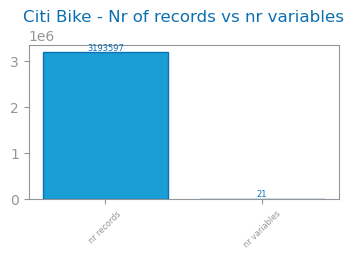

In [26]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=f"{file_tag} - Nr of records vs nr variables"
)
savefig(f"images/{file_tag}_profiling_dimensionality.png")
show()

#### Analysis for the report

Our initial dataset, after data pre processing, resulted in 3,1M records and 21 variables. 

### Missing values

In [8]:
df.isnull().sum()

bike_type              0
start_station          0
end_station            0
user_type              0
start_borough          0
end_borough            0
day_of_month           0
hour                   0
day_of_week            0
is_weekend             0
time_of_day            0
ride_duration_min      0
temperature_2m         0
rain_mm                0
snowfall_cm            0
wmo_weather_code       0
cloud_cover_low_pct    0
wind_speed_10m         0
wmo_weather_desc       0
ride_distance_km       0
ride_avg_speed         0
dtype: int64

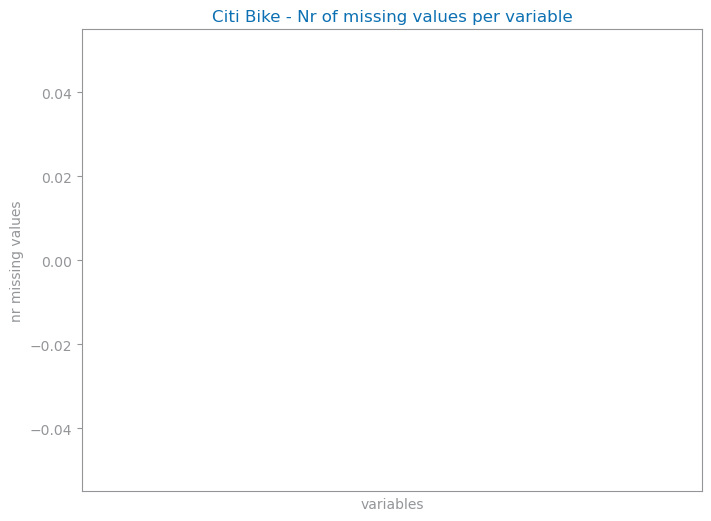

In [9]:

mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()

    if nr > 0:
        mv[var] = nr

figure(figsize=(8, 6)) #(largura,altura) 

plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title= f"{file_tag} - Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
savefig(f"images/{file_tag}_profiling_mv.png")
show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193597 entries, 0 to 3193596
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   bike_type            object 
 1   start_station        object 
 2   end_station          object 
 3   user_type            object 
 4   start_borough        object 
 5   end_borough          object 
 6   day_of_month         int64  
 7   hour                 int64  
 8   day_of_week          object 
 9   is_weekend           int64  
 10  time_of_day          object 
 11  ride_duration_min    float64
 12  temperature_2m       float64
 13  rain_mm              float64
 14  snowfall_cm          float64
 15  wmo_weather_code     int64  
 16  cloud_cover_low_pct  int64  
 17  wind_speed_10m       float64
 18  wmo_weather_desc     object 
 19  ride_distance_km     float64
 20  ride_avg_speed       float64
dtypes: float64(7), int64(5), object(9)
memory usage: 511.7+ MB


#### Analysis for the report

Our initial dataset, doesn't contain any missing value for the existing variables. 

### Variables Type

In [11]:
df.dtypes

bike_type               object
start_station           object
end_station             object
user_type               object
start_borough           object
end_borough             object
day_of_month             int64
hour                     int64
day_of_week             object
is_weekend               int64
time_of_day             object
ride_duration_min      float64
temperature_2m         float64
rain_mm                float64
snowfall_cm            float64
wmo_weather_code         int64
cloud_cover_low_pct      int64
wind_speed_10m         float64
wmo_weather_desc        object
ride_distance_km       float64
ride_avg_speed         float64
dtype: object

In [27]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": [], "id": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        elif c in id_cols:
            variable_types["id"].append(c)
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types


variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)

{'numeric': ['day_of_month', 'hour', 'ride_duration_min', 'temperature_2m', 'rain_mm', 'snowfall_cm', 'wmo_weather_code', 'cloud_cover_low_pct', 'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed'], 'binary': ['bike_type', 'user_type', 'is_weekend'], 'date': [], 'symbolic': ['start_station', 'end_station', 'start_borough', 'end_borough', 'day_of_week', 'time_of_day', 'wmo_weather_desc'], 'id': []}


#### Change symbolic columns type, to category (instead of object)

In [28]:
symbolic: list[str] = variable_types["symbolic"]
df[symbolic] = df[symbolic].apply(lambda x: x.astype("category"))
df.dtypes

bike_type                object
start_station          category
end_station            category
user_type                object
start_borough          category
end_borough            category
day_of_month              int64
hour                      int64
day_of_week            category
is_weekend                int64
time_of_day            category
ride_duration_min       float64
temperature_2m          float64
rain_mm                 float64
snowfall_cm             float64
wmo_weather_code          int64
cloud_cover_low_pct       int64
wind_speed_10m          float64
wmo_weather_desc       category
ride_distance_km        float64
ride_avg_speed          float64
dtype: object

### variables per type plot

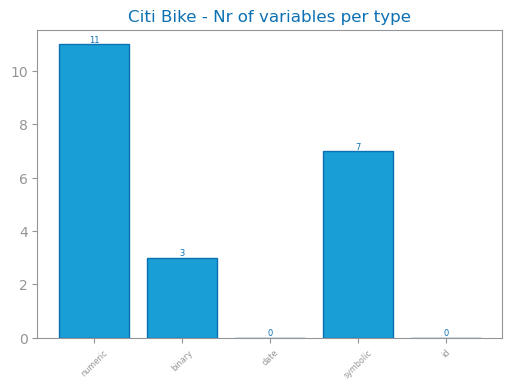

In [29]:
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(6, 4))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title=f"{file_tag} - Nr of variables per type"
)
savefig(f"images/{file_tag}_profiling_variable_types.png")
show()

## Data Distribuition

In [12]:
summary5: df = df.describe(include="all")
summary5

bike_type    start_station      end_station user_type  \
count         3193597          3193597          3193597   3193597   
unique              2             2123             2174         2   
top     electric_bike  W 21 St & 6 Ave  W 21 St & 6 Ave    member   
freq          2090566            13894            13821   2602598   
mean              NaN              NaN              NaN       NaN   
std               NaN              NaN              NaN       NaN   
min               NaN              NaN              NaN       NaN   
25%               NaN              NaN              NaN       NaN   
50%               NaN              NaN              NaN       NaN   
75%               NaN              NaN              NaN       NaN   
max               NaN              NaN              NaN       NaN   

       start_borough end_borough  day_of_month          hour day_of_week  \
count        3193597     3193597  3.193597e+06  3.193597e+06     3193597   
unique             6           7           NaN           NaN           7   
top        Manhattan   Manhattan           NaN           NaN      Monday   
freq         2021324     2019845           NaN           NaN      572059   
mean             NaN         NaN  1.666269e+01  1.410235e+01         NaN   
std              NaN         NaN  8.266573e+00  4.897273e+00         NaN   
min              NaN         NaN  1.000000e+00  0.000000e+00         NaN   
25%              NaN         NaN  1.000000e+01  1.000000e+01         NaN   
50%              NaN         NaN  1.700000e+01  1.500000e+01         NaN   
75%              NaN         NaN  2.400000e+01  1.800000e+01         NaN   
max              NaN         NaN  3.100000e+01  2.300000e+01         NaN   

          is_weekend  ... ride_duration_min  temperature_2m       rain_mm  \
count   3.193597e+06  ...      3.193597e+06    3.193597e+06  3.193597e+06   
unique           NaN  ...               NaN             NaN           NaN   
top              NaN  ...               NaN             NaN           NaN   
freq             NaN  ...               NaN             NaN           NaN   
mean    2.703607e-01  ...      1.301825e+01    1.308878e+01  7.936017e-02   
std     4.441462e-01  ...      2.072067e+01    5.268971e+00  3.641502e-01   
min     0.000000e+00  ...      1.001633e+00    6.000000e-01  0.000000e+00   
25%     0.000000e+00  ...      5.165117e+00    9.000000e+00  0.000000e+00   
50%     0.000000e+00  ...      8.971517e+00    1.250000e+01  0.000000e+00   
75%     1.000000e+00  ...      1.572447e+01    1.710000e+01  0.000000e+00   
max     1.000000e+00  ...      1.494622e+03    2.810000e+01  6.400000e+00   

        snowfall_cm  wmo_weather_code  cloud_cover_low_pct  wind_speed_10m  \
count     3193597.0      3.193597e+06         3.193597e+06    3.193597e+06   
unique          NaN               NaN                  NaN             NaN   
top             NaN               NaN                  NaN             NaN   
freq            NaN               NaN                  NaN             NaN   
mean            0.0      8.430651e+00         1.996614e+01    1.541539e+01   
std             0.0      1.734894e+01         3.483365e+01    7.214514e+00   
min             0.0      0.000000e+00         0.000000e+00    8.000000e-01   
25%             0.0      0.000000e+00         0.000000e+00    1.000000e+01   
50%             0.0      3.000000e+00         0.000000e+00    1.490000e+01   
75%             0.0      3.000000e+00         2.000000e+01    2.020000e+01   
max             0.0      6.300000e+01         1.000000e+02    3.980000e+01   

        wmo_weather_desc ride_distance_km  ride_avg_speed  
count            3193597     3.193597e+06    3.193597e+06  
unique                 9              NaN             NaN  
top             Overcast              NaN             NaN  
freq             1366921              NaN             NaN  
mean                 NaN     2.006798e+00    1.098788e+01  
std                  NaN     1.751503e+00    5.6

In [13]:

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Debug: Verificar os tipos de variáveis
print("Tipos de variáveis:", variables_types)

Tipos de variáveis: {'numeric': ['day_of_month', 'hour', 'ride_duration_min', 'temperature_2m', 'rain_mm', 'snowfall_cm', 'wmo_weather_code', 'cloud_cover_low_pct', 'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed'], 'binary': ['bike_type', 'user_type', 'is_weekend'], 'date': [], 'symbolic': ['start_station', 'end_station', 'start_borough', 'end_borough', 'day_of_week', 'time_of_day', 'wmo_weather_desc'], 'id': []}


### Numeric Values

#### Boxplot for All Numeric variables

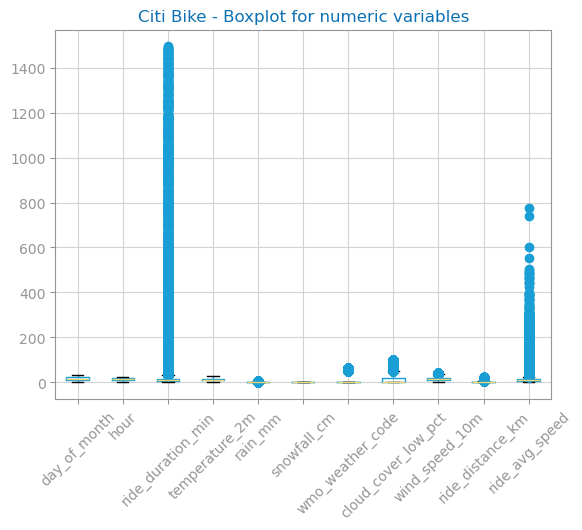

In [14]:
from matplotlib.pyplot import savefig, show, title


variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variable_types["numeric"]


if [] != numeric:
    df[numeric].boxplot(rot=45)
    title(f'{file_tag} - Boxplot for numeric variables')  # Correct way to set title
    savefig(f"images/{file_tag}_profiling_global_boxplot_numeric_vars.png")
    show()
else:
    print("There are no numeric variables.")

#### Boxplot for Single Variable Values

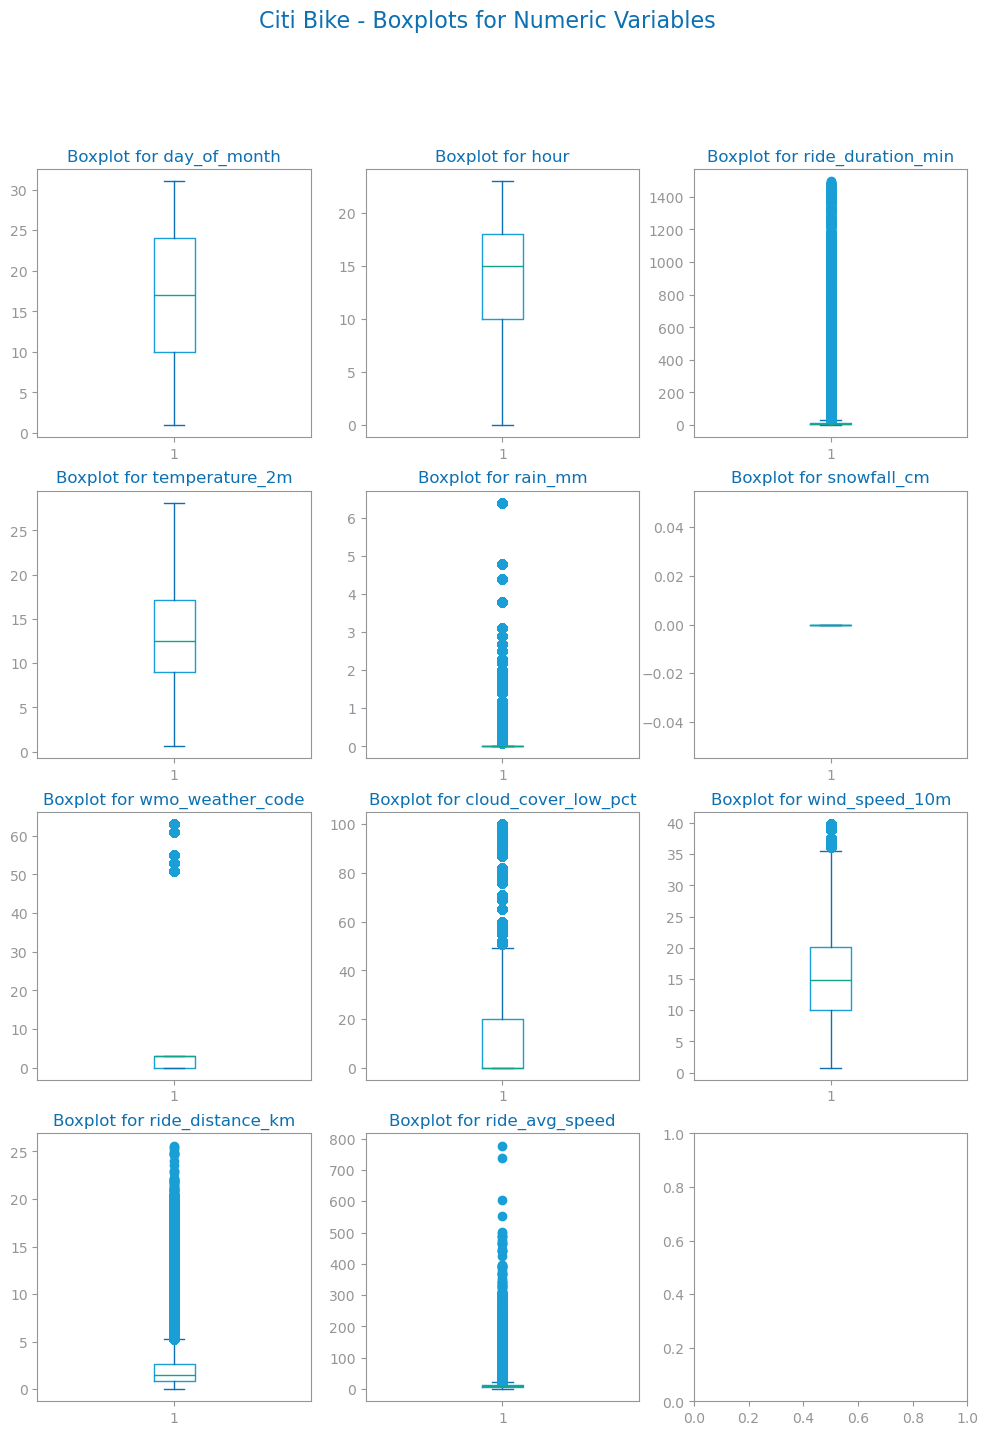

In [15]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT
import pandas as pd

# Obter as variáveis categorizadas pela função get_variable_types
variable_types: dict[str, list] = get_variable_types(df)

# Apenas variáveis numéricas são usadas para os boxplots
numeric = variable_types.get('numeric', [])

# Verificar se a lista de variáveis numéricas não está vazia
if numeric:
    rows, cols = define_grid(len(numeric))  # Definir o número de linhas e colunas com base no número de variáveis
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
    fig.suptitle(f"{file_tag} - Boxplots for Numeric Variables", fontsize=16)

    # Iterar sobre as variáveis numéricas e criar os subplots
    i, j = 0, 0
    for n in numeric:
        # Garantir que apenas valores numéricos são passados para boxplot
        data = df[n].dropna().values
        
        if pd.api.types.is_numeric_dtype(df[n]):
            axs[i, j].set_title(f"Boxplot for {n}")
            axs[i, j].boxplot(data)
        
        # Mover para o próximo subplot
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_profiling_boxplot_single_num_vars.png")
    # Mostrar os gráficos
    show()
else:
    print("There are no numeric variables.")

#### Identify the distribuiton of each numeric variable

In [16]:
df_sample = df.sample(n=100000, random_state=42)  # random_state garante reprodutibilidade


In [18]:
df_sample.head()

bike_type       start_station               end_station  \
1009713  electric_bike      34 St & 38 Ave       Newtown Ave & 23 St   
1128609  electric_bike    10 Ave & W 28 St           8 Ave & W 31 St   
2914392   classic_bike     W 20 St & 7 Ave           8 Ave & W 24 St   
1167451  electric_bike  E 20 St & Park Ave            E 7 St & Ave A   
2905812  electric_bike      Ave D & E 8 St  Cleveland Pl & Spring St   

        user_type start_borough end_borough  day_of_month  hour day_of_week  \
1009713    member        Queens      Queens             8    19      Monday   
1128609    member     Manhattan   Manhattan            25    15    Thursday   
2914392    member     Manhattan   Manhattan             9    10     Tuesday   
1167451    member     Manhattan   Manhattan            13    13    Saturday   
2905812    member     Manhattan   Manhattan            15     6      Monday   

         is_weekend  ... ride_duration_min  temperature_2m  rain_mm  \
1009713           0  ...          9.287733            10.0      0.1   
1128609           0  ...          2.635267            11.2      0.0   
2914392           0  ...          3.999483            19.1      0.0   
1167451           1  ...          6.687183             8.6      0.3   
2905812           0  ...          7.118917            11.6      0.0   

         snowfall_cm  wmo_weather_code  cloud_cover_low_pct  wind_speed_10m  \
1009713          0.0                51                    0             9.0   
1128609          0.0                 0                    0            13.7   
2914392          0.0                 3                    0             6.8   
1167451          0.0                51                   17            31.6   
2905812          0.0                 0                    0             8.7   

         wmo_weather_desc ride_distance_km  ride_avg_speed  
1009713    Drizzle: Light         2.155554       13.925165  
1128609         Clear sky         0.619518       14.105249  
2914392          Overcast         0.397128        5.957695  
1167451    Drizzle: Light         1.371416       12.304875  
2905812         Clear sky         1.818732       15.328722  

[5 rows x 21 columns]

ZeroDivisionError: float division by zero

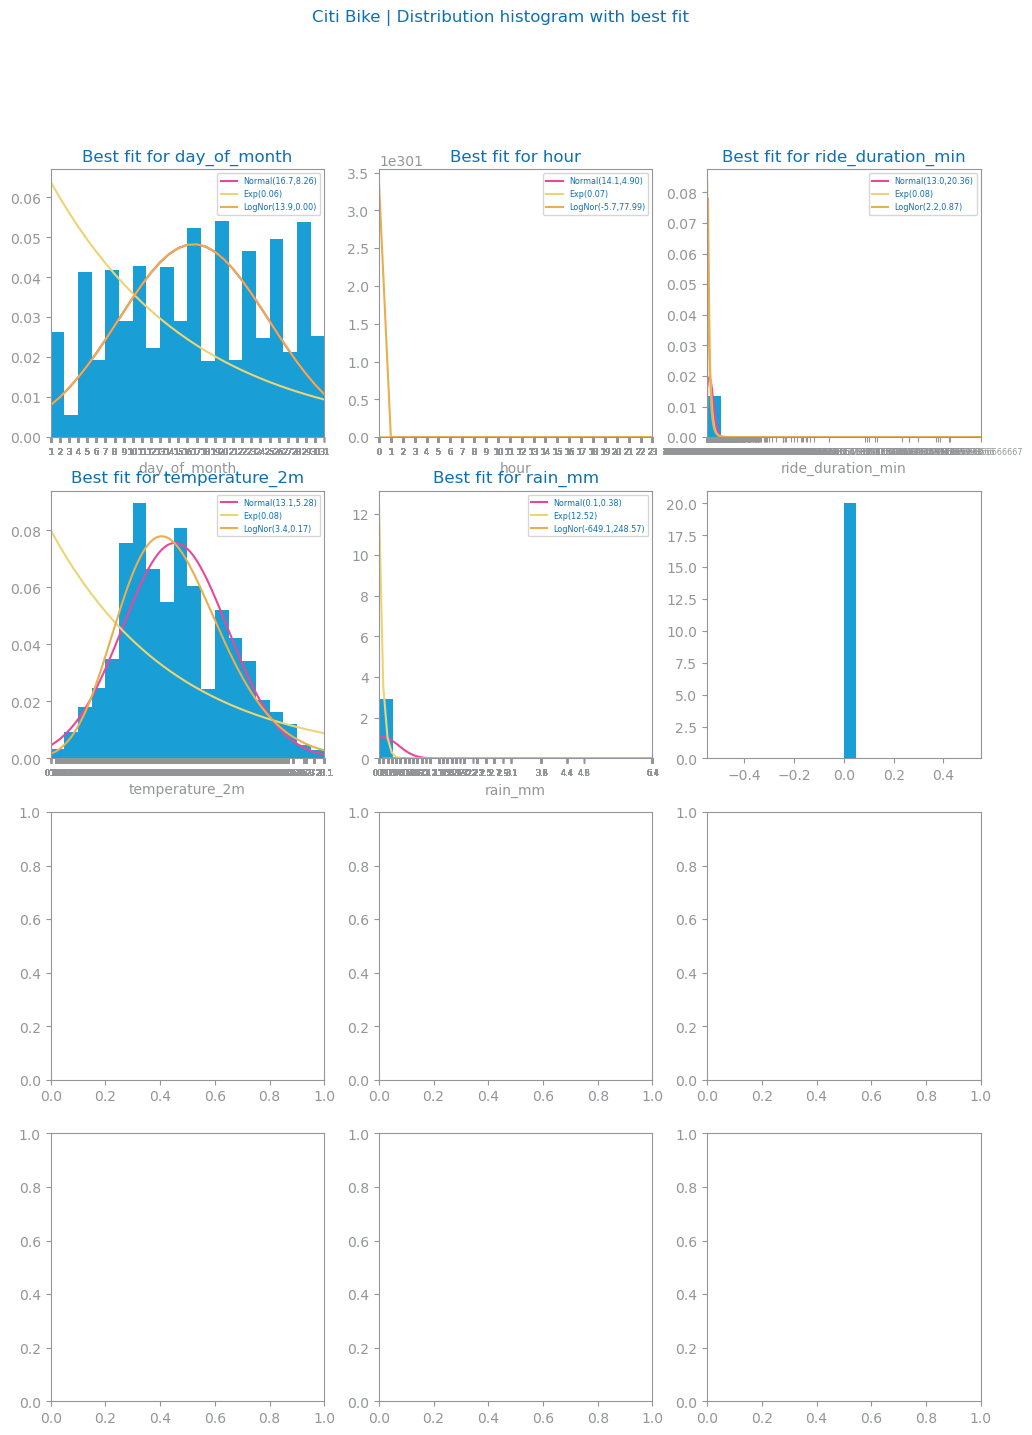

In [19]:
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from matplotlib.axes import Axes
#from dslabs_functions import plot_multiline_chart


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    if len(x_values) > 0:  # Check for empty list
        # Gaussian
        mean, sigma = norm.fit(x_values)
        distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
        # Exponential
        loc, scale = expon.fit(x_values)
        distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
        # LogNorm
        sigma, loc, scale = lognorm.fit(x_values)
        distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
            x_values, sigma, loc, scale
        )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    if len(values) > 0:  # Check for empty values list
        ax.hist(values, 20, density=True)
        distributions: dict = compute_known_distributions(values)
        plot_multiline_chart(
            values,
            distributions,
            ax=ax,
            title="Best fit for %s" % var,
            xlabel=var,
            ylabel="",
        )
    else:
        print(f"No data available for {var}")


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    fig.suptitle(f'{file_tag} | Distribution histogram with best fit')
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], df_sample[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"./{file_tag}_histogram_numeric_distribution.png")
    show()
else:
    print("There are no numeric variables.")


##Get insights

#### Outliers - For each numeric variables ( Univariate outliers)

- NR_STDEV = 2
- IQR_FACTOR=1.5

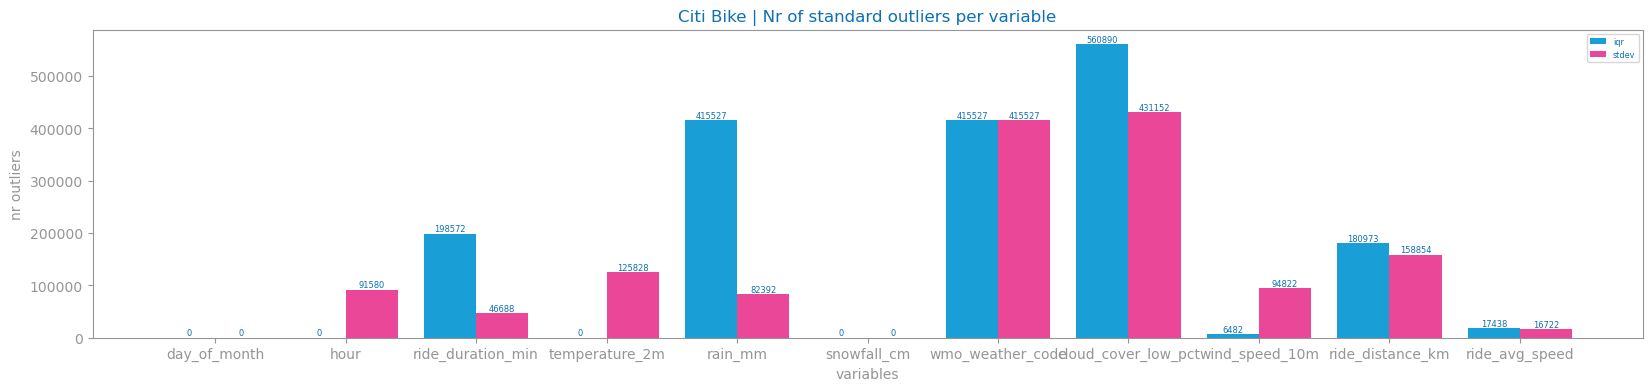

In [18]:
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart

NR_STDEV: int = 2 #choose between 2 and 3
IQR_FACTOR: float = 1.5 #normaly it's always 1,5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom


def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = df[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}


if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric)
    figure(figsize=(20, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title=f"{file_tag} | Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"images/{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

- NR_STDEV = 3
- IQR_FACTOR=1.5

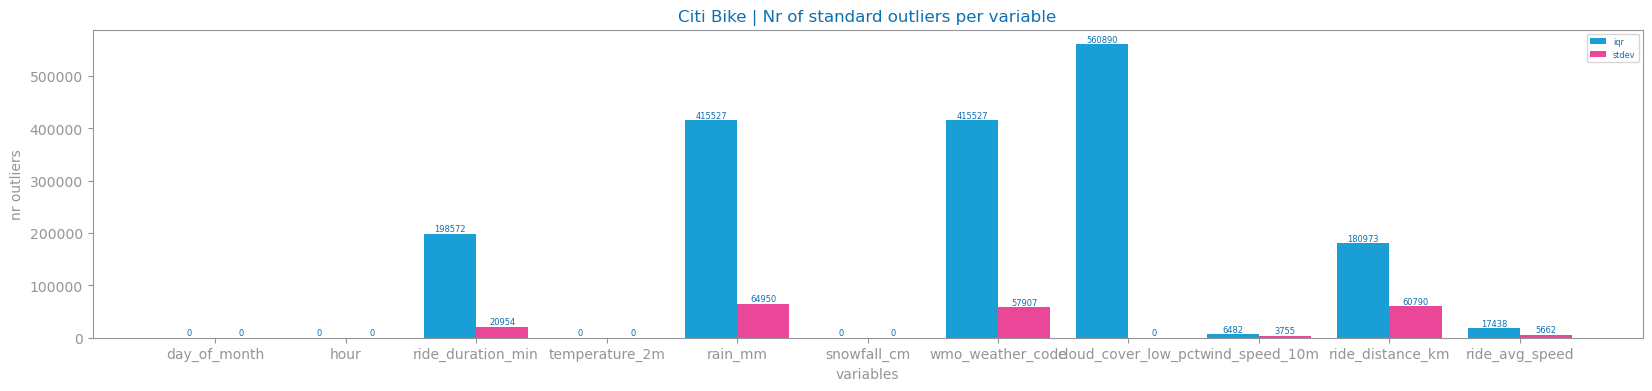

In [19]:
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart

NR_STDEV: int = 3 #choose between 2 and 3
IQR_FACTOR: float = 1.5 #normaly it's always 1,5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom


def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = df[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}


if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric)
    figure(figsize=(20, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title=f"{file_tag} | Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"images/{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

#### Numeric Values - Distribuiton Histogram

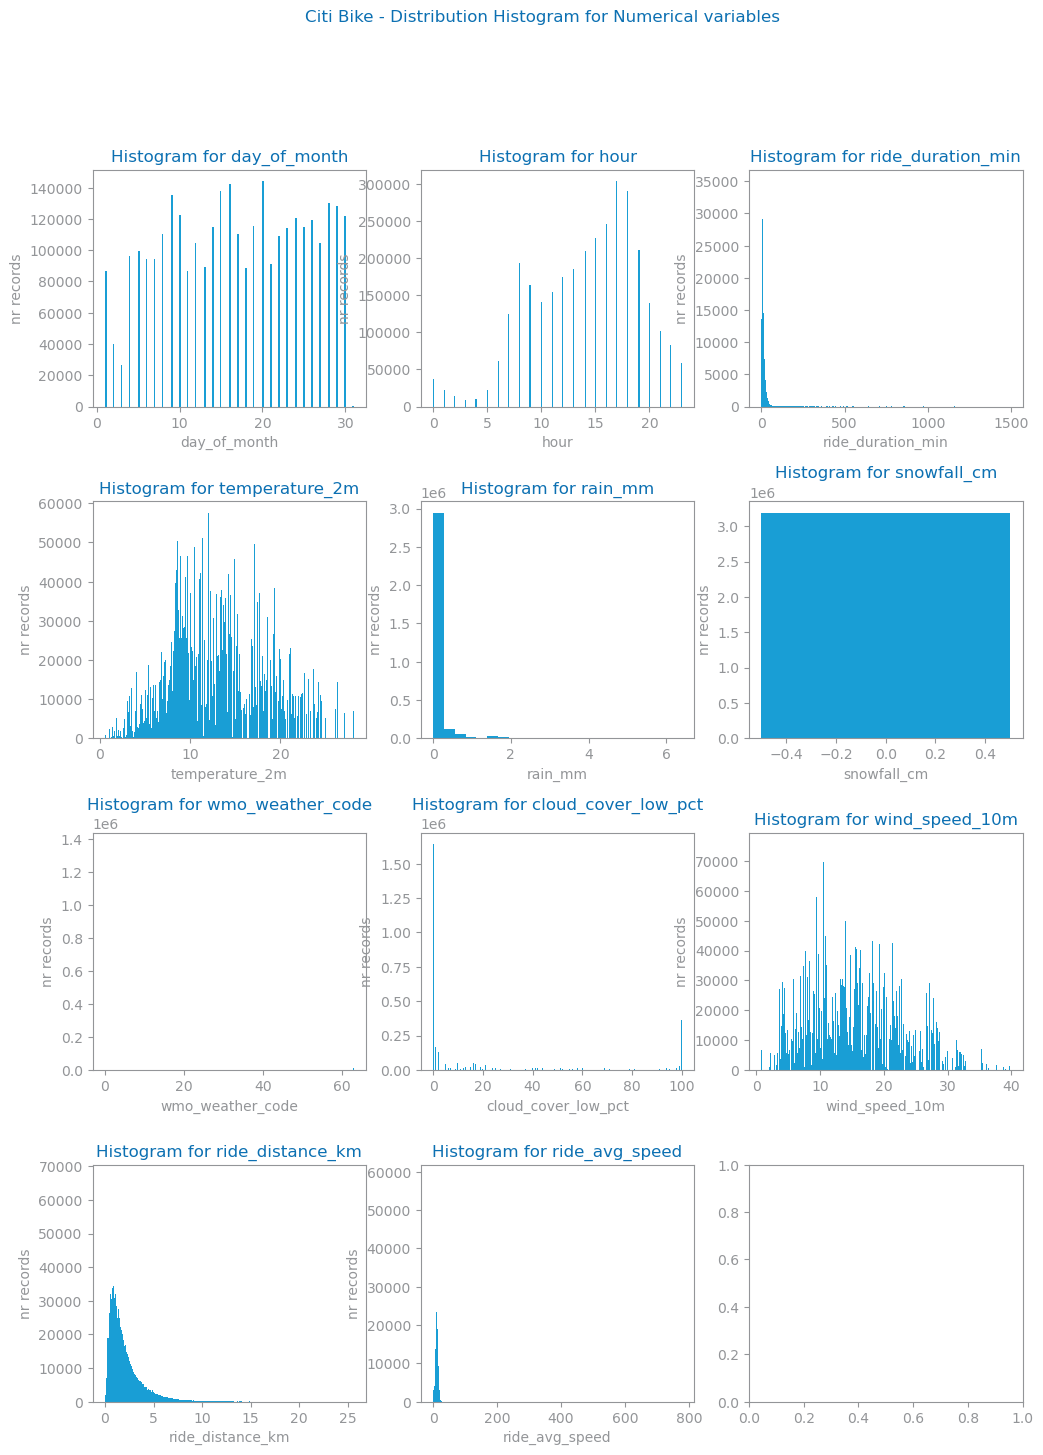

In [20]:
from dslabs_functions import set_chart_labels
from matplotlib.pyplot import subplots, show  # Ensure you have these imports

# Assuming numeric is a list of numeric variable names
# Exclude 'product_id' and 'category_id' from the numeric list
filtered_numeric = [var for var in numeric if var not in ['product_id', 'category_id']]

if filtered_numeric:
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
    i, j = 0, 0
    fig.suptitle(f'{file_tag} - Distribution Histogram for Numerical variables')

    for n in range(len(filtered_numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {filtered_numeric[n]}",
            xlabel=filtered_numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(df[filtered_numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    fig.subplots_adjust(hspace=0.4)  # Aumenta o espaço vertical entre os subplots

    # savefig(f"images/{file_tag}_single_histograms_numeric.png")
    savefig(f"images/{file_tag}_profiling_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")


#### Analysis for the report

Some insights that we can take from the histogram for each numeric variable:
- We can remove col snowfall_cm, as this column is always 0. The dataset has data from April/2024, which makes sense, because in new york only snows in dec/jan.
- Hours: The period with the most rides during the day is after work hours, between 5 PM and 7 PM.
- day_of_the_month: The rides are well distributed throughout the month, meaning there isn’t a specific period—beginning, middle, or end—where users take significantly more rides.
- ride_distance_km: We can see that more than 80% of the rides during this period were likely short trips between 0 and 5 km. Most frquent, is theu sers riding for 2km

### Symbolic variables

#### Histogram for distribuition of variables

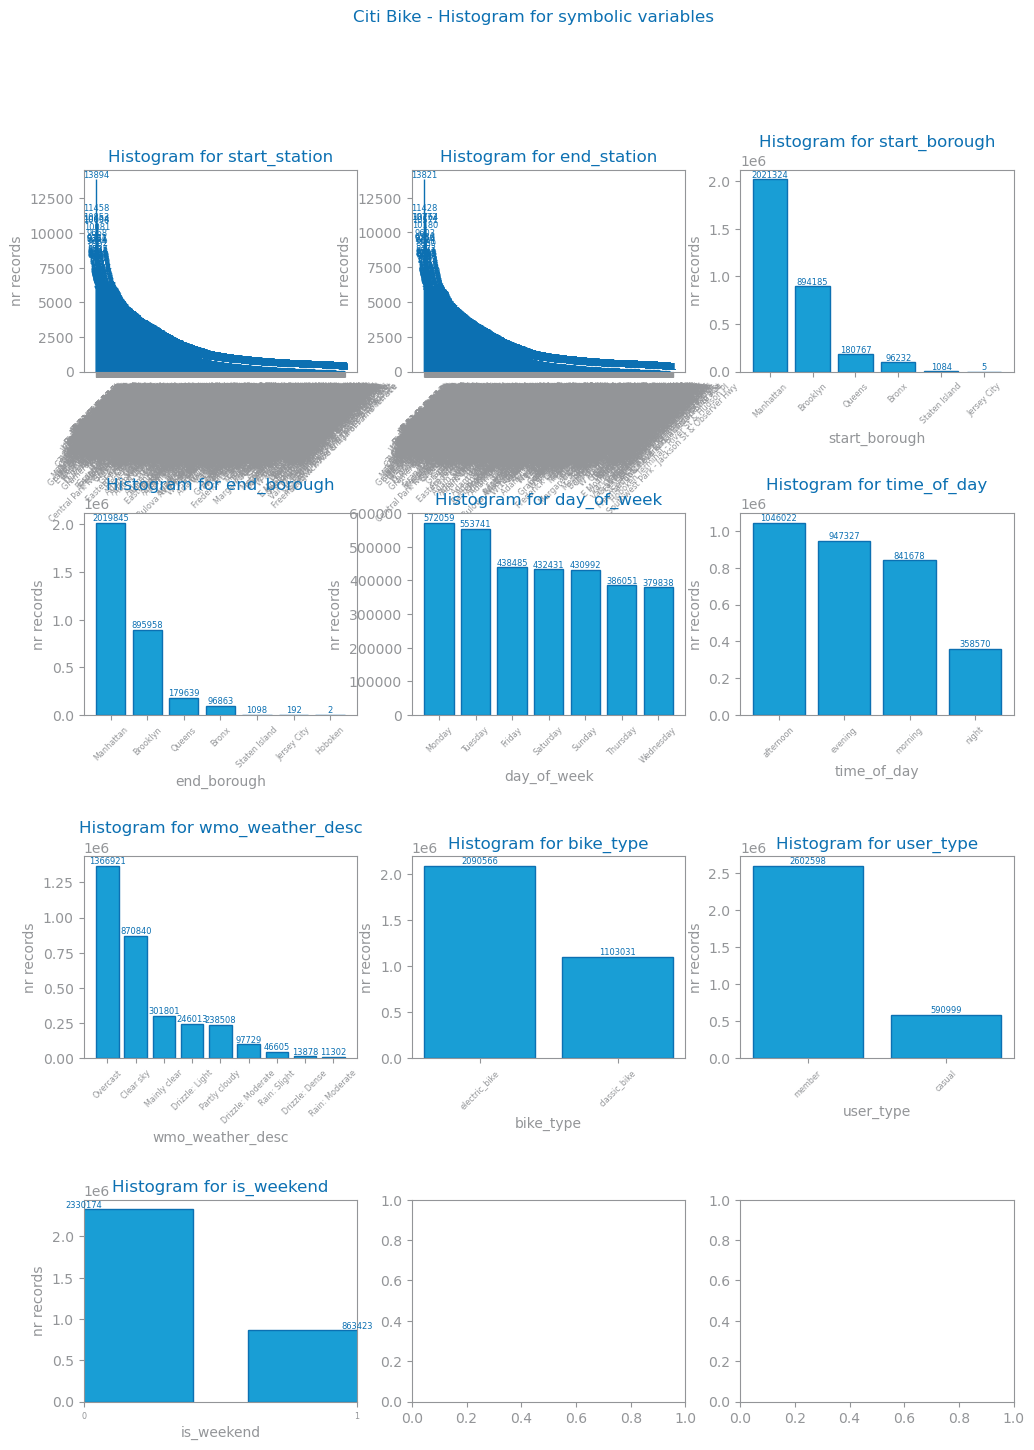

In [21]:
from dslabs_functions import plot_bar_chart
from pandas import Series

# Supondo que você tenha criado a coluna 'category_product' anteriormente

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Criar a lista de variáveis simbólicas, excluindo 'category_product'
symbolic: list[str] = variables_types["symbolic"] + variables_types["binary"]

if symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0

    fig.suptitle(f'{file_tag} - Histogram for symbolic variables')

    for n in range(len(symbolic)):
        counts: Series = df[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    
    fig.subplots_adjust(hspace=0.7)  # Aumenta o espaço vertical entre os subplots

    savefig(f"images/{file_tag}_profiling_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")


In [20]:
# Verifica se a coluna 'day' existe no DataFrame
if 'day_of_month' in df.columns:
    # Conta o número de dias únicos na coluna 'day'
    unique_days = df['day_of_month'].nunique()
    print(f"Número de dias únicos no dataset: {unique_days}")
else:
    print("A coluna 'day' não existe no DataFrame.")


Número de dias únicos no dataset: 31


#### Analysis for the report

Some insights that we can take from the histogram for each symbolic and binary variable:

**symbolic variables**:
- start_borough and end_borough: The Citi Bike system is primarily used in Manhattan and Brooklyn. In fact, most rides start and end in Manhattan
- day_of_week: There are more rides at the start of the week, on Monday and Tuesday. However, overall, the system seems to be used fairly evenly throughout the week, which could mean that most users are members who ride regularly every day.
- day_of_the_month: The rides are well distributed throughout the month, meaning there isn’t a specific period—beginning, middle, or end—where users take significantly more rides.
- time_of_day: The bikes are more used after 12pm, in the afternoon. and espeacilly at evening_rush (5pm to 8pm)
- wmo_weather_desc: Almost 50% of the rides were done under overcast days. And 30% of the rides with clear sky. As predicted, the citi bike are not being used much in rainy days.

**binary variables**:
- bike_type: Clearly, and as expected the users use more the electric bycicle (70%) than the classical one (30%), becasue it's more easy to drive.
- user_type: Around 80% of the rides were done by members. Which means that the citi bike system is mostly used by local residents in new yor, that probably use the bike for commute, and probably use the bycicle on a daily basis
- is_weekend: around 75% of the rides were done during the week.

# Correlation Analysis

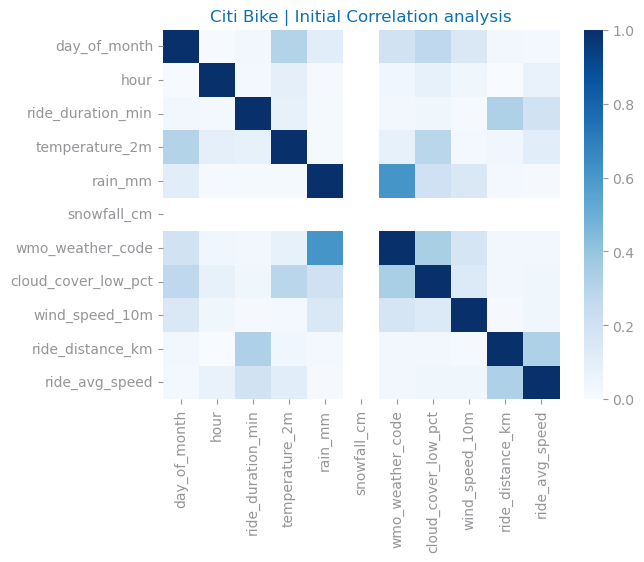

In [21]:
from seaborn import heatmap
from dslabs_functions import get_variable_types
from matplotlib.pyplot import figure, title, savefig, show

variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = df[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)

title(f'{file_tag} | Initial Correlation analysis')

savefig(f"images/{file_tag}_correlation_analysis.png")
show()

#### Analysis for the report

- Do again the correlation Analysis after econding in next phase - Data Preparation/Encoding
    - After encoding, with the correlation analysis we will consider all the variables in the dataset

# Excel File for encoding mapping

In [24]:
import os
from openpyxl import load_workbook


# Function to append distinct combinations of selected columns into sheets in an Excel file
def append_columns_to_excel(df, columns_dict, output_file):
    """
    Append distinct combinations of selected columns into separate sheets in an existing Excel file,
    with the columns ordered by their names for easier hierarchical encoding and add an empty encoding column.

    Args:
    df (pd.DataFrame): The DataFrame containing the columns to save.
    columns_dict (dict): Dictionary where keys are sheet names, and values are lists of column names to include.
    output_file (str): The path of the Excel file to save the sheets.

    Returns:
    None
    """
    # Check if the file exists and is a valid Excel file
    if os.path.exists(output_file):
        try:
            # Try to load the existing workbook
            with pd.ExcelWriter(output_file, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
                writer.book = load_workbook(output_file)
                
                # Loop over each sheet name and corresponding list of columns
                for sheet_name, columns in columns_dict.items():
                    # Check if all the specified columns exist in the DataFrame
                    missing_columns = [col for col in columns if col not in df.columns]
                    if missing_columns:
                        print(f"Warning: The following columns are not found in the DataFrame for sheet '{sheet_name}': {missing_columns}")
                        continue

                    # Get distinct combinations of the selected columns
                    distinct_values = df[columns].drop_duplicates().dropna(how='all')

                    # Convert columns to strings temporarily for sorting to avoid float-string comparison errors
                    distinct_values = distinct_values.astype(str)

                    # Sort distinct values by the specified columns for hierarchical grouping
                    distinct_values.sort_values(by=columns, inplace=True)

                    # Add an empty encoding column for each column in the DataFrame
                    for col in columns:
                        distinct_values[f'{col}_enc'] = pd.NA

                    # Write distinct values to a new sheet named after the sheet_name
                    distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)
                    
        except Exception as e:
            print(f"Error: {e}")
            print("The file might be corrupt or invalid. Creating a new file.")
            # Create a new file if loading fails
            with pd.ExcelWriter(output_file, engine='openpyxl', mode='w') as writer:
                for sheet_name, columns in columns_dict.items():
                    missing_columns = [col for col in columns if col not in df.columns]
                    if missing_columns:
                        print(f"Warning: The following columns are not found in the DataFrame for sheet '{sheet_name}': {missing_columns}")
                        continue

                    # Get distinct combinations of the selected columns
                    distinct_values = df[columns].drop_duplicates().dropna(how='all')

                    # Convert columns to strings temporarily for sorting
                    distinct_values = distinct_values.astype(str)

                    # Sort distinct values by the specified columns for hierarchical grouping
                    distinct_values.sort_values(by=columns, inplace=True)

                    # Add an empty encoding column for each column in the DataFrame
                    for col in columns:
                        distinct_values[f'{col}_enc'] = pd.NA

                    distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)

    else:
        # If the file does not exist, create a new one
        with pd.ExcelWriter(output_file, engine='openpyxl', mode='w') as writer:
            for sheet_name, columns in columns_dict.items():
                missing_columns = [col for col in columns if col not in df.columns]
                if missing_columns:
                    print(f"Warning: The following columns are not found in the DataFrame for sheet '{sheet_name}': {missing_columns}")
                    continue

                # Get distinct combinations of the selected columns
                distinct_values = df[columns].drop_duplicates().dropna(how='all')

                # Convert columns to strings temporarily for sorting
                distinct_values = distinct_values.astype(str)

                # Sort distinct values by the specified columns for hierarchical grouping
                distinct_values.sort_values(by=columns, inplace=True)

                # Add an empty encoding column for each column in the DataFrame
                for col in columns:
                    distinct_values[f'{col}_enc'] = pd.NA

                distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)
                

# Define the groups of columns for hierarchical encoding, grouped by sheet name
columns_to_save = {
    
    'bike_type' : ['bike_type'],  
    'user_type': ['user_type'],
    'wmo_weather_desc': ['wmo_weather_desc']}

# Save the distinct values combinations of each column group into corresponding sheets
append_columns_to_excel(df, columns_to_save, f'data/citi_bike_values_pre_encoding.xlsx')

print("Excel file has been updated successfully.")

Error: property 'book' of 'OpenpyxlWriter' object has no setter
The file might be corrupt or invalid. Creating a new file.
Excel file has been updated successfully.


In [25]:
import os
from openpyxl import load_workbook
import pandas as pd

def append_columns_to_excel(df, columns_dict, output_file):
    """
    Append distinct combinations of selected columns into separate sheets in an existing Excel file,
    with the columns ordered by their names for easier hierarchical encoding and add an empty encoding column.
    """
    # Check if the file exists and is a valid Excel file
    if os.path.exists(output_file):
        try:
            # Load the existing workbook
            workbook = load_workbook(output_file)

            # Open ExcelWriter with the loaded workbook
            with pd.ExcelWriter(output_file, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
                writer.book = workbook  # Correct way to set the workbook
                for sheet_name, columns in columns_dict.items():
                    missing_columns = [col for col in columns if col not in df.columns]
                    if missing_columns:
                        print(f"Warning: Missing columns for '{sheet_name}': {missing_columns}")
                        continue

                    distinct_values = df[columns].drop_duplicates().dropna(how='all').astype(str)
                    distinct_values.sort_values(by=columns, inplace=True)

                    # Add empty encoding columns
                    for col in columns:
                        distinct_values[f'{col}_enc'] = pd.NA

                    distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)

        except Exception as e:
            print(f"Error: {e}")
            print("Creating a new file.")
    else:
        # Create a new file if it doesn't exist
        with pd.ExcelWriter(output_file, engine='openpyxl', mode='w') as writer:
            for sheet_name, columns in columns_dict.items():
                missing_columns = [col for col in columns if col not in df.columns]
                if missing_columns:
                    print(f"Warning: Missing columns for '{sheet_name}': {missing_columns}")
                    continue

                distinct_values = df[columns].drop_duplicates().dropna(how='all').astype(str)
                distinct_values.sort_values(by=columns, inplace=True)

                for col in columns:
                    distinct_values[f'{col}_enc'] = pd.NA

                distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)

print("Excel file has been updated successfully.")


Excel file has been updated successfully.


# Merged from _4_citibike_clustering.ipynb

# Import libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display


## Import Functions

### dslabs_functions

In [3]:
%run "scripts/dslabs_functions.py"

dslabs_functions lodaded


### data functions

In [4]:
%run "scripts/data_functions.py"


dslabs_functions lodaded
data_functions lodaded


# Load

In [5]:
#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'data/citi_bike_pre_proc.csv'

excel_mapping_filepath=r'data/citi_bike_values_encoded.xlsx'

file_tag = 'Citi Bike'

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase

- For clustering, a sample of 11k rows (3.5% of initial dataset) will be used due to memory constraints when applyng the agglomerative clustering algorithm

In [6]:
test_data = True
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0035, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)

id_cols=['ride_id',
         'start_time', 
         'end_time',
         'start_station',
         'end_station',
         'start_station_id',
         'end_station_id',
         'start_lat',
         'start_lng', 
         #'hour',
         'end_lat', 
         'end_lng',
         'wmo_weather_code',
         'snowfall_cm',
         'ride_duration_sec']
#remove also col = 'snowfall_cm' because it has only 0 values in our dataset
#remove also start_station and end_Station = they have too many unique values(around 2k) which will make the encoding process very slow

# Remove unnecessary columns
df = df.drop(columns=id_cols, axis=1)

df_enc = df.copy()  # DataFrame com as variáveis codificadas

display(df_enc.info())
display(df_enc.shape)


#alterar consoante a necessidade:
#- se quiser considerar a remoçao de outliers, alterar para "df_prep_outl"
#- se nao quiser considerar a remoçao de outliers, alterar para "df_enc"
use_df_in_scaling = "df_prep_outl_remov_final"  # Pode ser "df_enc" ou "df_prep_outl"
use_df_in_feat_eng = "df_prep_scal"  # Pode ser "df_enc", "df_prep_outl", "df_prep_scal"
use_df_in_clust = "df_prep_feat"  # Pode ser "df_enc", "df_prep_outl", "df_prep_scal", "df_prep_feat_eng"


<class 'pandas.core.frame.DataFrame'>
Index: 11178 entries, 744055 to 3124065
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bike_type            11178 non-null  object 
 1   user_type            11178 non-null  object 
 2   start_borough        11178 non-null  object 
 3   end_borough          11178 non-null  object 
 4   day_of_month         11178 non-null  int64  
 5   hour                 11178 non-null  int64  
 6   day_of_week          11178 non-null  object 
 7   is_weekend           11178 non-null  int64  
 8   time_of_day          11178 non-null  object 
 9   ride_duration_min    11178 non-null  float64
 10  temperature_2m       11178 non-null  float64
 11  rain_mm              11178 non-null  float64
 12  cloud_cover_low_pct  11178 non-null  int64  
 13  wind_speed_10m       11178 non-null  float64
 14  wmo_weather_desc     11178 non-null  object 
 15  ride_distance_km     11178 non-nul

None

(11178, 17)

In [155]:
df.head()

bike_type user_type start_borough end_borough  day_of_month  \
744055   electric_bike    casual     Manhattan   Manhattan            16   
468836   electric_bike    casual     Manhattan   Manhattan            15   
2522419  electric_bike    member      Brooklyn    Brooklyn            14   
755587   electric_bike    casual     Manhattan       Bronx             8   
2140215  electric_bike    member      Brooklyn    Brooklyn            15   

         hour day_of_week  is_weekend time_of_day  ride_duration_min  \
744055     15     Tuesday           0   afternoon           3.669550   
468836     18      Monday           0     evening           7.038317   
2522419    16      Sunday           1   afternoon          12.097800   
755587      7      Monday           0     morning           8.543300   
2140215    21      Monday           0       night           8.910200   

         temperature_2m  rain_mm  cloud_cover_low_pct  wind_speed_10m  \
744055             20.3      0.0                    0            17.1   
468836             21.1      0.0                    0            11.2   
2522419            22.0      0.0                    0            20.1   
755587              4.1      0.0                    0             7.1   
2140215            15.9      0.0                    0            19.2   

        wmo_weather_desc  ride_distance_km  ride_avg_speed  
744055         Clear sky          0.574933        9.400602  
468836         Clear sky          1.090909        9.299742  
2522419     Mainly clear          2.593736       12.863842  
755587      Mainly clear          2.428583       17.056054  
2140215        Clear sky          1.192552        8.030470

In [7]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
bike_type                  2
user_type                  2
start_borough              5
end_borough                5
day_of_month              31
hour                      24
day_of_week                7
is_weekend                 2
time_of_day                4
ride_duration_min      11129
temperature_2m           212
rain_mm                   29
cloud_cover_low_pct       72
wind_speed_10m           255
wmo_weather_desc           9
ride_distance_km       10837
ride_avg_speed         11068
dtype: int64


# Cluster Data Enconding


# Encoding Detail

- Ordinal enconding:
  - bike_type
    - 0: classic
    - 1: eletric
  - user_type
    - 0: casual
    - 1: member

- Hierachical encoding: Simbolyic Variables
  - start_station
    - (don't consider for now as the encoding of these variables would be realy dificult because we have 2000 diferente stations)
  - end_station
    - (don't consider for now as the encoding of these variables would be realy dificult because we have 2000 diferente stations)
 

- Cyclical enconding: Simbolyic Variables
  - day_of_week
  - time_of_day
  - hour

- Dummyfication:
  - start_borough
  - end_borough
  - wmo_weather_desc 


- Numeric Values that don't need encoding
  - hour
  - day_of_month
  - is_weekend
  - ride_duration_min
  - temperature_2m
  - rain_mm
  - wmo_weather_code ?????
  - cloud_cover_low_pct
  - wind_speed_10m
  - ride_distance_km
  - ride_avg_speed

Note: week_of_month and day in our case are ordinal variables, and not cyclical, because our dataset only has data for 1 month, nov/19, which means that these two variables don't repeat over time in our dataset.

## Ordinal enconding





In [9]:
from pandas import Series, DataFrame, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    
    for c in df.columns:
        if 2 == nr_values[c]:  # Colunas com exatamente 2 valores únicos
            variable_types["binary"].append(c)
        else:
            if df[c].dtype == 'datetime64[ns, UTC]':  # Verifica se a coluna já é datetime
                variable_types["date"].append(c)
            else:
                try:
                    df[c] = to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

# Uso da função
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)

{'numeric': ['day_of_month', 'hour', 'ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct', 'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed'], 'binary': ['bike_type', 'user_type', 'is_weekend'], 'date': [], 'symbolic': ['start_borough', 'end_borough', 'day_of_week', 'time_of_day', 'wmo_weather_desc']}


##### bulk Symbolic mapping through Excel

    - Simbolyc
        -...

    - Binary
        - is_weekend
        - bike_type
            - 0: classic
            - 1: eltric
        - user_type
            - 0: classic
            - 1: member
        - wmo_weather_desc
            - Hierarychal order. Basically, main sky is more closer than overcast than with Rain day

In [10]:


# Generalized function to encode any column based on a mapping dictionary
def encode_column_with_mapping(df, column, mapping_dict, default_value=np.nan):
    """
    Encode a column based on a mapping dictionary.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the column to encode.
    column (str): The column name to encode.
    mapping_dict (dict): Dictionary where keys are the original values and values are the encodings.
    default_value: Value to assign if the key is not found in the mapping dict (default is NaN).
    
    Returns:
    pd.Series: Encoded column.
    """
    return df[column].map(mapping_dict).fillna(default_value)



def sheet_to_dict(excel_file, sheet_name):
    """
    Converts a sheet in an Excel file to a dictionary with the first column as the key and the second as the value.
    
    Args:
    excel_file (str): Path to the Excel file.
    sheet_name (str): Name of the sheet to convert.
    
    Returns:
    dict: A dictionary with keys from the first column and values from the second column.
    """
    # Read the sheet into a DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Ensure that there are at least two columns
    if df.shape[1] < 2:
        raise ValueError(f"The sheet '{sheet_name}' does not have at least two columns.")
    
    # Create a dictionary from the first and second columns
    mapping_dict = dict(zip(df.iloc[:, 0], df.iloc[:, 1]))
    
    return mapping_dict



In [11]:
excel_file = pd.ExcelFile(excel_mapping_filepath)
sheet_names = excel_file.sheet_names  # List of all sheet names

# Iterate over each sheet and map the corresponding column
for sheet in sheet_names:
    # Assuming the sheet names match the column names in data_enc
    if sheet in df_enc.columns:
        # Load the sheet as a dictionary
        category_mapping = sheet_to_dict(excel_mapping_filepath, sheet)
        
        # Encode the corresponding column in data_enc using the mapping
        df_enc[sheet] = encode_column_with_mapping(df_enc, sheet, category_mapping)
        print(f'{sheet} column encoded')

    else:
        print(f"Warning: No matching column found in data_enc for sheet '{sheet}'")




bike_type column encoded
user_type column encoded
wmo_weather_desc column encoded
start_borough column encoded
end_borough column encoded


In [12]:
for v in variable_types["numeric"]:
    print(v, df_enc[v].unique())

day_of_month [26  8 18 10 20 30 15 13 16 21  5 27  4 23 11 25  9 24 19  2  6 14 28  1
 29 17 12 22  7  3 31]
hour [ 9 18 16 11 12 13 20 17 14 22 23 21 19  7 10  8  0 15  6  4  2  1  5  3]
ride_duration_min [22.6932      4.30721667  4.21825    ... 32.27415     4.67813333
 17.45253333]
temperature_2m [10.4 11.   8.6 12.7  8.5 14.5 19.2 10.6 24.2 11.1 17.1  5.3  8.1  9.4
  4.8  8.7 10.   5.6 13.  14.6 19.4  5.9 18.  21.2  7.3  8.9 21.1 19.9
  9.  15.  19.8 20.1 11.2  6.8 13.2  3.1 15.4  9.8  3.3 12.4 14.  21.3
 22.7 16.9 13.8  6.  14.2 17.5  8.4 22.6 12.1 18.5  7.1  3.9 10.5  6.3
 11.4 12.3 17.4 14.4 13.1  9.3  6.7 21.  20.2 15.2 21.7  5.8  7.5 11.8
 10.8 17.2  6.1 13.9 11.7 13.5 13.4 19.1 26.3 24.  17.7  6.6 19.5  9.9
  6.9  8.3 12.6 10.3  7.   6.4 16.8  4.2  9.6 24.1 10.7 15.3  9.7  8.8
 12.   4.1 16.6  3.7 15.7 20.3 28.1 18.2 26.1  7.8  5.1 18.6  7.7 13.7
  4.4 11.9 20.  22.4  4.7  4.5  9.1  8.2  2.3 11.6 25.  23.1 10.9 10.1
 18.9 14.8 17.9 17.3 14.9 16.2  7.9 19.  22.3  3.5 15.6  5.2 

In [12]:
# Atualiza a lista de variáveis simbólicas após a codificação
variable_types["symbolic"] = [v for v in variable_types["symbolic"] if v in df_enc.select_dtypes(include=['object']).columns]


In [13]:
for v in variable_types["symbolic"]:
    print(v, df_enc[v].unique())

day_of_week ['Tuesday' 'Monday' 'Sunday' 'Thursday' 'Friday' 'Saturday' 'Wednesday']
time_of_day ['afternoon' 'evening' 'morning' 'night']


## Cyclical enconding
- We have variables, time variables, that are cyclical, meaning that the values of the variables can repeat over time. 
    - day_of_week
    - time_of_day
    - hour


So basicaly, if we look to time_of_day (morning, afternoon, night). Night is close to afternoon but is also at the same distant from morning, becase after night we will have the monrning

In [14]:
from math import pi, sin, cos


day_of_week_val: dict[str, float] = {
    "Sunday": 0,           # Domingo
    "Monday": 2 * pi / 7,  # Segunda-feira
    "Tuesday": 4 * pi / 7, # Terça-feira
    "Wednesday": 6 * pi / 7, # Quarta-feira
    "Thursday": 8 * pi / 7,  # Quinta-feira
    "Friday": 10 * pi / 7,  # Sexta-feira
    "Saturday": 12 * pi / 7  # Sábado
}

time_of_day_val: dict[str, float] = {
    'night': 0,             # Noite (até 6h)
    'morning': pi/5,        # Manhã cedo (6h - 12h)
    'afternoon': pi,        # Tarde (14h - 17h)
    'evening': -pi/2,       # Fim da tarde (17h - 22h)
}

# Dicionário de encoding apenas para as variáveis categóricas
encoding: dict[str, dict] = {
    "day_of_week": day_of_week_val,
    "time_of_day": time_of_day_val,
}

# Aplicar o encoding categórico ao DataFrame
df_enc = df_enc.replace(encoding)

df_enc.head(10)

bike_type  user_type  start_borough  end_borough  day_of_month  hour  \
744055           1          0              0            0            16    15   
468836           1          0              0            0            15    18   
2522419          1          1              1            1            14    16   
755587           1          0              0            3             8     7   
2140215          1          1              1            1            15    21   
933964           1          0              0            0             8    19   
1507330          1          1              1            0            15    21   
2066150          1          1              1            1             4    21   
2691883          1          1              1            1            30     7   
1489524          1          1              1            1            21    15   

         day_of_week  is_weekend  time_of_day  ride_duration_min  \
744055      1.795196           0     3.141593           3.669550   
468836      0.897598           0    -1.570796           7.038317   
2522419     0.000000           1     3.141593          12.097800   
755587      0.897598           0     0.628319           8.543300   
2140215     0.897598           0     0.000000           8.910200   
933964      0.897598           0    -1.570796          15.665583   
1507330     0.897598           0     0.000000          27.816450   
2066150     3.590392           0     0.000000           9.507400   
2691883     1.795196           0     0.628319           4.356400   
1489524     0.000000           1     3.141593          14.657083   

         temperature_2m  rain_mm  cloud_cover_low_pct  wind_speed_10m  \
744055             20.3      0.0                    0            17.1   
468836             21.1      0.0                    0            11.2   
2522419            22.0      0.0                    0            20.1   
755587              4.1      0.0                    0             7.1   
2140215            15.9      0.0                    0            19.2   
933964             10.0      0.1                    0             9.0   
1507330            15.9      0.0                    0            19.2   
2066150             4.8      0.5                  100             1.8   
2691883            12.6      0.0                  100            12.5   
1489524            11.4      0.0                    0            21.5   

         wmo_weather_desc  ride_distance_km  ride_avg_speed  
744055                  0          0.574933        9.400602  
468836                  0          1.090909        9.299742  
2522419                 1          2.593736       12.863842  
755587                  1          2.428583       17.056054  
2140215                 0          1.192552        8.030470  
933964                  6          3.077542       11.787144  
1507330                 0          4.051324        8.738693  
2066150                 7          2.248435       14.189587  
2691883                 3          0.890871       12.269818  
1489524                 3          3.377387       13.825618

In [15]:
# Função para aplicar encoding cíclico
def encode_cyclic_variables(df_enc, vars):
    for v in vars:
        # Ajustar x_max para cada variável cíclica
        if v == "hour":
            x_max = 24  # Ciclo de 24 horas
        elif v == "time_of_day":
            x_max = 4   # Ciclo de 4 períodos do dia
        elif v == "day_of_week":
            x_max = 7   # Ciclo de 7 dias da semana
        else:
            x_max = max(df_enc[v])  # Para outras variáveis (se houver)

        # Aplicar sin e cos para a variável
        df_enc[v + "_sin"] = df_enc[v].apply(lambda x: round(sin(2 * pi * x / x_max), 3))
        df_enc[v + "_cos"] = df_enc[v].apply(lambda x: round(cos(2 * pi * x / x_max), 3))
    
    return df_enc

# Variáveis cíclicas que já estão numericamente codificadas ou são numéricas
cyclical_vars = ["time_of_day", "day_of_week", "hour"]

# Aplicar a codificação cíclica
df_enc = encode_cyclic_variables(df_enc, cyclical_vars)

# Verificar os resultados
df_enc.head(15)


bike_type  user_type  start_borough  end_borough  day_of_month  hour  \
744055           1          0              0            0            16    15   
468836           1          0              0            0            15    18   
2522419          1          1              1            1            14    16   
755587           1          0              0            3             8     7   
2140215          1          1              1            1            15    21   
933964           1          0              0            0             8    19   
1507330          1          1              1            0            15    21   
2066150          1          1              1            1             4    21   
2691883          1          1              1            1            30     7   
1489524          1          1              1            1            21    15   
2786739          0          1              2            2             4    19   
3094679          1          1              1            1            21    15   
1036576          0          1              1            2            19    16   
1718579          1          1              0            0             5    19   
2699290          1          0              0            0            27    13   

         day_of_week  is_weekend  time_of_day  ride_duration_min  ...  \
744055      1.795196           0     3.141593           3.669550  ...   
468836      0.897598           0    -1.570796           7.038317  ...   
2522419     0.000000           1     3.141593          12.097800  ...   
755587      0.897598           0     0.628319           8.543300  ...   
2140215     0.897598           0     0.000000           8.910200  ...   
933964      0.897598           0    -1.570796          15.665583  ...   
1507330     0.897598           0     0.000000          27.816450  ...   
2066150     3.590392           0     0.000000           9.507400  ...   
2691883     1.795196           0     0.628319           4.356400  ...   
1489524     0.000000           1     3.141593          14.657083  ...   
2786739     3.590392           0    -1.570796           4.866000  ...   
3094679     0.000000           1     3.141593          11.463217  ...   
1036576     4.487990           0     3.141593           2.644283  ...   
1718579     4.487990           0    -1.570796           7.390050  ...   
2699290     5.385587           1     3.141593           4.625483  ...   

         wind_speed_10m  wmo_weather_desc  ride_distance_km  ride_avg_speed  \
744055             17.1                 0          0.574933        9.400602   
468836             11.2                 0          1.090909        9.299742   
2522419            20.1                 1          2.593736       12.863842   
755587              7.1                 1          2.428583       17.056054   
2140215            19.2                 0          1.192552        8.030470   
933964              9.0                 6          3.077542       11.787144   
1507330            19.2                 0          4.051324        8.738693   
2066150             1.8                 7          2.248435       14.189587   
2691883            12.5                 3          0.890871       12.269818   
1489524            21.5                 3          3.377387       13.825618   
2786739            10.8                 3          1.036337       12.778510   
3094679            21.5                 3          2.142587       11.214583   
1036576            19.0                 3          0.363350        8.244574   
1718579            16.1                 0          1.634685       13.272048   
2699290            25.3                 3          1.009464       13.094374   

         time_of_day_sin  time_of_day_cos  day_of_week_sin  day_of_week_cos  \
744055            -0.975            0.221            0.999           -0.041   
468836            -0.624           -0.781            0.721            0.693   
2522419           -0.975            0.221

In [16]:
# Remover as colunas originais
df_enc = df_enc.drop(columns=["time_of_day", "day_of_week", "hour"])

# Verificar os resultados
df_enc.head(15)

bike_type  user_type  start_borough  end_borough  day_of_month  \
744055           1          0              0            0            16   
468836           1          0              0            0            15   
2522419          1          1              1            1            14   
755587           1          0              0            3             8   
2140215          1          1              1            1            15   
933964           1          0              0            0             8   
1507330          1          1              1            0            15   
2066150          1          1              1            1             4   
2691883          1          1              1            1            30   
1489524          1          1              1            1            21   
2786739          0          1              2            2             4   
3094679          1          1              1            1            21   
1036576          0          1              1            2            19   
1718579          1          1              0            0             5   
2699290          1          0              0            0            27   

         is_weekend  ride_duration_min  temperature_2m  rain_mm  \
744055            0           3.669550            20.3      0.0   
468836            0           7.038317            21.1      0.0   
2522419           1          12.097800            22.0      0.0   
755587            0           8.543300             4.1      0.0   
2140215           0           8.910200            15.9      0.0   
933964            0          15.665583            10.0      0.1   
1507330           0          27.816450            15.9      0.0   
2066150           0           9.507400             4.8      0.5   
2691883           0           4.356400            12.6      0.0   
1489524           1          14.657083            11.4      0.0   
2786739           0           4.866000             4.6      0.0   
3094679           1          11.463217            11.4      0.0   
1036576           0           2.644283            10.5      0.0   
1718579           0           7.390050             5.3      0.0   
2699290           1           4.625483            14.3      0.0   

         cloud_cover_low_pct  wind_speed_10m  wmo_weather_desc  \
744055                     0            17.1                 0   
468836                     0            11.2                 0   
2522419                    0            20.1                 1   
755587                     0             7.1                 1   
2140215                    0            19.2                 0   
933964                     0             9.0                 6   
1507330                    0            19.2                 0   
2066150                  100             1.8                 7   
2691883                  100            12.5                 3   
1489524                    0            21.5                 3   
2786739                   16            10.8                 3   
3094679                    0            21.5                 3   
1036576                   55            19.0                 3   
1718579                    0            16.1                 0   
2699290                   16            25.3                 3   

         ride_distance_km  ride_avg_speed  time_of_day_sin  time_of_day_cos  \
744055           0.574933        9.400602           -0.975            0.221   
468836           1.090909        9.299742           -0.624           -0.781   
2522419          2.593736       12.863842           -0.975            0.221   
755587           2.428583       17.056054            0.834            0.551   
2140215          1.192552        8.030470            0.000            1.000   
933964           3.077542       11.787144           -0.624           -0.781   
1507330          4.051324        8.738693            0.000            1.000   
2066150          2.248435       14.189587     

In [18]:
# Criar uma lista para armazenar os valores distintos
distinct_values = {}

# Variáveis cíclicas que você criou
cyclical_vars = ['time_of_day', 'day_of_week', 'hour']

# Loop para obter valores distintos de cada coluna sin e cos
for var in cyclical_vars:
    distinct_sin = df_enc[f'{var}_sin'].unique()
    distinct_cos = df_enc[f'{var}_cos'].unique()
    
    # Armazenar os valores distintos em um dicionário
    distinct_values[f'{var}_sin'] = distinct_sin
    distinct_values[f'{var}_cos'] = distinct_cos

# Imprimir os valores distintos
for key, values in distinct_values.items():
    print(f"Valores distintos de {key}:", values)


Valores distintos de time_of_day_sin: [-0.975 -0.624  0.834  0.   ]
Valores distintos de time_of_day_cos: [ 0.221 -0.781  0.551  1.   ]
Valores distintos de day_of_week_sin: [ 0.999  0.721  0.    -0.081 -0.775 -0.993  0.663]
Valores distintos de day_of_week_cos: [-0.041  0.693  1.    -0.997 -0.632  0.121 -0.749]
Valores distintos de hour_sin: [-0.707 -1.    -0.866  0.966 -0.966 -0.259  0.866  0.    -0.5    0.707
  0.259  0.5    1.   ]
Valores distintos de hour_cos: [-0.707 -0.    -0.5   -0.259  0.707  0.259 -0.966 -1.    -0.866  0.5
  0.966  1.     0.866]


##### Visual representation of cyclical variables

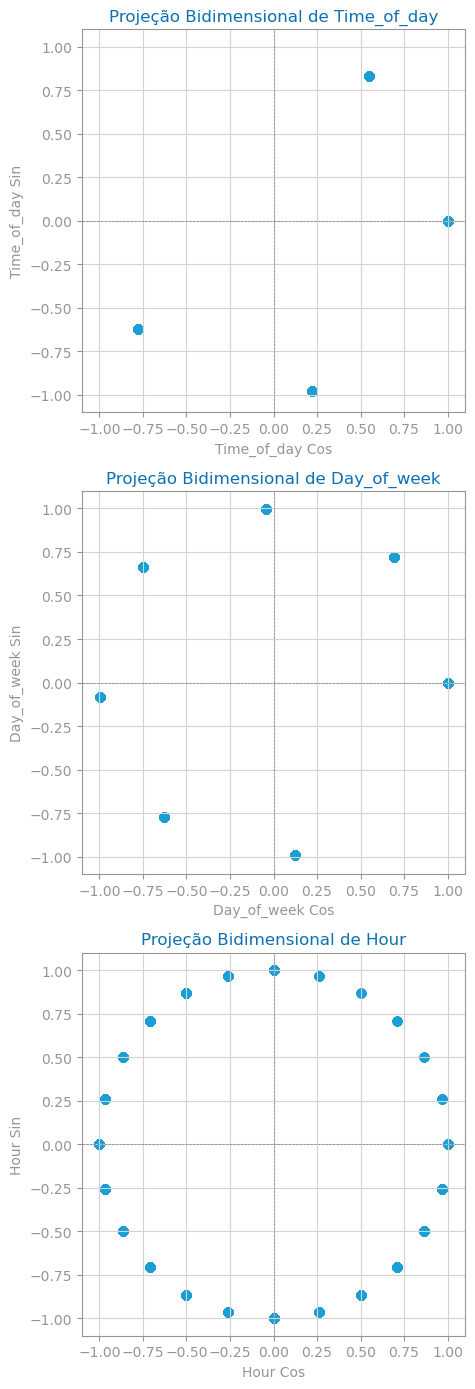

In [19]:
import matplotlib.pyplot as plt

# Lista de variáveis cíclicas
cyclical_vars = ['time_of_day', 'day_of_week', 'hour']

# Criar gráficos de dispersão para cada variável cíclica com tamanho maior
plt.figure(figsize=(14, 14))  # Aumentando o tamanho da figura

for i, var in enumerate(cyclical_vars):
    # Valores de seno e cosseno para a variável atual
    x_values = df_enc[f'{var}_cos']
    y_values = df_enc[f'{var}_sin']
    
    # Criar um subplot para cada variável
    plt.subplot(len(cyclical_vars), 1, i + 1)
    plt.scatter(x_values, y_values, alpha=0.6)
    plt.axhline(0, color='gray', lw=0.5, ls='--')
    plt.axvline(0, color='gray', lw=0.5, ls='--')
    
    # Ajustar os limites dos eixos para melhor visualização
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    # Adicionar título e rótulos
    plt.title(f'Projeção Bidimensional de {var.capitalize()}')
    plt.xlabel(f'{var.capitalize()} Cos')
    plt.ylabel(f'{var.capitalize()} Sin')
    
    # Mostrar a grade
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')  # Para garantir que o gráfico é circular

plt.tight_layout()  # Ajustar o layout
plt.show()  # Mostrar todos os gráficos


# correlation matrix  after enconding

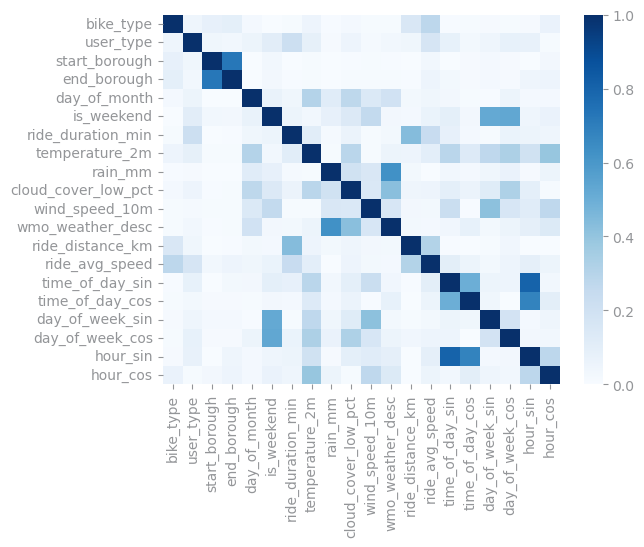

In [20]:
from seaborn import heatmap
from matplotlib.pyplot import figure, savefig, show

variables_types: dict[str, list] = get_variable_types(df_enc)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = df_enc.corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=df_enc.columns,
    yticklabels=df_enc.columns,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
#savefig(f"images/{file_tag}_correlation_analysis.png")
show()

# Cluster Data Preparation
- To apply clustering thecniques we need to apply specific date preparation thecniques, like scaling, drop of outliers and also feature selection

## Outliers detection

In [22]:
def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": [], "id": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        elif c in id_cols:
            variable_types["id"].append(c)
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types


variable_types: dict[str, list] = get_variable_types(df_enc)
print(variable_types)

{'numeric': ['start_borough', 'end_borough', 'day_of_month', 'ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct', 'wind_speed_10m', 'wmo_weather_desc', 'ride_distance_km', 'ride_avg_speed', 'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos'], 'binary': ['bike_type', 'user_type', 'is_weekend'], 'date': [], 'symbolic': [], 'id': []}


### 1 - Drop Outliers

In [23]:
numeric_vars = variable_types["numeric"]
numeric_vars

['start_borough',
 'end_borough',
 'day_of_month',
 'ride_duration_min',
 'temperature_2m',
 'rain_mm',
 'cloud_cover_low_pct',
 'wind_speed_10m',
 'wmo_weather_desc',
 'ride_distance_km',
 'ride_avg_speed',
 'time_of_day_sin',
 'time_of_day_cos',
 'day_of_week_sin',
 'day_of_week_cos',
 'hour_sin',
 'hour_cos']

In [24]:
# Usar a função get_variable_types() para obter as variáveis numéricas

variable_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variable_types["numeric"]

- using nr_stdev=2

In [25]:
from pandas import DataFrame, Series


def apply_strategy_2(df: DataFrame, summary5: DataFrame, nr_stdev: float = 2) -> DataFrame:
    df_copy = df.copy()

    # Definindo as variáveis contínuas específicas que desejas monitorar


    # Filtrar apenas as variáveis contínuas que existem no DataFrame
    numeric_vars = [var for var in numeric if var in df_copy.columns]

    if numeric_vars:
        print(f"Data before dropping outliers with nr_stdev={nr_stdev}:", df_copy.shape)
        
        # Armazenar informações sobre os outliers
        outlier_info = {}

        for var in numeric_vars:
            # Calcular os limites de outlier para a variável usando o número de desvios padrão
            mean = summary5[var]['mean']
            std = summary5[var]['std']
            
            top = mean + nr_stdev * std
            bottom = mean - nr_stdev * std
            
            # Identificar os outliers
            outliers: Series = df_copy[(df_copy[var] > top) | (df_copy[var] < bottom)]
            
            # Se houver outliers, armazenar as informações
            if not outliers.empty:
                outlier_info[var] = {
                    'outlier_indices': outliers.index.tolist(),
                    'outlier_count': outliers.shape[0],
                    'outlier_values': outliers[var].tolist()
                }

                # Remover outliers
                df_copy.drop(outliers.index, axis=0, inplace=True)
        
        print(f"Data after dropping outliers with nr_stdev={nr_stdev}:", df_copy.shape)

        # Imprimir informações sobre os outliers removidos apenas para as variáveis com outliers
        if outlier_info:
            for var, info in outlier_info.items():
                print(f"Variable '{var}':")
                print(f"  Number of outliers removed: {info['outlier_count']}")
                print(f"  Indices of outliers: {info['outlier_indices']}")
                print(f"  Values of outliers: {info['outlier_values']}")
                print()  # Linha em branco para melhor legibilidade
        else:
            print("No outliers were removed.")
    else:
        print("There are no numeric variables")

    return df_copy

# Usar a função
summary5 = df_enc.describe()  # Calcular o resumo estatístico apenas para as variáveis de interesse
nr_stdev = 2  # Exemplo, mas pode ser alterado para 3 ou outro valor

df_prep_outl_remov = apply_strategy_2(df_enc, summary5, nr_stdev)


Data before dropping outliers with nr_stdev=2: (11178, 20)
Data after dropping outliers with nr_stdev=2: (8147, 20)
Variable 'ride_duration_min':
  Number of outliers removed: 281
  Indices of outliers: [1464719, 3072906, 558312, 2628501, 1207645, 871180, 914884, 319804, 1077761, 2741723, 700757, 1037435, 2642544, 2317680, 1607455, 396834, 2019280, 281681, 2309794, 963004, 2026204, 1663341, 588940, 562713, 2806620, 893565, 2395830, 704483, 1343605, 1469388, 1634770, 1890898, 2078519, 483358, 741780, 2026557, 963929, 1287951, 1089102, 157075, 541106, 1066294, 962115, 683484, 3169845, 460335, 2447750, 1680252, 2034644, 2966059, 134215, 312073, 1496731, 2373527, 2305148, 1049792, 12429, 2625687, 3042283, 3143749, 1587389, 420966, 2477881, 53894, 1229389, 2817184, 922567, 2196266, 682935, 1275916, 2829366, 926944, 1399403, 2437492, 1017539, 2906795, 1724347, 294468, 2692306, 2544905, 10668, 2287705, 960731, 1852833, 1705533, 1052882, 615154, 2297810, 724223, 2937238, 2037933, 136256, 10756

In [27]:
display(df.shape) # original df
display(df_enc.shape) # df after enconding
display(df_prep_outl_remov.shape) # df after enconding and data prep outlier removal


(11178, 17)

(11178, 20)

(8297, 20)

#### Check outliers after applying the strategy 1 

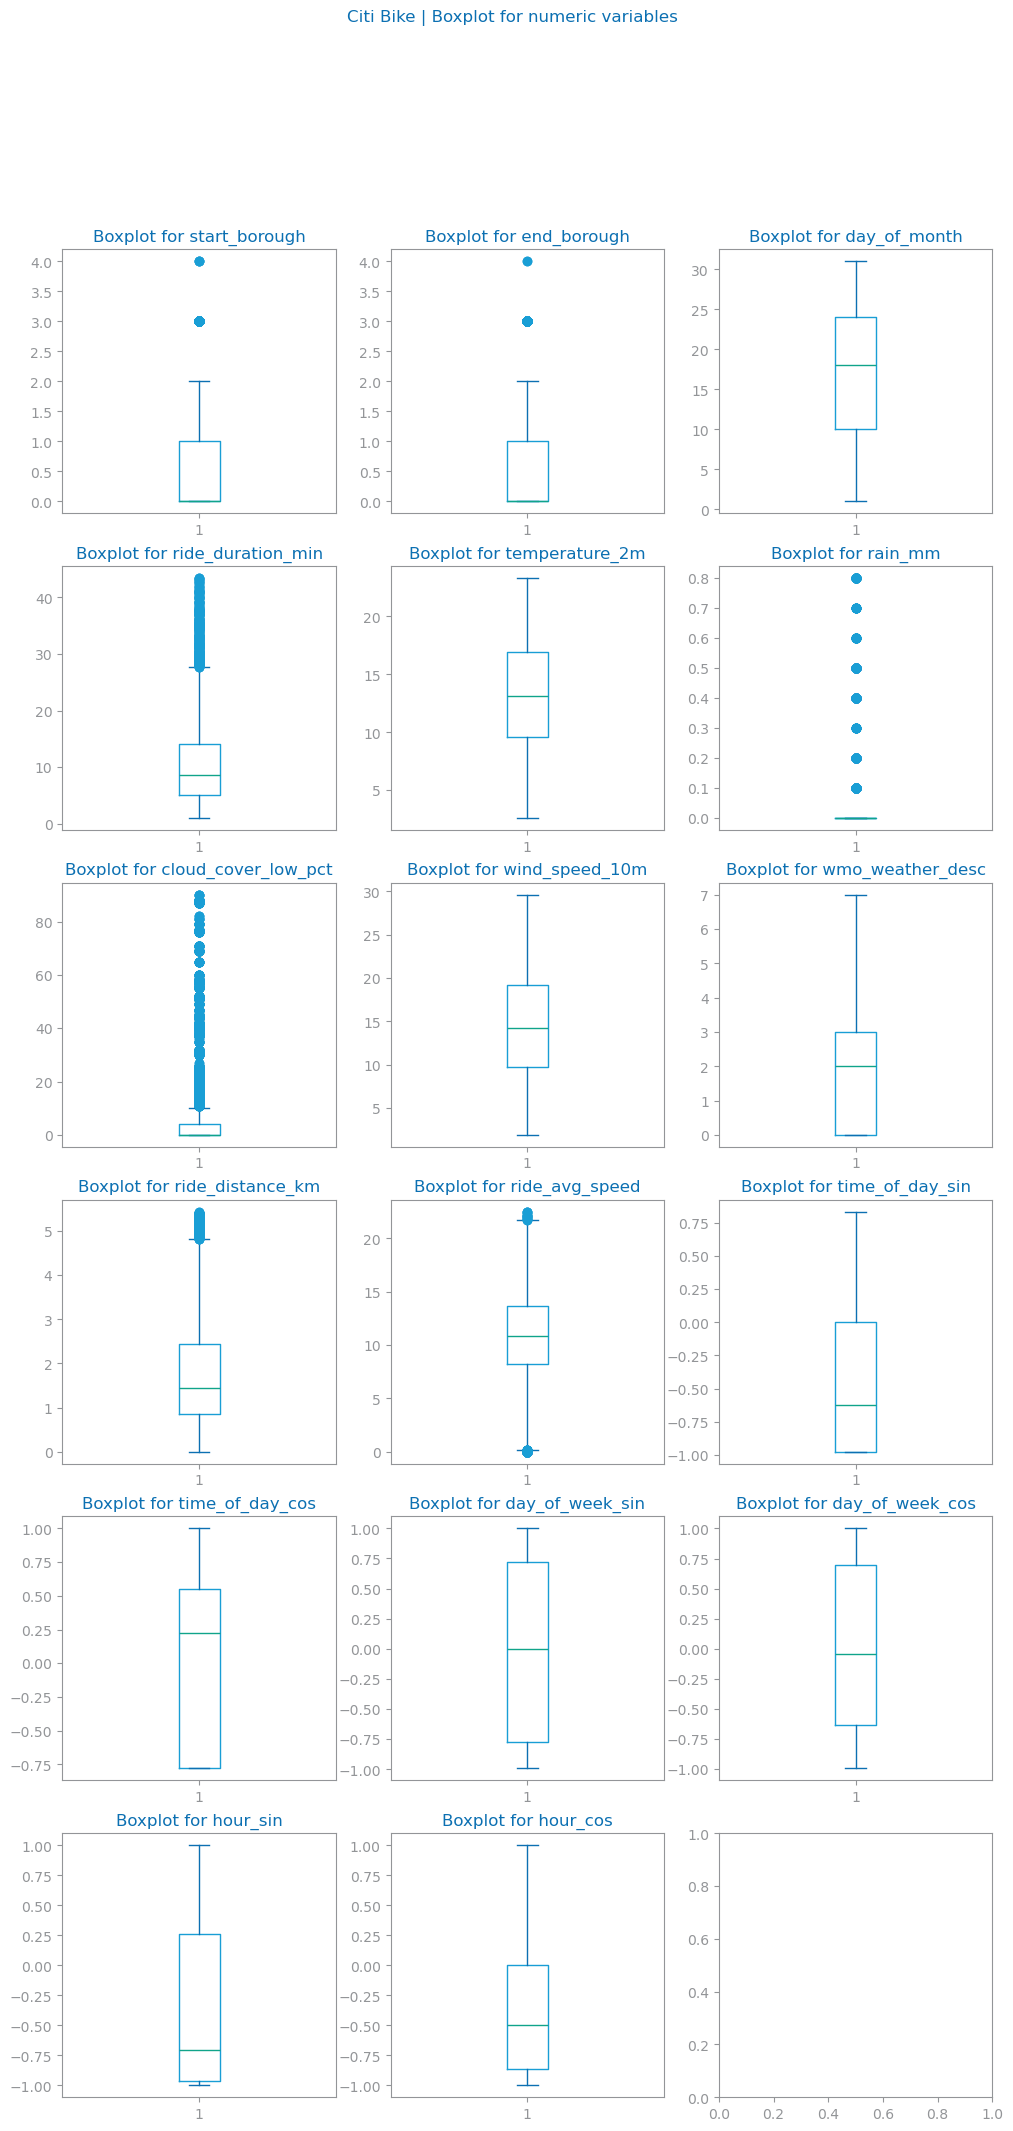

In [26]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT

if [] != numeric_vars:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric_vars))
    fig: Figure
    axs: ndarray
    title: f'{file_tag} Boxplot for numeric variables'
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    
    fig.suptitle(f'{file_tag} | Boxplot for numeric variables')

    
    i, j = 0, 0
    for n in range(len(numeric_vars)):
        axs[i, j].set_title("Boxplot for %s" % numeric_vars[n])
        axs[i, j].boxplot(df_prep_outl_remov[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

### 2 - Truncate Outliers

In [27]:
from pandas import DataFrame
from dslabs_functions import (
    NR_STDEV,
    determine_outlier_thresholds_for_var
)
print("Número de desvios padrão usado:", NR_STDEV)
def apply_strategy_1(df: DataFrame, summary5: DataFrame, numeric_vars: list[str]) -> DataFrame:
    df_copy = df.copy()

    if numeric_vars:
        print("Data before truncating outliers:", df.shape)
        
        for var in numeric_vars:
            # Calculate the outlier thresholds for the variable using summary5
            top, bottom = determine_outlier_thresholds_for_var(summary5[var])
            
            # Truncate outliers for each variable
            df_copy[var] = df_copy[var].apply(
                lambda x: top if x > top else bottom if x < bottom else x
            )
        
        print("Data after truncating outliers:", df_copy.shape)
    else:
        print("None of the specified continuous variables are in the dataset.")
    
    return df_copy


# Calculate the summary statistics before calling the function
summary5 = df_enc.describe()

# Call the function and pass the continuous variables
df_prep_outl_trunc = apply_strategy_1(df_enc, summary5, numeric_vars)


Número de desvios padrão usado: 2
Data before truncating outliers: (11178, 20)
Data after truncating outliers: (11178, 20)


In [28]:
# Verificar quais colunas foram alteradas e coletar informações
altered_info = {}
# Definindo as variáveis contínuas que desejas monitorar

for var in numeric_vars:
    if var in df_enc.columns and var in df_prep_outl_trunc.columns:  # Verifica se a variável existe em ambos os DataFrames
        altered_indices = df_enc.index[df_enc[var] != df_prep_outl_trunc[var]].tolist()
        if altered_indices:
            altered_count = len(altered_indices)
            new_values = df_prep_outl_trunc.loc[altered_indices, var].to_list()
            altered_info[var] = {'altered_count': altered_count, 'new_values': new_values}

# Imprimir informações das colunas alteradas
for var, info in altered_info.items():
    print(f"Coluna '{var}' foi alterada. Número de linhas alteradas: {info['altered_count']}. Novos valores: {info['new_values']}")


Coluna 'start_borough' foi alterada. Número de linhas alteradas: 971. Novos valores: [1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.9747469443150685, 1.974746944315

#### Check outliers after Outliers strategy is aplied

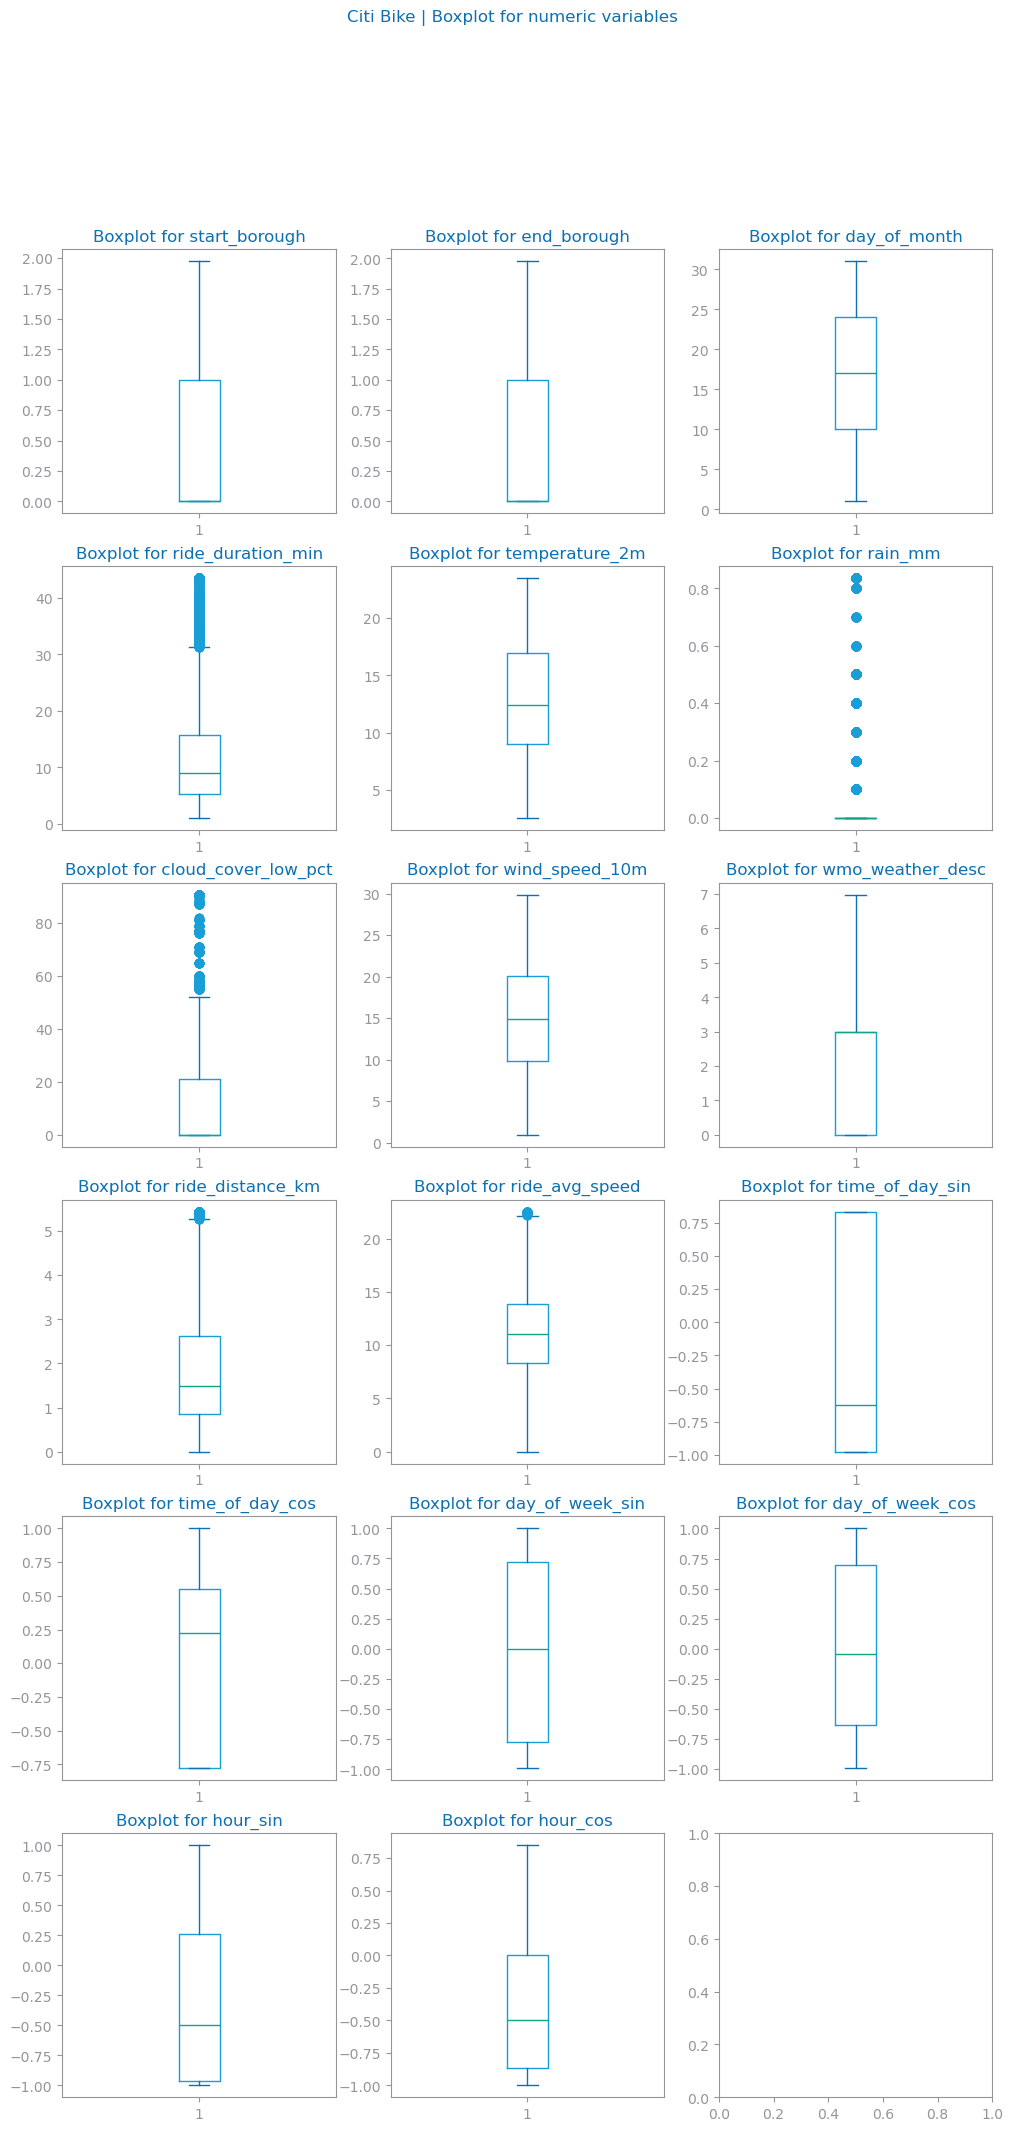

In [29]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT

if [] != numeric_vars:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric_vars))
    fig: Figure
    axs: ndarray
    title: f'{file_tag} Boxplot for numeric variables'
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    
    fig.suptitle(f'{file_tag} | Boxplot for numeric variables')

    
    i, j = 0, 0
    for n in range(len(numeric_vars)):
        axs[i, j].set_title("Boxplot for %s" % numeric_vars[n])
        axs[i, j].boxplot(df_prep_outl_trunc[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

In [32]:
df_prep_outl_trunc.head()

bike_type  user_type  start_borough  end_borough  day_of_month  \
1619313          0          1       1.000000     1.000000             1   
1562857          1          1       0.000000     0.000000             8   
2677001          0          1       1.957538     1.994963            17   
933062           1          1       0.000000     0.000000            18   
2300475          0          1       1.000000     1.000000            24   

         is_weekend  ride_duration_min  temperature_2m  rain_mm  \
1619313           0           8.117567            10.8      0.1   
1562857           0          17.035817            11.0      0.4   
2677001           0           2.966317             9.1      0.0   
933062            0           1.759567             8.5      0.1   
2300475           0           8.557200            21.2      0.0   

         cloud_cover_low_pct  wind_speed_10m  wmo_weather_desc  \
1619313             69.00000             7.4               6.0   
1562857              0.00000             9.4               6.0   
2677001              0.00000            15.8               3.0   
933062              89.49823            21.9               6.0   
2300475              1.00000            18.9               1.0   

         ride_distance_km  ride_avg_speed  time_of_day_sin  time_of_day_cos  \
1619313          1.095976        8.100771           -0.975            0.221   
1562857          3.188257       11.229015           -0.624           -0.781   
2677001          0.815903       16.503347            0.834            0.551   
933062           0.352754       12.028677            0.834            0.551   
2300475          1.313084        9.206869           -0.975            0.221   

         day_of_week_sin  day_of_week_cos  hour_sin  hour_cos  
1619313            0.721            0.693    -0.500    -0.866  
1562857            0.721            0.693    -1.000    -0.000  
2677001            0.663           -0.749     0.966    -0.259  
933062            -0.081           -0.997     0.259    -0.966  
2300475            0.663           -0.749    -0.259    -0.966

## Outlieres treatment outcome:


After testing clustering, Outlier truncation provided more interesitng results than removal of outliers. So, we will proceed to scaling with the Outlier Truncation dataset
- df_prep_outl_trunc

## Scaling

### Scale strategy 1 - Standard Scaler

In [239]:
use_df_in_scaling = "df_prep_outl_trunc"  # Pode ser "df_enc" ou "df_prep_outl"

In [31]:
# Escolher o DataFrame a ser utilizado no scaling com base na variável 'use_df_scaling'
if use_df_in_scaling == "df_enc":
    df_to_use_scal = df_enc
elif use_df_in_scaling == "df_prep_outl_remov":
    df_to_use_scal = df_prep_outl_remov  
elif use_df_in_scaling == "df_prep_outl_trunc":
    df_to_use_scal = df_prep_outl_trunc  
else:
    raise ValueError(f"Invalid DataFrame choice: {use_df_in_scaling}. Choose either 'df_enc' or 'df_prep_outl'.")

print(f"We will use the {use_df_in_scaling} dataset, which means that we are {'not ' if use_df_in_scaling == 'df_enc' else ''}considering the removal of outliers.")
print(f"Shape of dataset: {df_to_use_scal.shape}")


We will use the df_prep_outl_trunc dataset, which means that we are considering the removal of outliers.
Shape of dataset: (11178, 20)


In [32]:

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

def apply_standard_scaler(df: DataFrame) -> DataFrame:

    df_copy = df.copy()
    
    # Apply scaling to all the feature columns (since there is no target)
    transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_copy)
    df_zscore = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    return df_zscore

In [34]:

def apply_strategy_1(df):

    df_copy=df.copy()
    
    df_zscore=apply_standard_scaler(df_copy)

    return df_zscore

df_prep_scal=apply_strategy_1(df_to_use_scal)

df_prep_scal.columns

Index(['bike_type', 'user_type', 'start_borough', 'end_borough',
       'day_of_month', 'is_weekend', 'ride_duration_min', 'temperature_2m',
       'rain_mm', 'cloud_cover_low_pct', 'wind_speed_10m', 'wmo_weather_desc',
       'ride_distance_km', 'ride_avg_speed', 'time_of_day_sin',
       'time_of_day_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin',
       'hour_cos'],
      dtype='object')

### Scale strategy 2 - MinMax Scaler


In [35]:
from sklearn.preprocessing import MinMaxScaler

def apply_min_max_scaler(df: DataFrame) -> DataFrame:

    df_copy=df.copy()
        # Apply MinMax scaling to the feature columns only
    transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_copy)
    df_minmax = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    return df_minmax

In [36]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler


def apply_strategy_2(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Scaling chapter
    df_copy=apply_min_max_scaler(df)

    return df_copy

df_pre_scal_2=apply_strategy_2(df_to_use_scal)
df_pre_scal_2.columns

Index(['bike_type', 'user_type', 'start_borough', 'end_borough',
       'day_of_month', 'is_weekend', 'ride_duration_min', 'temperature_2m',
       'rain_mm', 'cloud_cover_low_pct', 'wind_speed_10m', 'wmo_weather_desc',
       'ride_distance_km', 'ride_avg_speed', 'time_of_day_sin',
       'time_of_day_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin',
       'hour_cos'],
      dtype='object')

### Scale strategy 3 - Robust Scaler


In [37]:
from pandas import DataFrame
from sklearn.preprocessing import RobustScaler

def apply_robust_scaler(df: DataFrame) -> DataFrame:
    df_copy = df.copy()
    
    # Apply Robust scaling to the feature columns only
    transf: RobustScaler = RobustScaler(copy=True).fit(df_copy)
    df_robust = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    return df_robust

def apply_strategy_robust(df: DataFrame) -> DataFrame:
    df_copy = df.copy()
    
    # Apply RobustScaler transformation
    df_copy = apply_robust_scaler(df)
    
    return df_copy

df_pre_scal_3 = apply_strategy_robust(df_to_use_scal)
df_pre_scal_3.columns
df_pre_scal_3.shape


(11178, 20)

#### scaling plot - visualize oth streategies

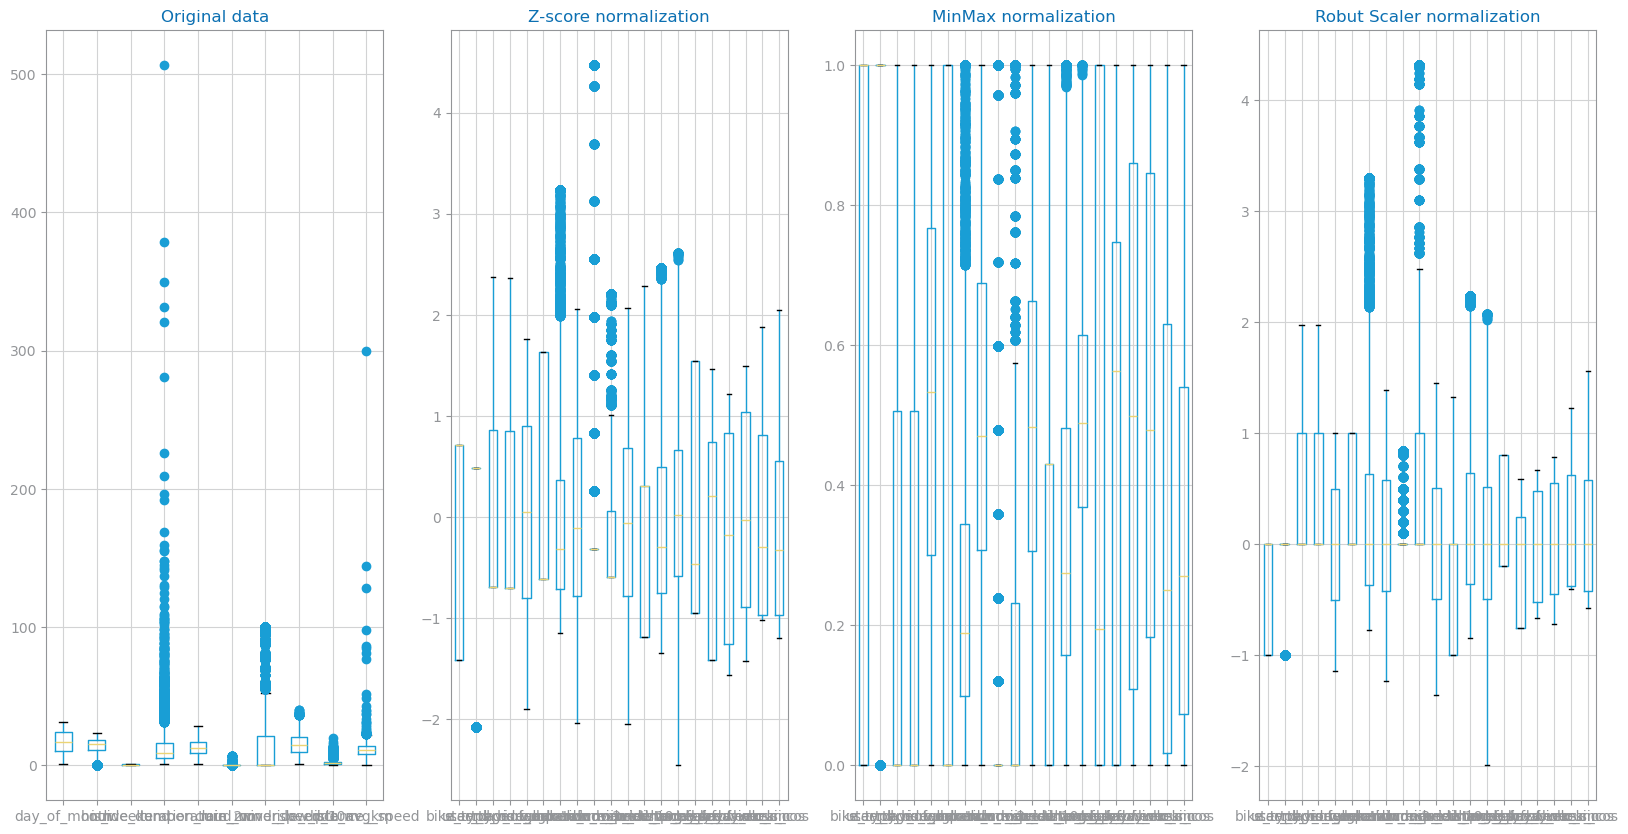

In [38]:
from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 4, figsize=(20, 10), squeeze=False)
axs[0, 0].set_title("Original data")
df.boxplot(ax=axs[0, 0])
axs[0, 1].set_title("Z-score normalization")
df_prep_scal.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
df_pre_scal_2.boxplot(ax=axs[0, 2])
axs[0, 3].set_title("Robut Scaler normalization")
df_pre_scal_3.boxplot(ax=axs[0, 3])
show()

### Scaling outcome

- After testing clustering also wit hthe 3 diferent scaling solutions, Robust Scaler provided best cluster scores. Our dataset has a hig volume of outliers in several columns, and Robust Scaler is also best choice because is less sesistive to extreme outliers than Standdart and Min Max scaling.
- Let's proceed with the dataset with Robust Scaler data:
    - df_prep_scal_3

In [39]:
df_prep_scal = df_pre_scal_3

## Feature selection

### Feat 2 - Variance Threshold (Remove Low-Variance Features)


In [40]:

# Escolher o DataFrame a ser utilizado com base na variável 'use_df_in_feat_eng' (feature engineering)
if use_df_in_feat_eng == "df_enc":
    df_to_use_feat = df_enc
elif use_df_in_feat_eng == "df_prep_outl":
    df_to_use_feat = df_prep_outl_trunc
elif use_df_in_feat_eng == "df_prep_scal":
    df_to_use_feat = df_prep_scal
else:
    raise ValueError(f"Invalid DataFrame choice: {use_df_in_feat_eng}. Choose either 'df_enc' or 'df_prep_outl'.")

print(f"We will use the dataset {use_df_in_feat_eng} dataset, which means that we are {'not ' if use_df_in_feat_eng == 'df_enc' else ''}considering the removal of outliers and also scaled data")
print(f"Shape of dataset: {df_to_use_feat.shape}")


We will use the dataset df_prep_scal dataset, which means that we are considering the removal of outliers and also scaled data
Shape of dataset: (11178, 20)


In [41]:
display(df.shape) # original df
display(df_enc.shape) # df after enconding
display(df_prep_outl_trunc.shape) # df after enconding and data prep outlier removal
display(df_prep_scal.shape) 

(11178, 17)

(11178, 20)

(11178, 20)

(11178, 20)

In [42]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with very low variance
selector = VarianceThreshold(threshold=0.1)  # Ajuste o threshold conforme necessário
X_reduced = selector.fit_transform(df_to_use_feat)

# Get selected features
selected_features = df_to_use_feat.columns[selector.get_support()]
print(selected_features)

Index(['bike_type', 'user_type', 'start_borough', 'end_borough',
       'day_of_month', 'is_weekend', 'ride_duration_min', 'temperature_2m',
       'cloud_cover_low_pct', 'wind_speed_10m', 'wmo_weather_desc',
       'ride_distance_km', 'ride_avg_speed', 'time_of_day_sin',
       'time_of_day_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin',
       'hour_cos'],
      dtype='object')


In [43]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold


# Print initial features
print("Initial features:\n", df_to_use_feat.columns.tolist())

# Compute variance for each feature
feature_variance = df_to_use_feat.var()
print("\nFeature Variance:\n", feature_variance)

# Define threshold (adjust based on the dataset)
threshold = 0.1
selector = VarianceThreshold(threshold=threshold)

# Fit and transform the dataset
X_reduced = selector.fit_transform(df_to_use_feat)

# Get selected features
initial_features = list(set(df_to_use_feat.columns))
removed_features = list(set(df_to_use_feat.columns) - set(selected_features))
selected_features = df_to_use_feat.columns[selector.get_support()]


# Print results
print("Initial Features df_prep:\n", initial_features)
print("\nRemoved Features (low variance < {:.3f}):\n".format(threshold), removed_features)
print("\nFinal Features list:\n", selected_features.tolist())


Initial features:
 ['bike_type', 'user_type', 'start_borough', 'end_borough', 'day_of_month', 'is_weekend', 'ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct', 'wind_speed_10m', 'wmo_weather_desc', 'ride_distance_km', 'ride_avg_speed', 'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos']

Feature Variance:
 bike_type              0.222717
user_type              0.152978
start_borough          0.414530
end_borough            0.415838
day_of_month           0.344247
is_weekend             0.198302
ride_duration_min      0.862625
temperature_2m         0.409551
rain_mm                0.030547
cloud_cover_low_pct    2.374188
wind_speed_10m         0.467782
wmo_weather_desc       0.447769
ride_distance_km       0.652904
ride_avg_speed         0.644808
time_of_day_sin        0.160627
time_of_day_cos        0.216484
day_of_week_sin        0.229467
day_of_week_cos        0.267879
hour_sin               0.317713
hour_cos       

In [44]:
df_prep_feat_var = df_to_use_feat[selected_features]

In [45]:
df_prep_feat_var.shape

(11178, 19)

### Feat 3 - Drop Redundant Variables
    - Correlation interpretation - values between [-1,1]:
        - 0.9 and above: Very strong correlation (typically, > 0.9 is considered almost perfect).
        - 0.7 to 0.9: Strong correlation.
        - 0.3 to 0.7: Moderate correlation.
        - 0.1 to 0.3: Weak correlation.
        - 0 to 0.1: No significant correlation.       

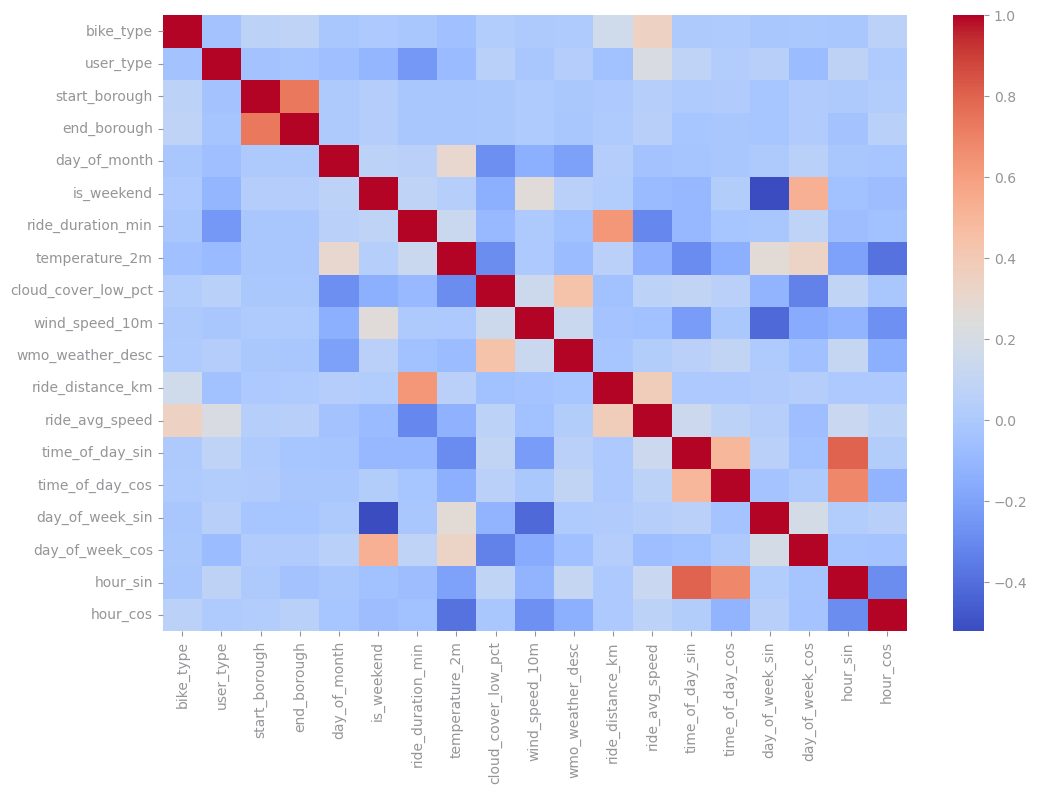

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_prep_feat_var.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.show()

In [47]:
import numpy as np

# Calculate correlation matrix
corr_matrix = df_prep_feat_var.corr()

# Identify pairs of highly correlated features (correlation > 0.8)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Initialize an empty list to store the pairs of highly correlated features
redundant_pairs = []

# Loop through each column to find pairs with correlation > 0.8
for column in upper_tri.columns:
    for row in upper_tri.index:
        if upper_tri.loc[row, column] >=0.7:
            redundant_pairs.append((row, column, upper_tri.loc[row, column]))

# Print initial features count
print(f"Initial number of features: {len(df_prep_feat_var.columns)}")

# Print redundant pairs
print(f"Redundant pairs (correlation > 0.7):")
for pair in redundant_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]}")

# Identify the features to drop based on redundancy
to_drop = [pair[1] for pair in redundant_pairs]

# Print features that will be dropped
print(f"Number of features dropped: {len(to_drop)}")
print(f"Features dropped: {to_drop}")

# Drop the correlated features
df_prep_feat = df_prep_feat_var.drop(columns=to_drop)

# Print remaining features count
print(f"Remaining features: {len(df_prep_feat.columns)}")
print(f"Remaining features: {df_prep_feat.columns.tolist()}")


Initial number of features: 19
Redundant pairs (correlation > 0.7):
start_borough and end_borough: Correlation = 0.7373392383323418
time_of_day_sin and hour_sin: Correlation = 0.8035650320288453
Number of features dropped: 2
Features dropped: ['end_borough', 'hour_sin']
Remaining features: 17
Remaining features: ['bike_type', 'user_type', 'start_borough', 'day_of_month', 'is_weekend', 'ride_duration_min', 'temperature_2m', 'cloud_cover_low_pct', 'wind_speed_10m', 'wmo_weather_desc', 'ride_distance_km', 'ride_avg_speed', 'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_cos']


In [108]:
display(df.shape) # original df
display(df_enc.shape) # df after enconding
display(df_prep_outl_trunc.shape) # df after enconding and data prep outlier removal
display(df_prep_feat_var.shape) 
display(df_prep_feat.shape) 

(11178, 17)

(11178, 20)

(11178, 20)

(11178, 19)

(11178, 17)

### Feature Selection outcome

- In Feature selection, we removed both features with low variance (<0.1) and also redundant features with a pearson corelation > 0,7.
    - df_prep_feat = df_prep_feat_var.drop(columns=to_drop)


# Cluster Application Techinques 

In [48]:
use_df_in_clust = "df_prep_feat"

In [49]:

# Escolher o DataFrame a ser utilizado com base na variável 'use_df_in_clust' (clustering)
if use_df_in_clust == "df_enc":
    df_to_use_clust = df_enc
elif use_df_in_clust == "df_prep_outl":
    df_to_use_clust = df_prep_outl_trunc
elif use_df_in_clust == "df_prep_scal":
    df_to_use_clust = df_prep_scal
elif use_df_in_clust == "df_prep_feat":
    df_to_use_clust = df_prep_feat
else:
    raise ValueError(f"Invalid DataFrame choice: {use_df_in_clust}. Choose either 'df_enc' or 'df_prep_outl'.")

print(f"We will use the dataset {use_df_in_clust} dataset, which means that we are {'not ' if use_df_in_clust == 'df_enc' else ''}considering the removal of outliers and also scaled data, and also removal of non relevant features")
print(f"Shape of dataset: {df_to_use_clust.shape}")

We will use the dataset df_prep_feat dataset, which means that we are considering the removal of outliers and also scaled data, and also removal of non relevant features
Shape of dataset: (11178, 17)


## K means Clustering

### Elbow method study

#### Elbow method - definition

The Elbow Method is a heuristic technique used to determine the optimal number of clusters (k) in K-Means clustering. It works by plotting the Sum of Squared Distances (SSD), also called inertia, for different values of k.

The SSD represents how tightly the data points are grouped within their respective clusters (coesão dos clusters) —the lower the SSD, the better the clustering. However, increasing k will always decrease the SSD, so the goal is to find a balance:

- Too few clusters → High SSD, underfitting the data.
- Too many clusters → Very low SSD, but overfitting, leading to unnecessary complexity.
The elbow point is where adding more clusters does not significantly reduce SSD. This is visually identified as the point where the curve bends like an elbow.

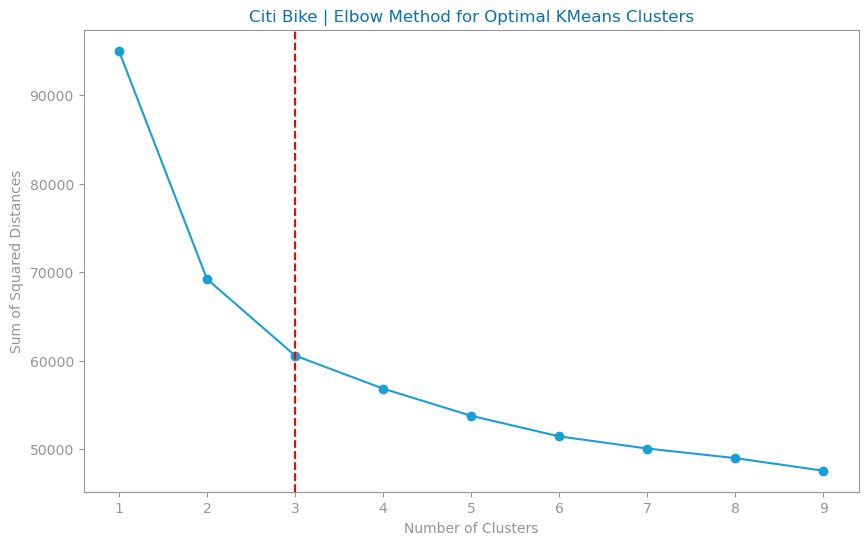

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Define the range of clusters to evaluate
range_n_clusters = list(range(1, 10))

# Initialize an empty list to store the sum of squared distances
ssd = []

# Loop over the range of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_to_use_clust)
    ssd.append(kmeans.inertia_)

# Determine the elbow point using KneeLocator
kneedle = KneeLocator(range_n_clusters, ssd, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow

## Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, ssd, marker='o')
plt.title(f'{file_tag} | Elbow Method for Optimal KMeans Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')

# Add a vertical line at the elbow point
plt.axvline(x=elbow_point, color='r', linestyle='--')

plt.show()


#### Analysis of Elbow Method for Optimal KMeans Clusters

- The x-axis represents the number of clusters (k).
- The y-axis represents the Sum of Squared Distances (SSD).
- The red dashed line marks k = 3, which is likely the optimal number of clusters.

Why k=3?

- The SSD decreases rapidly between k=1 and k=3, indicating that adding clusters significantly improves compactness.
- After k=3, the rate of SSD reduction slows down, meaning additional clusters provide diminishing returns.
- The elbow shape is visible at k=3, supporting this choice as the best trade-off between variance explained and simplicity.

In [51]:
print(f"Elbow Point: {elbow_point}")


Elbow Point: 3


### Sillhouete study for kmeans

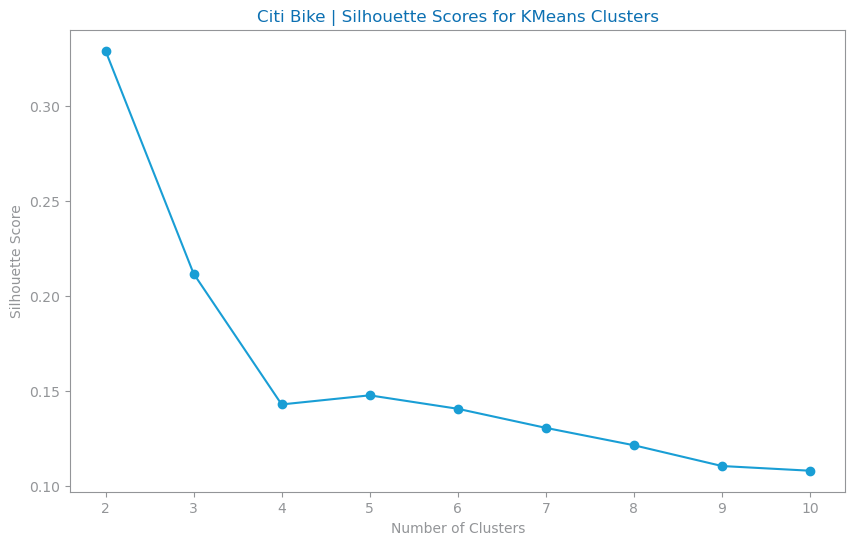

In [52]:
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

# Define the range of clusters to evaluate
range_n_clusters = list(range(2, 11))

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Loop over the range of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_to_use_clust)
    silhouette_avg = silhouette_score(df_to_use_clust, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title(f'{file_tag} | Silhouette Scores for KMeans Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Kmeans model

In [101]:
# Clustering
citibike_kmeans = KMeans(n_clusters=3, random_state=42)

citibike_y_pred_kmeans = citibike_kmeans.fit_predict(df_to_use_clust)

citibike_kmeans.cluster_centers_

array([[-3.19524200e-01, -3.20344545e-01,  4.66682780e-01,
         7.67315129e-02,  3.43314192e-01,  1.61521634e+00,
         2.85117878e-01,  2.42079769e-01,  4.09948515e-02,
        -3.22123864e-01,  1.22673597e+00, -1.56914346e-01,
         1.16140653e-01, -1.23912058e-01,  8.93843797e-02,
         1.20548857e-01,  1.53484771e-01],
       [-3.44389661e-01, -1.53145077e-01,  4.44318379e-01,
         2.71819171e-02,  2.88659794e-01, -1.29794403e-01,
         1.02405043e-01,  2.15150157e-01, -1.48934270e-02,
        -3.29600171e-01, -8.41321814e-02, -3.36574711e-03,
         1.90086720e-01, -1.04616607e-01,  1.08083132e-01,
         7.17977949e-02,  2.37604392e-01],
       [-3.21446019e-01, -1.47044455e-01,  4.37168418e-01,
        -3.51943611e-01,  1.35808500e-01,  8.62401070e-02,
        -2.82352548e-01,  3.99467556e+00,  2.19977645e-01,
         3.41290600e-01,  1.32683823e-01,  8.95081695e-02,
         2.64588149e-01, -3.32556543e-02,  1.32710188e-03,
        -2.99236987e-01,  1.9

## Hierarchical Clustering - Agglomerative

### Sillouette Study for Agglomerative

In [55]:
from sklearn.cluster import AgglomerativeClustering

def evaluate_agglomerative_clustering(X, 
                                      n_clusters_list=[2, 3, 4, 5], 
                                      metric_list=['euclidean', 'manhattan', 'cosine', 'chebyshev', 'hamming'], 
                                      linkage_list=['ward', 'complete', 'average', 'single'],
                                      scale='no',
                                      title='Silhouette Scores for Different Clustering Parameters'):
    # Scale the data if required
    if scale == 'yes':
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Store the results
    results = []

    for n_clusters in n_clusters_list:
        for metric in metric_list:
            for linkage in linkage_list:
                if linkage == 'ward' and metric != 'euclidean':
                    continue  # Ward linkage only works with Euclidean distance
                clustering = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
                labels = clustering.fit_predict(X)
                score = silhouette_score(X, labels)
                results.append((n_clusters, metric, linkage, score))

    # Convert results to a structured array for easy plotting
    dtype = [('n_clusters', int), ('metric', 'U10'), ('linkage', 'U10'), ('score', float)]
    results = np.array(results, dtype=dtype)

    # Plot the results
    fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharex=True)
    axes = axes.flatten()
    
    for ax, linkage in zip(axes, linkage_list):
        for metric in metric_list:
            subset = results[(results['metric'] == metric) & (results['linkage'] == linkage)]
            ax.plot(subset['n_clusters'], subset['score'], label=f'{metric}')
            for (n_clusters, score) in zip(subset['n_clusters'], subset['score']):
                ax.text(n_clusters, score, f'{score:.2f}', fontsize=8, ha='right')
        
        ax.set_title(f'Linkage: {linkage}')
        ax.set_xlabel('Number of Clusters')
        ax.set_ylabel('Silhouette Score')
        ax.legend(loc='upper right')
        ax.set_xticks(n_clusters_list)
        ax.set_xticklabels([str(n) for n in n_clusters_list])
    
    fig.suptitle(title, fontsize=16)
    plt.show()



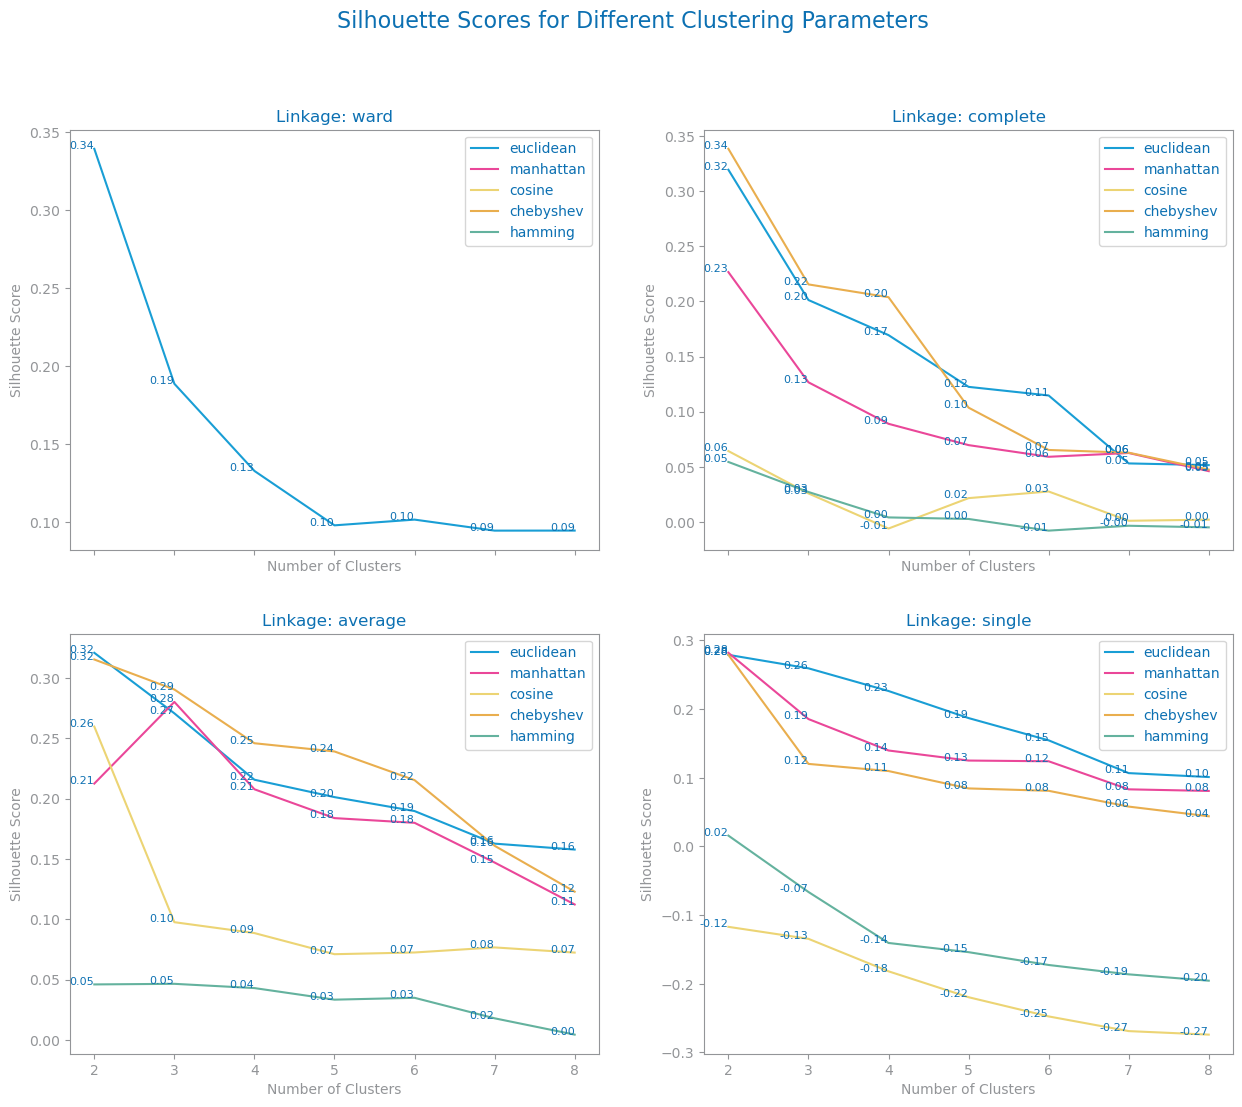

In [56]:
evaluate_agglomerative_clustering(df_to_use_clust, n_clusters_list=[2, 3, 4, 5,6,7,8], scale='no')

### Dendrogram

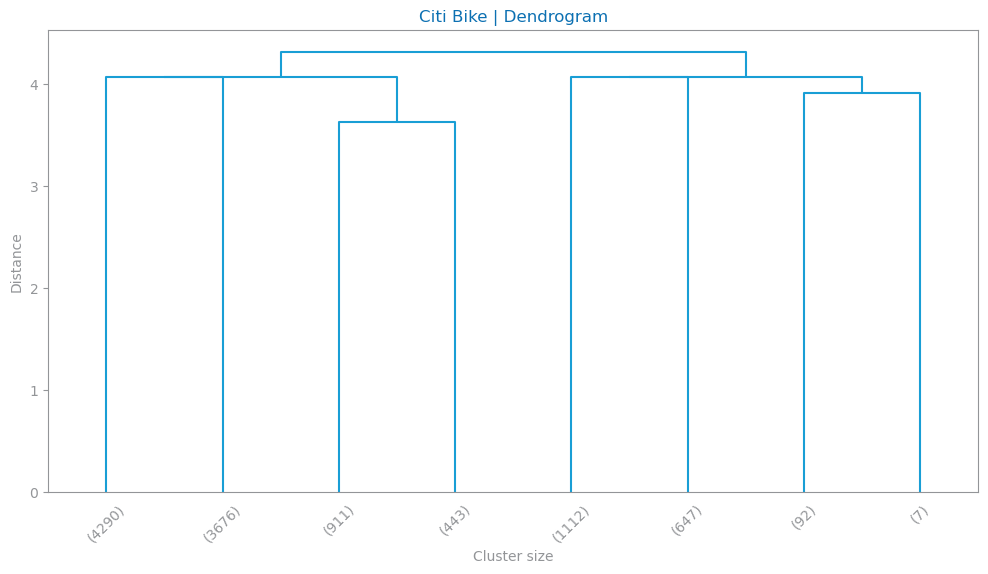

In [236]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate the linkage matrix
Z = linkage(df_to_use_clust, method='complete', metric='chebyshev')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=2, leaf_rotation=45., leaf_font_size=10., count_sort='descending', distance_sort = 'descending'), 
plt.title(f'{file_tag} | Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()


In [172]:
df_to_use_clust.shape


(16647, 15)

### Agglomerative Model

In [169]:
from sklearn.cluster import AgglomerativeClustering

citibike_agglo = AgglomerativeClustering(n_clusters=2, metric='chebyshev', linkage='complete' )
#citibike_agglo = AgglomerativeClustering(n_clusters=2, metric='chebyshev', linkage='complete' )

#citibike_agglo = AgglomerativeClustering(n_clusters=2, metric='chebyshev', linkage='average' )
citibike_y_pred_agglo = citibike_agglo.fit_predict(df_to_use_clust)

citibike_y_pred_agglo

array([0, 0, 0, ..., 0, 0, 1])

# Clustering approaches Evaluation

In [187]:

from sklearn.metrics import silhouette_score, adjusted_rand_score


# Intrinsic Evaluation
silhouette_kmeans = silhouette_score(df_to_use_clust, citibike_y_pred_kmeans)
silhouette_agglo = silhouette_score(df_to_use_clust, citibike_y_pred_agglo)

print(f'Silhouette Score for KMeans: {silhouette_kmeans}')
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agglo}')


Silhouette Score for KMeans: 0.21192413435051635
Silhouette Score for Agglomerative Clustering: 0.3384992766031332


# Clustering visualization

## Cluster Labeling

In [188]:
df_to_use_clust_labeled = df_prep_outl_trunc.copy()

In [189]:
# Add cluster labels to the dataframe before scaling and feature generation
df_to_use_clust_labeled['kmeans_cluster'] = citibike_y_pred_kmeans
df_to_use_clust_labeled['agglo_cluster'] = citibike_y_pred_agglo

# Display the dataframe with the new cluster labels
df_to_use_clust_labeled.head(20)

bike_type  user_type  start_borough  end_borough  day_of_month  \
744055           1          0       0.000000     0.000000            16   
468836           1          0       0.000000     0.000000            15   
2522419          1          1       1.000000     1.000000            14   
755587           1          0       0.000000     1.975707             8   
2140215          1          1       1.000000     1.000000            15   
933964           1          0       0.000000     0.000000             8   
1507330          1          1       1.000000     0.000000            15   
2066150          1          1       1.000000     1.000000             4   
2691883          1          1       1.000000     1.000000            30   
1489524          1          1       1.000000     1.000000            21   
2786739          0          1       1.974747     1.975707             4   
3094679          1          1       1.000000     1.000000            21   
1036576          0          1       1.000000     1.975707            19   
1718579          1          1       0.000000     0.000000             5   
2699290          1          0       0.000000     0.000000            27   
1091459          1          1       0.000000     0.000000            22   
1802214          1          1       0.000000     0.000000             5   
2948725          1          1       0.000000     0.000000            13   
3146702          0          1       0.000000     0.000000            17   
3106365          1          1       0.000000     0.000000            25   

         is_weekend  ride_duration_min  temperature_2m  rain_mm  \
744055            0           3.669550            20.3      0.0   
468836            0           7.038317            21.1      0.0   
2522419           1          12.097800            22.0      0.0   
755587            0           8.543300             4.1      0.0   
2140215           0           8.910200            15.9      0.0   
933964            0          15.665583            10.0      0.1   
1507330           0          27.816450            15.9      0.0   
2066150           0           9.507400             4.8      0.5   
2691883           0           4.356400            12.6      0.0   
1489524           1          14.657083            11.4      0.0   
2786739           0           4.866000             4.6      0.0   
3094679           1          11.463217            11.4      0.0   
1036576           0           2.644283            10.5      0.0   
1718579           0           7.390050             5.3      0.0   
2699290           1           4.625483            14.3      0.0   
1091459           0           3.441083            12.6      0.0   
1802214           0          20.706183             5.4      0.0   
2948725           1           7.283250             8.9      0.3   
3146702           0          22.156700            12.5      0.0   
3106365           0           4.533000            12.0      0.0   

         cloud_cover_low_pct  ...  ride_distance_km  ride_avg_speed  \
744055              0.000000  ...          0.574933        9.400602   
468836              0.000000  ...          1.090909        9.299742   
2522419             0.000000  ...          2.593736       12.863842   
755587              0.000000  ...          2.428583       17.056054   
2140215             0.000000  ...          1.192552        8.030470   
933964              0.000000  ...          3.077542       11.787144   
1507330             0.000000  ...          4.051324        8.738693   
2066150            90.556576  ...          2.248435       14.189587   
2691883            90.556576  ...          0.890871       12.269818   
1489524             0.000000  ...          3.377387       13.825618   
2786739            16.000000  ...          1.036337       12.778510   
3094679             0.000000  ...          2.142587       11.214583   
1036576            55.000000  ...          0.363350        8.244574   
1718579             0.000000  .

In [155]:
display(df_to_use_clust.shape)
display(df_to_use_clust_labeled.shape)

(8623, 20)

(8623, 22)

##  Cluster Counts

In [190]:
# Group by kmeans_cluster and count the number of rides
kmeans_cluster_counts = df_to_use_clust_labeled.groupby('kmeans_cluster').size()

# Group by agglo_cluster and count the number of rided
agglo_cluster_counts = df_to_use_clust_labeled.groupby('agglo_cluster').size()

print("KMeans Cluster Counts:")
print(kmeans_cluster_counts)

print("\nAgglomerative Clustering Counts:")
print(agglo_cluster_counts)

KMeans Cluster Counts:
kmeans_cluster
0    2436
1    6695
2    2047
dtype: int64

Agglomerative Clustering Counts:
agglo_cluster
0    9320
1    1858
dtype: int64


## Cluster description boxplots

In [233]:

import seaborn as sns

def plot_cluster_boxplots(dataframe, features, cluster_labels):
    """
    Plots boxplots for the given features in the dataframe, comparing the specified cluster labels.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data.
    features (list): List of features to plot.
    cluster_labels (list): List of cluster labels to compare.
    """
    # Create subplots
    fig, axes = plt.subplots(nrows=len(features), ncols=len(cluster_labels), figsize=(15, 5 * len(features)))

    # Loop through each feature and create boxplots
    for i, feature in enumerate(features):
        for j, cluster_label in enumerate(cluster_labels):
            sns.boxplot(x=cluster_label, y=feature, data=dataframe, ax=axes[i, j])
            axes[i, j].set_title(f'{cluster_label} - {feature}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [234]:
# Get selected features
selected_features_clust = df_to_use_clust.columns
print(selected_features_clust)

Index(['bike_type', 'user_type', 'start_borough', 'day_of_month', 'is_weekend',
       'ride_duration_min', 'temperature_2m', 'cloud_cover_low_pct',
       'wind_speed_10m', 'wmo_weather_desc', 'ride_distance_km',
       'ride_avg_speed', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_cos'],
      dtype='object')


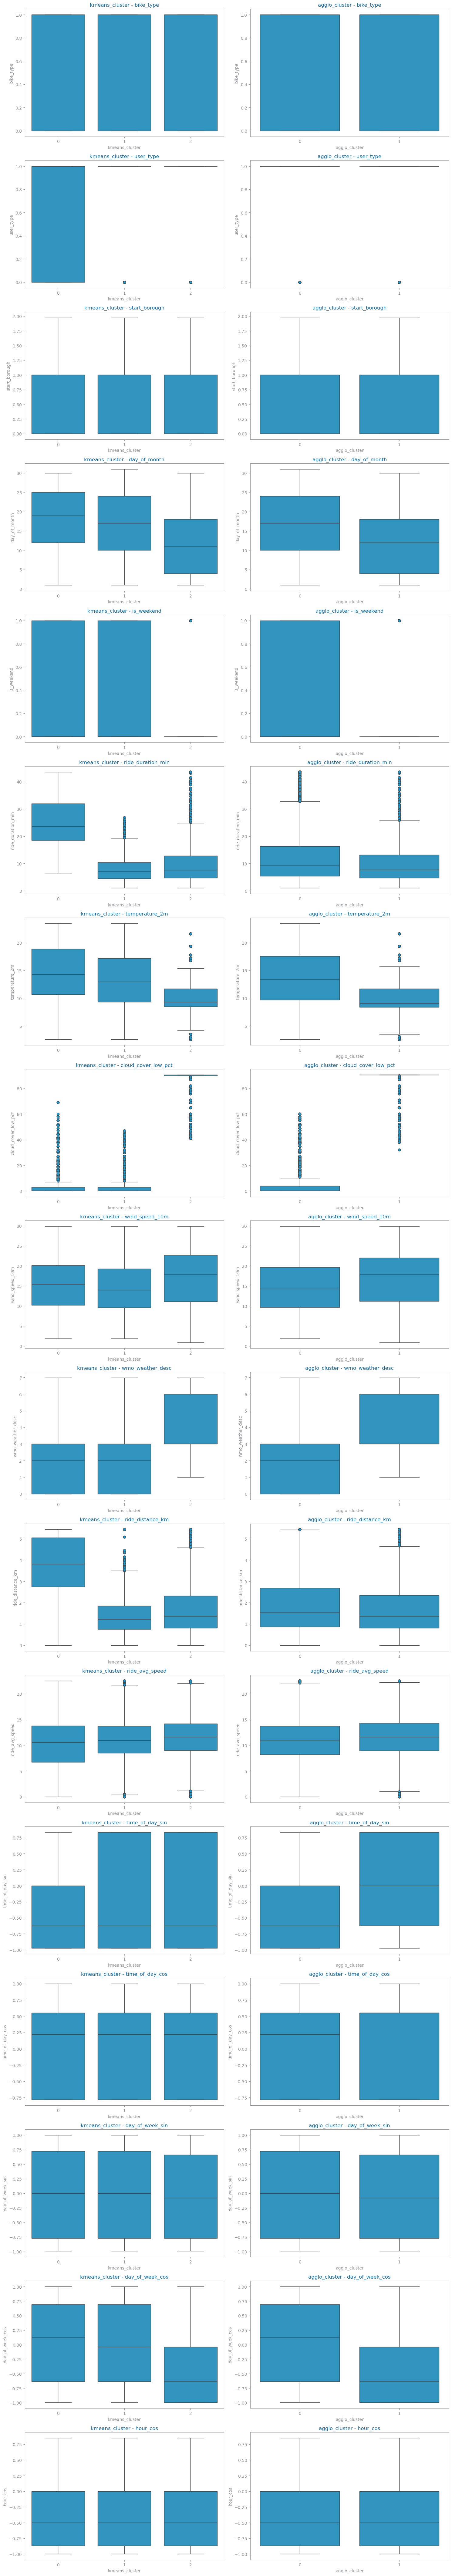

In [235]:
features = selected_features_clust

cluster_labels = ['kmeans_cluster', 'agglo_cluster']
plot_cluster_boxplots(df_to_use_clust_labeled, features, cluster_labels)

In [228]:
# Agrupar por cluster e calcular a média das features
cluster_means_agglo = df_to_use_clust_labeled.groupby('agglo_cluster').mean()

# Exibir o resultado
print(cluster_means_agglo)

               bike_type  user_type  start_borough  end_borough  day_of_month  \
agglo_cluster                                                                   
0               0.662017   0.803433       0.451085     0.453743     17.417382   
1               0.681378   0.851991       0.431843     0.430250     12.258342   

               is_weekend  ride_duration_min  temperature_2m   rain_mm  \
agglo_cluster                                                            
0                0.301609          12.433036       13.550761  0.038396   
1                0.127018          10.409765       10.072309  0.134631   

               cloud_cover_low_pct  ...  wmo_weather_desc  ride_distance_km  \
agglo_cluster                       ...                                       
0                         5.668884  ...          2.044594          1.951284   
1                        86.931711  ...          4.090522          1.766853   

               ride_avg_speed  time_of_day_sin  time_of_day_c

## Cluster Centroids -  Heatmap For Feature Importance)
Another way to analyze clustering is by visualizing the centroid values for each feature.

Heatmap of Cluster Centroids: Helps interpret which features are important for each cluster.



In [197]:
print(len(df_to_use_clust.columns))  # Deve ser 22 para bater certo com os centroids


17


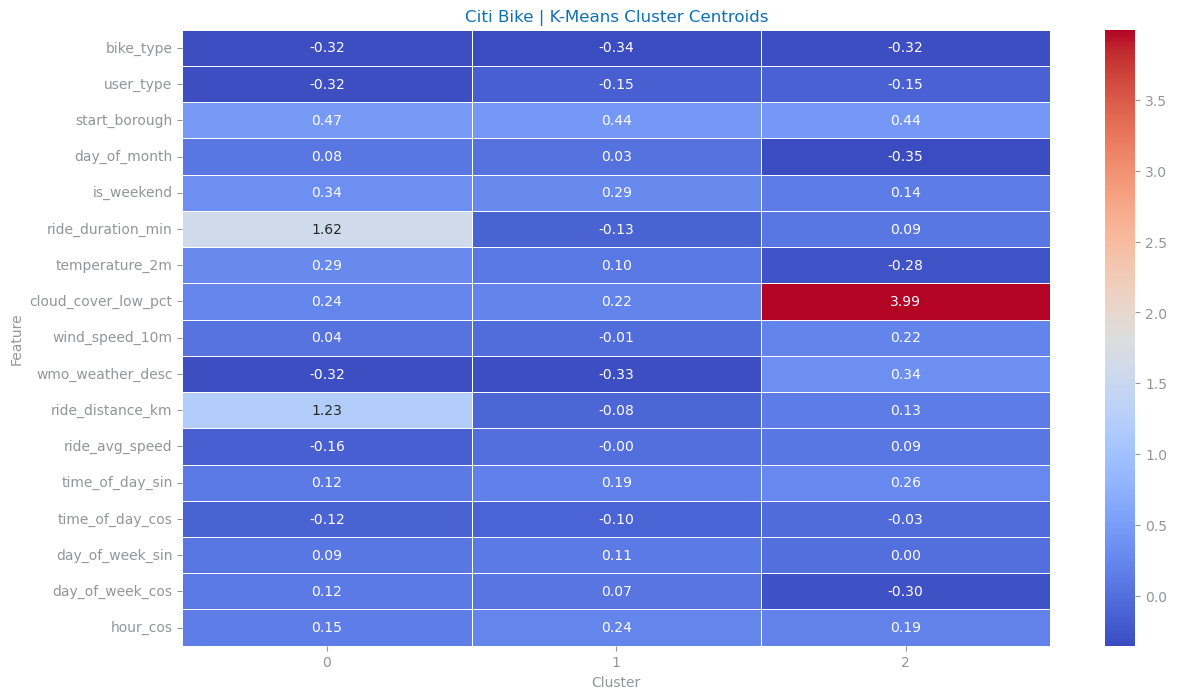

In [202]:
import seaborn as sns
import pandas as pd

# Create a dataframe of centroids
centroids = pd.DataFrame(citibike_kmeans.cluster_centers_, columns=df_to_use_clust.columns)

# Plot a heatmap of feature values for each cluster
plt.figure(figsize=(14, 8))
sns.heatmap(centroids.T, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title(f'{file_tag} | K-Means Cluster Centroids')
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()


## PCA

### PCA visualization

In [185]:
from sklearn.decomposition import PCA

#df.drop(columns=['kmeans_cluster', 'agglo_cluster'], inplace=True)
df_to_use_clust
# Visualization
pca_reorder = PCA(n_components=5)
numeric_features_pca = pca_reorder.fit_transform(df_to_use_clust)

pca_reorder_df = pd.DataFrame(numeric_features_pca, columns=[f'PC{i+1}' for i in range(numeric_features_pca.shape[1])])
pca_reorder_df.head()

PC1       PC2       PC3       PC4       PC5
0 -1.054238 -1.049128 -0.564718 -0.420186 -0.629901
1 -1.230839 -0.678145 -0.304782  0.342155 -0.733293
2 -1.176901  0.206540  0.175188 -1.143915 -0.081803
3 -0.752036 -0.387800  1.558447  0.614708  0.131340
4 -1.049938 -0.663331 -0.143373  0.619374  0.352259

In [107]:
df_to_use_clust.shape

(10271, 15)

### PCA explained variance ratio

In [186]:
# Fit the PCA model


pca_reorder.fit(df_to_use_clust)

# Explained variance ratio
explained_variance_reorder = pca_reorder.explained_variance_ratio_
total_variance_explained = explained_variance_reorder.sum()

print(f'Explained variance ratio: {explained_variance_reorder}')
print(f'Total variance explained: {total_variance_explained:.4f}')


Explained variance ratio: [0.3101407  0.14580992 0.10737542 0.07630278 0.0628176 ]
Total variance explained: 0.7024


### PCA plot

#### 2D PCA Plot

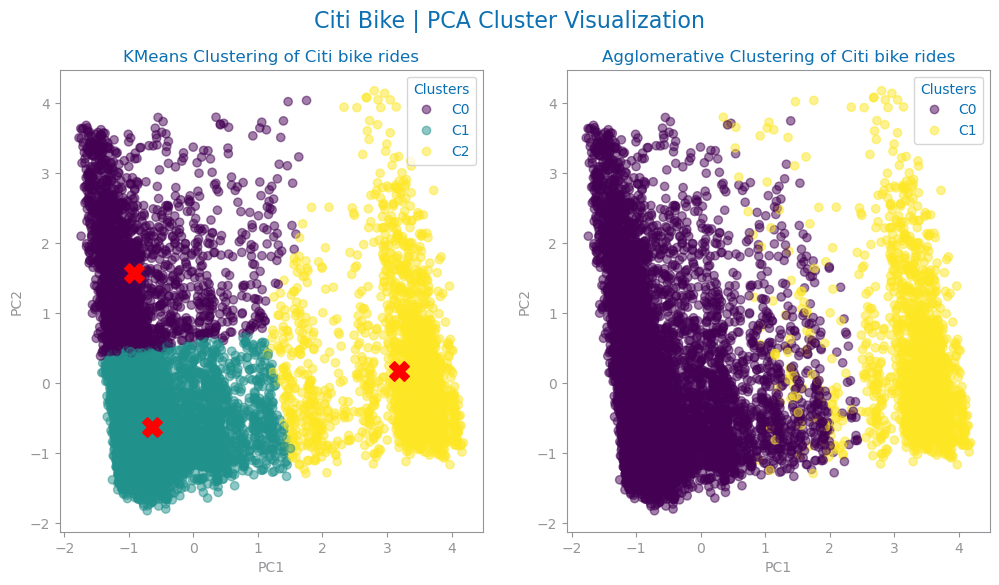

In [216]:
plt.figure(figsize=(12, 6))

# KMeans Clustering
plt.subplot(121)
scatter_kmeans = plt.scatter(pca_reorder_df['PC1'], pca_reorder_df['PC2'], c=citibike_y_pred_kmeans, cmap='viridis', alpha=0.5)
kmeans_centroids = pca_reorder.transform(citibike_kmeans.cluster_centers_)
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering of Citi bike rides')

# Add legend with labels for clusters as 0, 1, 2
handles, labels = scatter_kmeans.legend_elements()
labels = [f'C{i}' for i in range(len(labels))]  # Labels as C0, C1, C2...
plt.legend(handles, labels, title="Clusters")

# Agglomerative Clustering
plt.subplot(122)
scatter_agglo = plt.scatter(pca_reorder_df['PC1'], pca_reorder_df['PC2'], c=citibike_y_pred_agglo, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering of Citi bike rides')

# Add legend with labels for clusters as 0, 1, 2
handles, labels = scatter_agglo.legend_elements()
labels = [f'C{i}' for i in range(len(labels))]  # Labels as C0, C1, C2...
plt.legend(handles, labels, title="Clusters")

plt.suptitle(f"{file_tag} | PCA Cluster Visualization", fontsize=16)

plt.show()


#### 3D PCA Plot

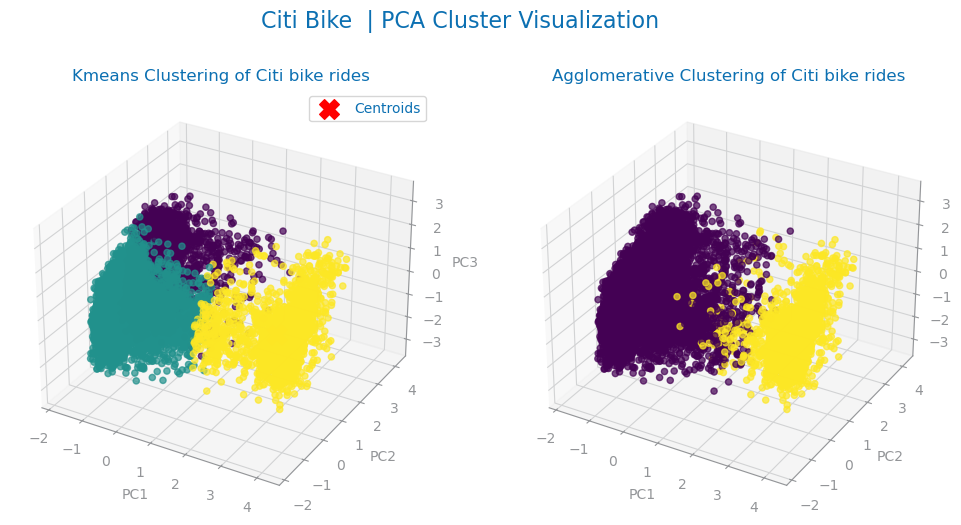

In [217]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))

# KMeans Clustering
ax = fig.add_subplot(121, projection='3d')
ax.scatter(pca_reorder_df['PC1'], pca_reorder_df['PC2'], pca_reorder_df['PC3'], c=citibike_y_pred_kmeans, cmap='viridis', alpha=0.7)
kmeans_centroids_3d = pca_reorder.transform(citibike_kmeans.cluster_centers_)
ax.scatter(kmeans_centroids_3d[:, 0], kmeans_centroids_3d[:, 1], kmeans_centroids_3d[:, 2], c='red', marker='X', s=200, label='Centroids')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Kmeans Clustering of Citi bike rides')
ax.legend()

# Agglomerative Clustering
ax = fig.add_subplot(122, projection='3d')
ax.scatter(pca_reorder_df['PC1'], pca_reorder_df['PC2'], pca_reorder_df['PC3'], c=citibike_y_pred_agglo, cmap='viridis', alpha=0.7)
# Agglomerative clustering does not have centroids, so we skip this part
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Agglomerative Clustering of Citi bike rides')

fig.suptitle(f"{file_tag}  | PCA Cluster Visualization", fontsize=16)

plt.show()

# Merged from _5_citibike_pattern_mining.ipynb

# Pattern Analysis


# File and libraries

In [1]:
import pandas as pd
import scipy.stats as stats
from mlxtend.frequent_patterns import apriori, association_rules


## DSLabs

In [2]:
%run "scripts/dslabs_functions.py"

dslabs_functions lodaded


# data functions

In [3]:
%run "scripts/data_functions.py"

dslabs_functions lodaded
data_functions lodaded


# Load

In [4]:
import pandas as pd
import numpy as np



#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'data/citi_bike_pre_proc.csv'

excel_mapping_filepath=r'data/citi_bike_values_encoded_pattern_analysis.xlsx'

file_tag = 'Citi Bike'



- For Patter mining, a sample of 320k rows (10% of initial dataset) will be used due to memory constraints when applyng the patter mining algorithms

In [7]:
test_data = True
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.1, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)

id_cols=['ride_id',
         'start_time', 
         'end_time',
         'start_station',
         'end_station',
         'start_station_id',
         'end_station_id',
         'start_lat',
         'start_lng', 
         'hour',
         'end_lat',
         'day_of_month',
         'end_lng',
         'wmo_weather_code',
         'snowfall_cm',
         'ride_duration_sec']
#remove also col = 'snowfall_cm' because it has only 0 values in our dataset
#remove also start_station and end_Station = they have too many unique values(around 2k) which will make the encoding process very slow

# Remove unnecessary columns
df = df.drop(columns=id_cols, axis=1)

df_enc = df.copy()  # DataFrame com as variáveis codificadas

display(df_enc.info())
display(df_enc.shape)


#alterar consoante a necessidade:
#- se quiser considerar a remoçao de outliers, alterar para "df_prep_outl"
#- se nao quiser considerar a remoçao de outliers, alterar para "df_enc"
use_df = "df_enc"  # Pode ser "df_enc" ou "df_prep_outl"
#alterar consoante a necessidade:

#- se quiser considerar a remoçao de outliers, alterar para "df_prep_outl"
#- se nao quiser considerar a remoçao de outliers, alterar para "df_enc"
#use_df_in_scaling = "df_prep_outl_remov_final"  # Pode ser "df_enc" ou "df_prep_outl"
use_df_in_feat_eng = "df_prep_outl"  # Pode ser "df_enc", "df_prep_outl", "df_prep_scal"
use_df_in_pattern = "df_prep_feat"  # Pode ser "df_enc", "df_prep_outl", "df_prep_scal", "df_prep_feat_eng"



<class 'pandas.core.frame.DataFrame'>
Index: 319360 entries, 291527 to 2773263
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bike_type            319360 non-null  object 
 1   user_type            319360 non-null  object 
 2   start_borough        319360 non-null  object 
 3   end_borough          319360 non-null  object 
 4   day_of_week          319360 non-null  object 
 5   is_weekend           319360 non-null  int64  
 6   time_of_day          319360 non-null  object 
 7   ride_duration_min    319360 non-null  float64
 8   temperature_2m       319360 non-null  float64
 9   rain_mm              319360 non-null  float64
 10  cloud_cover_low_pct  319360 non-null  int64  
 11  wind_speed_10m       319360 non-null  float64
 12  wmo_weather_desc     319360 non-null  object 
 13  ride_distance_km     319360 non-null  float64
 14  ride_avg_speed       319360 non-null  float64
dtypes: float64(6), i

None

(319360, 15)

In [8]:
summary = df.describe(include='all')

display(summary)

bike_type user_type start_borough end_borough day_of_week  \
count          319360    319360        319360      319360      319360   
unique              2         2             5           6           7   
top     electric_bike    member     Manhattan   Manhattan      Monday   
freq           209407    260146        201988      201745       57076   
mean              NaN       NaN           NaN         NaN         NaN   
std               NaN       NaN           NaN         NaN         NaN   
min               NaN       NaN           NaN         NaN         NaN   
25%               NaN       NaN           NaN         NaN         NaN   
50%               NaN       NaN           NaN         NaN         NaN   
75%               NaN       NaN           NaN         NaN         NaN   
max               NaN       NaN           NaN         NaN         NaN   

           is_weekend time_of_day  ride_duration_min  temperature_2m  \
count   319360.000000      319360      319360.000000   319360.000000   
unique            NaN           4                NaN             NaN   
top               NaN   afternoon                NaN             NaN   
freq              NaN      104334                NaN             NaN   
mean         0.271127         NaN          12.984633       13.084952   
std          0.444542         NaN          20.009211        5.265910   
min          0.000000         NaN           1.003550        0.600000   
25%          0.000000         NaN           5.169162        9.100000   
50%          0.000000         NaN           8.968958       12.500000   
75%          1.000000         NaN          15.709400       17.100000   
max          1.000000         NaN        1472.693167       28.100000   

              rain_mm  cloud_cover_low_pct  wind_speed_10m wmo_weather_desc  \
count   319360.000000        319360.000000   319360.000000           319360   
unique            NaN                  NaN             NaN                9   
top               NaN                  NaN             NaN         Overcast   
freq              NaN                  NaN             NaN           137360   
mean         0.078783            20.024324       15.413286              NaN   
std          0.364624            34.897904        7.224561              NaN   
min          0.000000             0.000000        0.800000              NaN   
25%          0.000000             0.000000        9.800000              NaN   
50%          0.000000             0.000000       14.900000              NaN   
75%          0.000000            20.000000       20.300000              NaN   
max          6.400000           100.000000       39.800000              NaN   

        ride_distance_km  ride_avg_speed  
count      319360.000000   319360.000000  
unique               NaN             NaN  
top                  NaN             NaN  
freq                 NaN             NaN  
mean            2.009805       11.013313  
std             1.758686        6.115511  
min             0.000000        0.000000  
25%             0.841743        8.274242  
50%             1.489346       10.995914  
75%             2.609769       13.847302  
max            25.229929      738.138233

In [9]:
display(df_enc.columns)

display(df_enc.shape)

Index(['bike_type', 'user_type', 'start_borough', 'end_borough', 'day_of_week',
       'is_weekend', 'time_of_day', 'ride_duration_min', 'temperature_2m',
       'rain_mm', 'cloud_cover_low_pct', 'wind_speed_10m', 'wmo_weather_desc',
       'ride_distance_km', 'ride_avg_speed'],
      dtype='object')

(319360, 15)

In [56]:
df.head()

bike_type user_type start_borough end_borough day_of_week  \
319091    classic_bike    casual      Brooklyn   Manhattan    Thursday   
625839   electric_bike    member     Manhattan   Manhattan     Tuesday   
286623   electric_bike    member      Brooklyn    Brooklyn      Monday   
2781924  electric_bike    member      Brooklyn    Brooklyn     Tuesday   
149011   electric_bike    member      Brooklyn    Brooklyn    Thursday   

         is_weekend time_of_day  ride_duration_min  temperature_2m  rain_mm  \
319091            0     morning          26.045267             6.4      0.0   
625839            0   afternoon           9.747217            18.4      0.0   
286623            0     morning          16.641967            17.9      0.0   
2781924           0     morning           3.034833             6.9      0.7   
149011            0       night           2.095800             3.9      0.1   

         cloud_cover_low_pct  wind_speed_10m   wmo_weather_desc  \
319091                   100            17.9           Overcast   
625839                     0            15.8          Clear sky   
286623                     0            12.9           Overcast   
2781924                  100            10.3  Drizzle: Moderate   
149011                    18            11.3     Drizzle: Light   

         ride_distance_km  ride_avg_speed  
319091           2.562952        5.904224  
625839           1.082359        6.662576  
286623           0.008199        0.029562  
2781924          0.828236       16.374587  
149011           0.484101       13.859165

# Data encoding for Pattern mining 

## Encoding Detail

- Ordinal enconding:
  - bike_type
    - 0: classic
    - 1: eletric
  - user_type
    - 0: casual
    - 1: member

- Hierachical encoding: Simbolyic Variables
  - start_station
    - (don't consider for now as the encoding of these variables would be realy dificult because we have 2000 diferente stations)
  - end_station
    - (don't consider for now as the encoding of these variables would be realy dificult because we have 2000 diferente stations)
 

- Cyclical enconding: Simbolyic Variables
  - day_of_week
  - time_of_day
  - hour

- Dummyfication:
  - start_borough
  - end_borough
  - wmo_weather_desc 


- Numeric Values that don't need encoding
  - hour
  - day_of_month
  - is_weekend
  - ride_duration_min
  - temperature_2m
  - rain_mm
  - wmo_weather_code ?????
  - cloud_cover_low_pct
  - wind_speed_10m
  - ride_distance_km
  - ride_avg_speed

Note: week_of_month and day in our case are ordinal variables, and not cyclical, because our dataset only has data for 1 month, nov/19, which means that these two variables don't repeat over time in our dataset.

## Ordinal enconding





In [10]:
from pandas import Series, DataFrame, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    
    for c in df.columns:
        if 2 == nr_values[c]:  # Colunas com exatamente 2 valores únicos
            variable_types["binary"].append(c)
        else:
            if df[c].dtype == 'datetime64[ns, UTC]':  # Verifica se a coluna já é datetime
                variable_types["date"].append(c)
            else:
                try:
                    df[c] = to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

# Uso da função
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)

{'numeric': ['ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct', 'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed'], 'binary': ['bike_type', 'user_type', 'is_weekend'], 'date': [], 'symbolic': ['start_borough', 'end_borough', 'day_of_week', 'time_of_day', 'wmo_weather_desc']}


##### bulk Symbolic mapping through Excel

    - Simbolyc
        -...

    - Binary
        - is_weekend
        - bike_type
            - 0: classic
            - 1: eltric
        - user_type
            - 0: classic
            - 1: member

In [11]:


# Generalized function to encode any column based on a mapping dictionary
def encode_column_with_mapping(df, column, mapping_dict, default_value=np.nan):
    """
    Encode a column based on a mapping dictionary.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the column to encode.
    column (str): The column name to encode.
    mapping_dict (dict): Dictionary where keys are the original values and values are the encodings.
    default_value: Value to assign if the key is not found in the mapping dict (default is NaN).
    
    Returns:
    pd.Series: Encoded column.
    """
    return df[column].map(mapping_dict).fillna(default_value)



def sheet_to_dict(excel_file, sheet_name):
    """
    Converts a sheet in an Excel file to a dictionary with the first column as the key and the second as the value.
    
    Args:
    excel_file (str): Path to the Excel file.
    sheet_name (str): Name of the sheet to convert.
    
    Returns:
    dict: A dictionary with keys from the first column and values from the second column.
    """
    # Read the sheet into a DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Ensure that there are at least two columns
    if df.shape[1] < 2:
        raise ValueError(f"The sheet '{sheet_name}' does not have at least two columns.")
    
    # Create a dictionary from the first and second columns
    mapping_dict = dict(zip(df.iloc[:, 0], df.iloc[:, 1]))
    
    return mapping_dict



In [12]:
excel_file = pd.ExcelFile(excel_mapping_filepath)
sheet_names = excel_file.sheet_names  # List of all sheet names

# Iterate over each sheet and map the corresponding column
for sheet in sheet_names:
    # Assuming the sheet names match the column names in data_enc
    if sheet in df_enc.columns:
        # Load the sheet as a dictionary
        category_mapping = sheet_to_dict(excel_mapping_filepath, sheet)
        
        # Encode the corresponding column in data_enc using the mapping
        df_enc[sheet] = encode_column_with_mapping(df_enc, sheet, category_mapping)
        print(f'{sheet} column encoded')

    else:
        print(f"Warning: No matching column found in data_enc for sheet '{sheet}'")




bike_type column encoded
user_type column encoded


In [60]:
display(df_enc['bike_type'].value_counts())
display(df_enc['user_type'].value_counts())


bike_type
1    208951
0    110409
Name: count, dtype: int64

user_type
1    260063
0     59297
Name: count, dtype: int64

In [61]:
for v in variable_types["symbolic"]:
    print(v, df_enc[v].unique())

start_borough ['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
end_borough ['Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island' 'Jersey City'
 'Hoboken']
day_of_week ['Thursday' 'Tuesday' 'Monday' 'Saturday' 'Wednesday' 'Sunday' 'Friday']
time_of_day ['morning' 'afternoon' 'night' 'evening']
wmo_weather_desc ['Overcast' 'Clear sky' 'Drizzle: Moderate' 'Drizzle: Light'
 'Partly cloudy' 'Mainly clear' 'Rain: Slight' 'Drizzle: Dense'
 'Rain: Moderate']


## Dummyifcation enconding
- Apply dummyification method to the following variables:
    - bike_type
    - user_type
    - start_borough
    - end_borough
    - wmo_weather_desc
    - day_of_week
    - time_of_day
    - user_type
    - bike_type
    - is_weekend


In [13]:
# Apply one-hot encoding to the symbolic variables
df_enc = pd.get_dummies(df, columns=[
    "bike_type",
    "user_type",
    "is_weekend",
    "start_borough",
    "end_borough", 
    "wmo_weather_desc",
    'day_of_week',
    'time_of_day'], dtype=int)

display(df_enc.head())

ride_duration_min  temperature_2m  rain_mm  cloud_cover_low_pct  \
291527           22.130200             9.3      0.0                   17   
1620715          30.473467             9.8      0.0                    0   
3080788          10.688367            12.9      0.1                   16   
1826785           5.097900             5.4      1.6                  100   
2771051          99.111700            13.1      0.0                    4   

         wind_speed_10m  ride_distance_km  ride_avg_speed  \
291527             27.1          1.835867        4.977452   
1620715            12.8          3.173160        6.247718   
3080788            27.0          1.801181       10.111073   
1826785            27.5          1.597632       18.803417   
2771051            13.8          0.316511        0.191609   

         bike_type_classic_bike  bike_type_electric_bike  user_type_casual  \
291527                        0                        1                 0   
1620715                       1                        0                 0   
3080788                       0                        1                 0   
1826785                       0                        1                 0   
2771051                       1                        0                 1   

         ...  day_of_week_Monday  day_of_week_Saturday  day_of_week_Sunday  \
291527   ...                   0                     0                   0   
1620715  ...                   0                     0                   1   
3080788  ...                   0                     0                   0   
1826785  ...                   0                     0                   0   
2771051  ...                   1                     0                   0   

         day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  \
291527                      0                    0                      0   
1620715                     0                    0                      0   
3080788                     1                    0                      0   
1826785                     0                    0                      1   
2771051                     0                    0                      0   

         time_of_day_afternoon  time_of_day_evening  time_of_day_morning  \
291527                       1                    0                    0   
1620715                      0                    1                    0   
3080788                      0                    1                    0   
1826785                      0                    0                    1   
2771051                      1                    0                    0   

         time_of_day_night  
291527                   0  
1620715                  0  
3080788                  0  
1826785                  0  
2771051                  0  

[5 rows x 44 columns]

In [17]:
df_enc.shape

(319360, 46)

In [245]:
df_enc.columns

Index(['day_of_month', 'ride_duration_min', 'temperature_2m', 'rain_mm',
       'cloud_cover_low_pct', 'wind_speed_10m', 'ride_distance_km',
       'ride_avg_speed', 'bike_type_classic_bike', 'bike_type_electric_bike',
       'user_type_casual', 'user_type_member', 'is_weekend_0', 'is_weekend_1',
       'start_borough_Bronx', 'start_borough_Brooklyn',
       'start_borough_Jersey City', 'start_borough_Manhattan',
       'start_borough_Queens', 'start_borough_Staten Island',
       'end_borough_Bronx', 'end_borough_Brooklyn', 'end_borough_Jersey City',
       'end_borough_Manhattan', 'end_borough_Queens',
       'end_borough_Staten Island', 'wmo_weather_desc_Clear sky',
       'wmo_weather_desc_Drizzle: Dense', 'wmo_weather_desc_Drizzle: Light',
       'wmo_weather_desc_Drizzle: Moderate', 'wmo_weather_desc_Mainly clear',
       'wmo_weather_desc_Overcast', 'wmo_weather_desc_Partly cloudy',
       'wmo_weather_desc_Rain: Moderate', 'wmo_weather_desc_Rain: Slight',
       'day_of_week_Fr

# Data Preparation for Pattern mining

## Outliers Analysis

### Check distribuition of numeric variable to see if we have outliers with strange values


### Boxplot for Single Variable Values

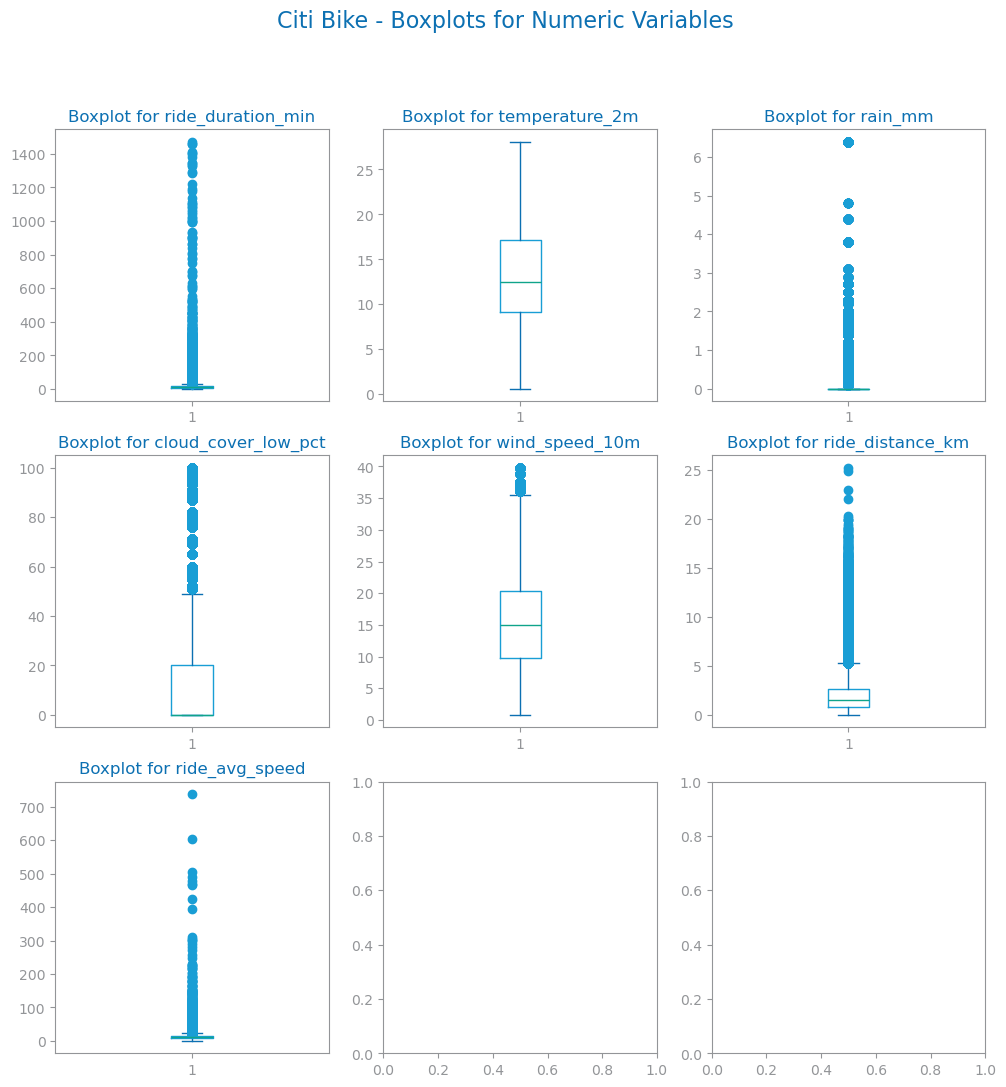

In [14]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT
import pandas as pd

# Obter as variáveis categorizadas pela função get_variable_types
variable_types: dict[str, list] = get_variable_types(df_enc)

# Apenas variáveis numéricas são usadas para os boxplots
numeric = variable_types.get('numeric', [])

# Verificar se a lista de variáveis numéricas não está vazia
if numeric:
    rows, cols = define_grid(len(numeric))  # Definir o número de linhas e colunas com base no número de variáveis
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
    fig.suptitle(f"{file_tag} - Boxplots for Numeric Variables", fontsize=16)

    # Iterar sobre as variáveis numéricas e criar os subplots
    i, j = 0, 0
    for n in numeric:
        # Garantir que apenas valores numéricos são passados para boxplot
        data = df_enc[n].dropna().values
        
        if pd.api.types.is_numeric_dtype(df[n]):
            axs[i, j].set_title(f"Boxplot for {n}")
            axs[i, j].boxplot(data)
        
        # Mover para o próximo subplot
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_profiling_boxplot_single_num_vars.png")
    # Mostrar os gráficos
    show()
else:
    print("There are no numeric variables.")

#### Analysis of the numeric variable boxplots

- Looking at the numerical variables:
    - ride_distance_km
    - ride_avg_speed
    - wind_speed_10m
    - temperature_2m
    - ride_duration_min

- We can see many outliers in ride_distance_km, with some rides lasting up to 1400 minutes (24 hours). On the CitiBike website, it says members can have 45 minutes and casual users and 30 minutes single rides on a single day(24h), and they will have with extra charges for longer trips. 
    - These outliers are likely users who kept the bike for a full day and paid for the extra time.
    - Since these are probably real cases, we’ll keep them in the dataset for analysis.

- In the case of ride_avg_speed, we have values above 100 km/h, which is not possible. According to the citibike website, we can see that the limit of the citi bikes is 18mph(28,9km/h).
    - These are likely cases where, for some reason, the ride duration is incorrect, with very large values relative to a short distance—probably application errors, or cases where users did not turn off the app and the time continued to count.
    - That said, we will remove these observations from the dataset by limiting it to observations with ride_avg_speed < 30 km/h."

### Drop Outliers

In [15]:
df_prep_outl = df_enc.copy()

In [65]:
df_prep_outl.shape

(319360, 45)

In [16]:
df_prep_outl = df_enc[
    (df_enc['ride_avg_speed'] < 30)
]

display(df_prep_outl.shape)
display(df_prep_outl.head())

(318817, 44)

ride_duration_min  temperature_2m  rain_mm  cloud_cover_low_pct  \
291527           22.130200             9.3      0.0                   17   
1620715          30.473467             9.8      0.0                    0   
3080788          10.688367            12.9      0.1                   16   
1826785           5.097900             5.4      1.6                  100   
2771051          99.111700            13.1      0.0                    4   

         wind_speed_10m  ride_distance_km  ride_avg_speed  \
291527             27.1          1.835867        4.977452   
1620715            12.8          3.173160        6.247718   
3080788            27.0          1.801181       10.111073   
1826785            27.5          1.597632       18.803417   
2771051            13.8          0.316511        0.191609   

         bike_type_classic_bike  bike_type_electric_bike  user_type_casual  \
291527                        0                        1                 0   
1620715                       1                        0                 0   
3080788                       0                        1                 0   
1826785                       0                        1                 0   
2771051                       1                        0                 1   

         ...  day_of_week_Monday  day_of_week_Saturday  day_of_week_Sunday  \
291527   ...                   0                     0                   0   
1620715  ...                   0                     0                   1   
3080788  ...                   0                     0                   0   
1826785  ...                   0                     0                   0   
2771051  ...                   1                     0                   0   

         day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  \
291527                      0                    0                      0   
1620715                     0                    0                      0   
3080788                     1                    0                      0   
1826785                     0                    0                      1   
2771051                     0                    0                      0   

         time_of_day_afternoon  time_of_day_evening  time_of_day_morning  \
291527                       1                    0                    0   
1620715                      0                    1                    0   
3080788                      0                    1                    0   
1826785                      0                    0                    1   
2771051                      1                    0                    0   

         time_of_day_night  
291527                   0  
1620715                  0  
3080788                  0  
1826785                  0  
2771051                  0  

[5 rows x 44 columns]

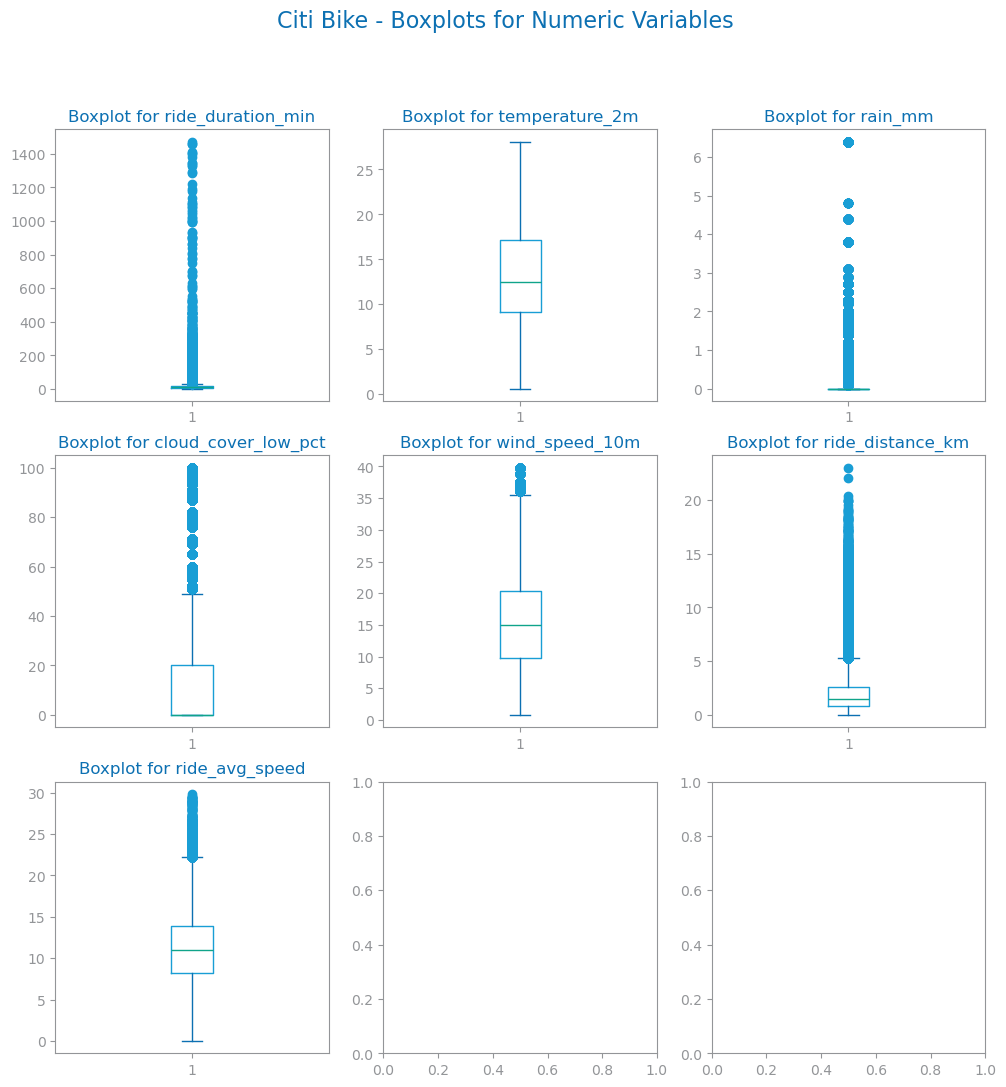

In [17]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT
import pandas as pd

# Obter as variáveis categorizadas pela função get_variable_types
variable_types: dict[str, list] = get_variable_types(df_prep_outl)

# Apenas variáveis numéricas são usadas para os boxplots
numeric = variable_types.get('numeric', [])

# Verificar se a lista de variáveis numéricas não está vazia
if numeric:
    rows, cols = define_grid(len(numeric))  # Definir o número de linhas e colunas com base no número de variáveis
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
    fig.suptitle(f"{file_tag} - Boxplots for Numeric Variables", fontsize=16)

    # Iterar sobre as variáveis numéricas e criar os subplots
    i, j = 0, 0
    for n in numeric:
        # Garantir que apenas valores numéricos são passados para boxplot
        data = df_prep_outl[n].dropna().values
        
        if pd.api.types.is_numeric_dtype(df_prep_outl[n]):
            axs[i, j].set_title(f"Boxplot for {n}")
            axs[i, j].boxplot(data)
        
        # Mover para o próximo subplot
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_profiling_boxplot_single_num_vars.png")
    # Mostrar os gráficos
    show()
else:
    print("There are no numeric variables.")

In [68]:
df_prep_outl.shape

(318839, 45)

## Feature Selection

In [18]:
#use_df_in_feat_eng="df_prep_outl"
use_df_in_feat_eng="df_prep_outl"

In [20]:
df_prep_outl.shape
use_df_in_feat_eng = "df_prep_outl"

# Escolher o DataFrame a ser utilizado com base na variável 'use_df_in_feat_eng' (feature engineering)
if use_df_in_feat_eng == "df_enc":
    df_to_use_feat = df_enc
elif use_df_in_feat_eng == 'df_prep_outl':
    df_to_use_feat = df_prep_outl
else:
    raise ValueError(f"Invalid DataFrame choice: {use_df_in_feat_eng}. Choose either 'df_enc' or 'df_prep_outl'.")

# Exibir qual DataFrame foi escolhido
print(f"We will use the dataset {use_df_in_feat_eng} dataset, which means that we are {'not ' if use_df_in_feat_eng == 'df_enc' else ''}considering the removal of outliers and also scaled data")
print(f"Shape of dataset: {df_to_use_feat.shape}")


We will use the dataset df_prep_outl dataset, which means that we are considering the removal of outliers and also scaled data
Shape of dataset: (318817, 44)


### Feat 2 - Variance Threshold (Remove Low-Variance Features)


In [25]:
display(df.shape) # original df
display(df_enc.shape) # df after enconding
display(df_prep_outl.shape) # df after enconding and data prep outlier removal

(319360, 16)

(319360, 45)

(318860, 45)

In [21]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with very low variance
selector = VarianceThreshold(threshold=0.1)  # Ajuste o threshold conforme necessário
X_reduced = selector.fit_transform(df_to_use_feat)

# Get selected features
selected_features = df_to_use_feat.columns[selector.get_support()]
print(selected_features)


Index(['ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct',
       'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed',
       'bike_type_classic_bike', 'bike_type_electric_bike', 'user_type_casual',
       'user_type_member', 'is_weekend_0', 'is_weekend_1',
       'start_borough_Brooklyn', 'start_borough_Manhattan',
       'end_borough_Brooklyn', 'end_borough_Manhattan',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Overcast',
       'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'time_of_day_afternoon', 'time_of_day_evening',
       'time_of_day_morning'],
      dtype='object')


In [22]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold


# Print initial features
print("Initial features:\n", df_to_use_feat.columns.tolist())

# Compute variance for each feature
feature_variance = df_to_use_feat.var()
print("\nFeature Variance:\n", feature_variance)

# Define threshold (adjust based on the dataset)
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)

# Fit and transform the dataset
X_reduced = selector.fit_transform(df_to_use_feat)

# Get selected features
initial_features = list(set(df_to_use_feat.columns))
removed_features = list(set(df_to_use_feat.columns) - set(selected_features))
selected_features = df_to_use_feat.columns[selector.get_support()]


# Print results
print("Initial Features df_prep:\n", initial_features)
print("\nRemoved Features (low variance < {:.3f}):\n".format(threshold), removed_features)
print("\nFinal Features list:\n", selected_features.tolist())


Initial features:
 ['ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct', 'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed', 'bike_type_classic_bike', 'bike_type_electric_bike', 'user_type_casual', 'user_type_member', 'is_weekend_0', 'is_weekend_1', 'start_borough_Bronx', 'start_borough_Brooklyn', 'start_borough_Manhattan', 'start_borough_Queens', 'start_borough_Staten Island', 'end_borough_Bronx', 'end_borough_Brooklyn', 'end_borough_Jersey City', 'end_borough_Manhattan', 'end_borough_Queens', 'end_borough_Staten Island', 'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Dense', 'wmo_weather_desc_Drizzle: Light', 'wmo_weather_desc_Drizzle: Moderate', 'wmo_weather_desc_Mainly clear', 'wmo_weather_desc_Overcast', 'wmo_weather_desc_Partly cloudy', 'wmo_weather_desc_Rain: Moderate', 'wmo_weather_desc_Rain: Slight', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_

In [25]:
selected_features

Index(['ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct',
       'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed',
       'bike_type_classic_bike', 'bike_type_electric_bike', 'user_type_casual',
       'user_type_member', 'is_weekend_0', 'is_weekend_1',
       'start_borough_Bronx', 'start_borough_Brooklyn',
       'start_borough_Manhattan', 'start_borough_Queens', 'end_borough_Bronx',
       'end_borough_Brooklyn', 'end_borough_Manhattan', 'end_borough_Queens',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Light',
       'wmo_weather_desc_Drizzle: Moderate', 'wmo_weather_desc_Mainly clear',
       'wmo_weather_desc_Overcast', 'wmo_weather_desc_Partly cloudy',
       'wmo_weather_desc_Rain: Slight', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'time_of_day_afternoon', 'time_of_day_evening', 'time_of_day_m

In [26]:
df_prep_feat_var = df_to_use_feat[selected_features]

In [27]:
df_prep_feat_var.shape

(318817, 39)

In [28]:
display(df_enc.shape) # df after enconding
display(df_prep_outl.shape) # df after enconding and data prep outlier removal
display(df_to_use_feat.shape) # df after enconding and data prep outlier removal
display(df_prep_feat_var.shape) 

(319360, 44)

(318817, 44)

(318817, 44)

(318817, 39)

### Feat 3 - Drop Redundant Variables
    - Correlation interpretation - values between [-1,1]:
        - 0.9 and above: Very strong correlation (typically, > 0.9 is considered almost perfect).
        - 0.7 to 0.9: Strong correlation.
        - 0.3 to 0.7: Moderate correlation.
        - 0.1 to 0.3: Weak correlation.
        - 0 to 0.1: No significant correlation.       

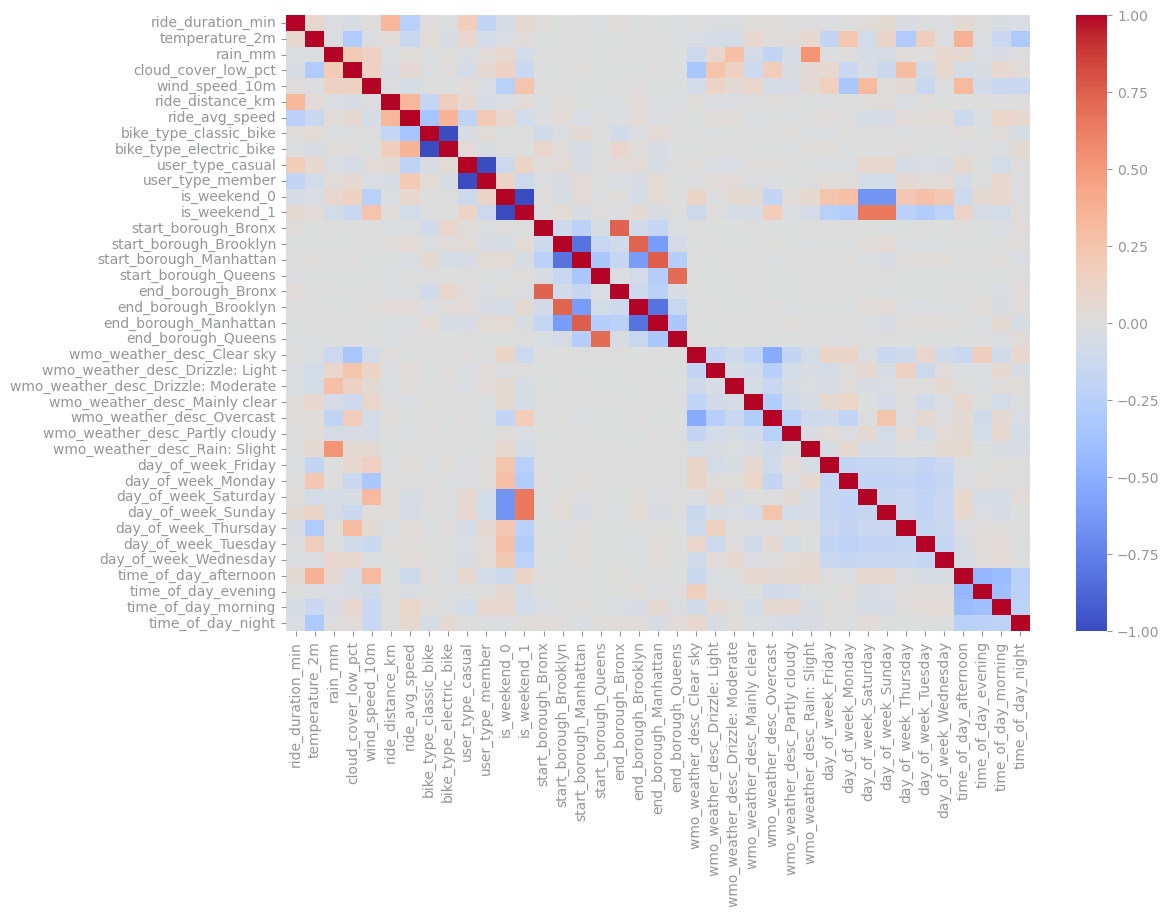

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_prep_feat_var.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.show()

In [30]:
import numpy as np

# Calculate correlation matrix
corr_matrix = df_prep_feat_var.corr()

# Identify pairs of highly correlated features (correlation > 0.8)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Initialize an empty list to store the pairs of highly correlated features
redundant_pairs = []

# Loop through each column to find pairs with correlation > 0.8
for column in upper_tri.columns:
    for row in upper_tri.index:
        if upper_tri.loc[row, column] > 0.8:
            redundant_pairs.append((row, column, upper_tri.loc[row, column]))

# Print initial features count
print(f"Initial number of features: {len(df_prep_feat_var.columns)}")

# Print redundant pairs
print(f"Redundant pairs (correlation > 0.8):")
for pair in redundant_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]}")

# Identify the features to drop based on redundancy
to_drop = [pair[1] for pair in redundant_pairs]

# Print features that will be dropped
print(f"Number of features dropped: {len(to_drop)}")
print(f"Features dropped: {to_drop}")

# Drop the correlated features
df_prep_final = df_prep_feat_var.drop(columns=to_drop)

# Print remaining features count
print(f"Remaining features: {len(df_prep_final.columns)}")
print(f"Remaining features: {df_prep_final.columns.tolist()}")


Initial number of features: 39
Redundant pairs (correlation > 0.8):
Number of features dropped: 0
Features dropped: []
Remaining features: 39
Remaining features: ['ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct', 'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed', 'bike_type_classic_bike', 'bike_type_electric_bike', 'user_type_casual', 'user_type_member', 'is_weekend_0', 'is_weekend_1', 'start_borough_Bronx', 'start_borough_Brooklyn', 'start_borough_Manhattan', 'start_borough_Queens', 'end_borough_Bronx', 'end_borough_Brooklyn', 'end_borough_Manhattan', 'end_borough_Queens', 'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Light', 'wmo_weather_desc_Drizzle: Moderate', 'wmo_weather_desc_Mainly clear', 'wmo_weather_desc_Overcast', 'wmo_weather_desc_Partly cloudy', 'wmo_weather_desc_Rain: Slight', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday

In [84]:
display(df.shape) # original df
display(df_enc.shape) # df after enconding
display(df_prep_outl.shape) # df after enconding and data prep outlier removal
display(df_prep_feat_var.shape) 
display(df_prep_final.shape) 

(319360, 15)

(319360, 45)

(318839, 45)

(318839, 39)

(318839, 39)

## Discritization of the numerical variable

In [31]:
df_prep_feat_var.head()

ride_duration_min  temperature_2m  rain_mm  cloud_cover_low_pct  \
291527           22.130200             9.3      0.0                   17   
1620715          30.473467             9.8      0.0                    0   
3080788          10.688367            12.9      0.1                   16   
1826785           5.097900             5.4      1.6                  100   
2771051          99.111700            13.1      0.0                    4   

         wind_speed_10m  ride_distance_km  ride_avg_speed  \
291527             27.1          1.835867        4.977452   
1620715            12.8          3.173160        6.247718   
3080788            27.0          1.801181       10.111073   
1826785            27.5          1.597632       18.803417   
2771051            13.8          0.316511        0.191609   

         bike_type_classic_bike  bike_type_electric_bike  user_type_casual  \
291527                        0                        1                 0   
1620715                       1                        0                 0   
3080788                       0                        1                 0   
1826785                       0                        1                 0   
2771051                       1                        0                 1   

         ...  day_of_week_Monday  day_of_week_Saturday  day_of_week_Sunday  \
291527   ...                   0                     0                   0   
1620715  ...                   0                     0                   1   
3080788  ...                   0                     0                   0   
1826785  ...                   0                     0                   0   
2771051  ...                   1                     0                   0   

         day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  \
291527                      0                    0                      0   
1620715                     0                    0                      0   
3080788                     1                    0                      0   
1826785                     0                    0                      1   
2771051                     0                    0                      0   

         time_of_day_afternoon  time_of_day_evening  time_of_day_morning  \
291527                       1                    0                    0   
1620715                      0                    1                    0   
3080788                      0                    1                    0   
1826785                      0                    0                    1   
2771051                      1                    0                    0   

         time_of_day_night  
291527                   0  
1620715                  0  
3080788                  0  
1826785                  0  
2771051                  0  

[5 rows x 39 columns]

In [32]:
use_df_in_discrit = "df_prep_feat_var"

In [34]:
# Escolher o DataFrame a ser utilizado com base na variável 'use_df_in_discrit' (clustering)
if use_df_in_discrit == "df_enc":
    df_to_use_discrit = df_enc
elif use_df_in_discrit == "df_prep_outl":
    df_to_use_discrit = df_prep_outl
elif use_df_in_discrit == "df_prep_feat_var":
    df_to_use_discrit = df_prep_feat_var
else:
    raise ValueError(f"Invalid DataFrame choice: {use_df_in_discrit}. Choose either 'df_enc', 'df_prep_outl', or 'df_prep_feat_var'.")

# Exibir qual DataFrame foi escolhido
print(f"We will use the dataset {use_df_in_discrit} dataset")
print(f"Shape of dataset: {df_to_use_discrit.shape}")


We will use the dataset df_prep_feat_var dataset
Shape of dataset: (318817, 39)


### Apply cut to discretize the numeric variables that follows a normal distribution
 - On this method we don't need to define the limits for each bin, cut will define them and distribute the values by the bins with the same lenght

In [35]:
# Don't consider binary variables, because these are already encoded (0 or 1)
binary_var = [col for col in df_to_use_discrit.columns if df_to_use_discrit[col].nunique() == 2]

# List of columns to apply the cut transformation
columns_to_bin = df_to_use_discrit.drop(columns=binary_var, axis=1).columns

# Apply pd.cut to all selected numerical columns
bins_dict = {}  # To store bin edges for each variable

for v in columns_to_bin:
    df_to_use_discrit[v], bins = pd.cut(df_to_use_discrit[v], bins=3, labels=['low', 'medium', 'high'], retbins=True)
    bins_dict[v] = bins  # Store bin limits for each variable

# Print bin limits for reference
for col, bins in bins_dict.items():
    print(f"Limits for {col}: {bins}")

# Check the results
display(df_to_use_discrit[columns_to_bin].apply(pd.Series.value_counts))


Limits for ride_duration_min: [-4.68139617e-01  4.91566756e+02  9.82129961e+02  1.47269317e+03]
Limits for temperature_2m: [ 0.5725      9.76666667 18.93333333 28.1       ]
Limits for rain_mm: [-0.0064      2.13333333  4.26666667  6.4       ]
Limits for cloud_cover_low_pct: [ -0.1         33.33333333  66.66666667 100.        ]
Limits for wind_speed_10m: [ 0.761 13.8   26.8   39.8  ]
Limits for ride_distance_km: [-0.02299427  7.66475618 15.32951235 22.99426853]
Limits for ride_avg_speed: [-0.02985642  9.95213939 19.90427878 29.85641817]


ride_duration_min  temperature_2m  rain_mm  cloud_cover_low_pct  \
low                318754           99957   317444               254133   
medium                 32          167506      874                15409   
high                   31           51354      499                49275   

        wind_speed_10m  ride_distance_km  ride_avg_speed  
low             145697            314079          127363  
medium          146394              4648          185827  
high             26726                90            5627

In [36]:
display(df_to_use_discrit.head())

ride_duration_min temperature_2m rain_mm cloud_cover_low_pct  \
291527                low            low     low                 low   
1620715               low         medium     low                 low   
3080788               low         medium     low                 low   
1826785               low            low     low                high   
2771051               low         medium     low                 low   

        wind_speed_10m ride_distance_km ride_avg_speed  \
291527            high              low            low   
1620715            low              low            low   
3080788           high              low         medium   
1826785           high              low         medium   
2771051            low              low            low   

         bike_type_classic_bike  bike_type_electric_bike  user_type_casual  \
291527                        0                        1                 0   
1620715                       1                        0                 0   
3080788                       0                        1                 0   
1826785                       0                        1                 0   
2771051                       1                        0                 1   

         ...  day_of_week_Monday  day_of_week_Saturday  day_of_week_Sunday  \
291527   ...                   0                     0                   0   
1620715  ...                   0                     0                   1   
3080788  ...                   0                     0                   0   
1826785  ...                   0                     0                   0   
2771051  ...                   1                     0                   0   

         day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  \
291527                      0                    0                      0   
1620715                     0                    0                      0   
3080788                     1                    0                      0   
1826785                     0                    0                      1   
2771051                     0                    0                      0   

         time_of_day_afternoon  time_of_day_evening  time_of_day_morning  \
291527                       1                    0                    0   
1620715                      0                    1                    0   
3080788                      0                    1                    0   
1826785                      0                    0                    1   
2771051                      1                    0                    0   

         time_of_day_night  
291527                   0  
1620715                  0  
3080788                  0  
1826785                  0  
2771051                  0  

[5 rows x 39 columns]

In [92]:
df_to_use_discrit.columns

Index(['ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct',
       'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed',
       'bike_type_classic_bike', 'bike_type_electric_bike', 'user_type_casual',
       'user_type_member', 'is_weekend_0', 'is_weekend_1',
       'start_borough_Bronx', 'start_borough_Brooklyn',
       'start_borough_Manhattan', 'start_borough_Queens', 'end_borough_Bronx',
       'end_borough_Brooklyn', 'end_borough_Manhattan', 'end_borough_Queens',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Light',
       'wmo_weather_desc_Drizzle: Moderate', 'wmo_weather_desc_Mainly clear',
       'wmo_weather_desc_Overcast', 'wmo_weather_desc_Partly cloudy',
       'wmo_weather_desc_Rain: Slight', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'time_of_day_afternoon', 'time_of_day_evening', 'time_of_day_m

## Dummyification of remaining variables

In [37]:
import pandas as pd

# Identificar automaticamente variáveis categóricas (excluindo numéricas)
categorical_cols = df_to_use_discrit.select_dtypes(exclude=['number']).columns.tolist()

# Aplicar one-hot encoding a todas as variáveis categóricas
df_dummy = pd.get_dummies(df_to_use_discrit[categorical_cols]).astype(int)

# Criar dataset final sem as colunas originais categóricas
df_discrit_final = df_to_use_discrit.drop(columns=categorical_cols).join(df_dummy)

# Verificar resultado
display(df_to_use_discrit.head())        # Mostrar o dataset original
display(df_to_use_discrit.shape)         # Ver o tamanho do dataset original

display(df_discrit_final.head())  # Mostrar o dataset final com as variáveis dummies
display(df_discrit_final.shape)   # Ver o tamanho do dataset final

display(df_discrit_final.columns)  # Ver as colunas do dataset final


ride_duration_min temperature_2m rain_mm cloud_cover_low_pct  \
291527                low            low     low                 low   
1620715               low         medium     low                 low   
3080788               low         medium     low                 low   
1826785               low            low     low                high   
2771051               low         medium     low                 low   

        wind_speed_10m ride_distance_km ride_avg_speed  \
291527            high              low            low   
1620715            low              low            low   
3080788           high              low         medium   
1826785           high              low         medium   
2771051            low              low            low   

         bike_type_classic_bike  bike_type_electric_bike  user_type_casual  \
291527                        0                        1                 0   
1620715                       1                        0                 0   
3080788                       0                        1                 0   
1826785                       0                        1                 0   
2771051                       1                        0                 1   

         ...  day_of_week_Monday  day_of_week_Saturday  day_of_week_Sunday  \
291527   ...                   0                     0                   0   
1620715  ...                   0                     0                   1   
3080788  ...                   0                     0                   0   
1826785  ...                   0                     0                   0   
2771051  ...                   1                     0                   0   

         day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  \
291527                      0                    0                      0   
1620715                     0                    0                      0   
3080788                     1                    0                      0   
1826785                     0                    0                      1   
2771051                     0                    0                      0   

         time_of_day_afternoon  time_of_day_evening  time_of_day_morning  \
291527                       1                    0                    0   
1620715                      0                    1                    0   
3080788                      0                    1                    0   
1826785                      0                    0                    1   
2771051                      1                    0                    0   

         time_of_day_night  
291527                   0  
1620715                  0  
3080788                  0  
1826785                  0  
2771051                  0  

[5 rows x 39 columns]

(318817, 39)

bike_type_classic_bike  bike_type_electric_bike  user_type_casual  \
291527                        0                        1                 0   
1620715                       1                        0                 0   
3080788                       0                        1                 0   
1826785                       0                        1                 0   
2771051                       1                        0                 1   

         user_type_member  is_weekend_0  is_weekend_1  start_borough_Bronx  \
291527                  1             1             0                    0   
1620715                 1             0             1                    0   
3080788                 1             1             0                    1   
1826785                 1             1             0                    0   
2771051                 0             1             0                    0   

         start_borough_Brooklyn  start_borough_Manhattan  \
291527                        1                        0   
1620715                       0                        1   
3080788                       0                        0   
1826785                       1                        0   
2771051                       0                        1   

         start_borough_Queens  ...  cloud_cover_low_pct_high  \
291527                      0  ...                         0   
1620715                     0  ...                         0   
3080788                     0  ...                         0   
1826785                     0  ...                         1   
2771051                     0  ...                         0   

         wind_speed_10m_low  wind_speed_10m_medium  wind_speed_10m_high  \
291527                    0                      0                    1   
1620715                   1                      0                    0   
3080788                   0                      0                    1   
1826785                   0                      0                    1   
2771051                   1                      0                    0   

         ride_distance_km_low  ride_distance_km_medium  ride_distance_km_high  \
291527                      1                        0                      0   
1620715                     1                        0                      0   
3080788                     1                        0                      0   
1826785                     1                        0                      0   
2771051                     1                        0                      0   

         ride_avg_speed_low  ride_avg_speed_medium  ride_avg_speed_high  
291527                    1                      0                    0  
1620715                   1                      0                    0  
3080788                   0                      1                    0  
1826785                   0                      1                    0  
2771051                   1                      0                    0  

[5 rows x 53 columns]

(318817, 53)

Index(['bike_type_classic_bike', 'bike_type_electric_bike', 'user_type_casual',
       'user_type_member', 'is_weekend_0', 'is_weekend_1',
       'start_borough_Bronx', 'start_borough_Brooklyn',
       'start_borough_Manhattan', 'start_borough_Queens', 'end_borough_Bronx',
       'end_borough_Brooklyn', 'end_borough_Manhattan', 'end_borough_Queens',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Light',
       'wmo_weather_desc_Drizzle: Moderate', 'wmo_weather_desc_Mainly clear',
       'wmo_weather_desc_Overcast', 'wmo_weather_desc_Partly cloudy',
       'wmo_weather_desc_Rain: Slight', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'time_of_day_afternoon', 'time_of_day_evening', 'time_of_day_morning',
       'time_of_day_night', 'ride_duration_min_low',
       'ride_duration_min_medium', 'ride_duration_min_high',
       'temperature_

In [97]:

display(df_discrit_final.head())  # Mostrar o dataset final com as variáveis dummies
display(df_discrit_final.shape)   # Ver o tamanho do dataset final

display(df_discrit_final.columns)  # Ver as colunas do dataset final

bike_type_classic_bike  bike_type_electric_bike  user_type_casual  \
319091                        1                        0                 1   
625839                        0                        1                 0   
286623                        0                        1                 0   
2781924                       0                        1                 0   
149011                        0                        1                 0   

         user_type_member  is_weekend_0  is_weekend_1  start_borough_Bronx  \
319091                  0             1             0                    0   
625839                  1             1             0                    0   
286623                  1             1             0                    0   
2781924                 1             1             0                    0   
149011                  1             1             0                    0   

         start_borough_Brooklyn  start_borough_Manhattan  \
319091                        1                        0   
625839                        0                        1   
286623                        1                        0   
2781924                       1                        0   
149011                        1                        0   

         start_borough_Queens  ...  cloud_cover_low_pct_high  \
319091                      0  ...                         1   
625839                      0  ...                         0   
286623                      0  ...                         0   
2781924                     0  ...                         1   
149011                      0  ...                         0   

         wind_speed_10m_low  wind_speed_10m_medium  wind_speed_10m_high  \
319091                    0                      1                    0   
625839                    0                      1                    0   
286623                    1                      0                    0   
2781924                   1                      0                    0   
149011                    1                      0                    0   

         ride_distance_km_low  ride_distance_km_medium  ride_distance_km_high  \
319091                      1                        0                      0   
625839                      1                        0                      0   
286623                      1                        0                      0   
2781924                     1                        0                      0   
149011                      1                        0                      0   

         ride_avg_speed_low  ride_avg_speed_medium  ride_avg_speed_high  
319091                    1                      0                    0  
625839                    1                      0                    0  
286623                    1                      0                    0  
2781924                   0                      1                    0  
149011                    0                      1                    0  

[5 rows x 53 columns]

(318839, 53)

Index(['bike_type_classic_bike', 'bike_type_electric_bike', 'user_type_casual',
       'user_type_member', 'is_weekend_0', 'is_weekend_1',
       'start_borough_Bronx', 'start_borough_Brooklyn',
       'start_borough_Manhattan', 'start_borough_Queens', 'end_borough_Bronx',
       'end_borough_Brooklyn', 'end_borough_Manhattan', 'end_borough_Queens',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Light',
       'wmo_weather_desc_Drizzle: Moderate', 'wmo_weather_desc_Mainly clear',
       'wmo_weather_desc_Overcast', 'wmo_weather_desc_Partly cloudy',
       'wmo_weather_desc_Rain: Slight', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'time_of_day_afternoon', 'time_of_day_evening', 'time_of_day_morning',
       'time_of_day_night', 'ride_duration_min_low',
       'ride_duration_min_medium', 'ride_duration_min_high',
       'temperature_

# Pattern mining application

In [38]:
df_discrit_final.head()

bike_type_classic_bike  bike_type_electric_bike  user_type_casual  \
291527                        0                        1                 0   
1620715                       1                        0                 0   
3080788                       0                        1                 0   
1826785                       0                        1                 0   
2771051                       1                        0                 1   

         user_type_member  is_weekend_0  is_weekend_1  start_borough_Bronx  \
291527                  1             1             0                    0   
1620715                 1             0             1                    0   
3080788                 1             1             0                    1   
1826785                 1             1             0                    0   
2771051                 0             1             0                    0   

         start_borough_Brooklyn  start_borough_Manhattan  \
291527                        1                        0   
1620715                       0                        1   
3080788                       0                        0   
1826785                       1                        0   
2771051                       0                        1   

         start_borough_Queens  ...  cloud_cover_low_pct_high  \
291527                      0  ...                         0   
1620715                     0  ...                         0   
3080788                     0  ...                         0   
1826785                     0  ...                         1   
2771051                     0  ...                         0   

         wind_speed_10m_low  wind_speed_10m_medium  wind_speed_10m_high  \
291527                    0                      0                    1   
1620715                   1                      0                    0   
3080788                   0                      0                    1   
1826785                   0                      0                    1   
2771051                   1                      0                    0   

         ride_distance_km_low  ride_distance_km_medium  ride_distance_km_high  \
291527                      1                        0                      0   
1620715                     1                        0                      0   
3080788                     1                        0                      0   
1826785                     1                        0                      0   
2771051                     1                        0                      0   

         ride_avg_speed_low  ride_avg_speed_medium  ride_avg_speed_high  
291527                    1                      0                    0  
1620715                   1                      0                    0  
3080788                   0                      1                    0  
1826785                   0                      1                    0  
2771051                   1                      0                    0  

[5 rows x 53 columns]

In [39]:
print(df_discrit_final.columns)


Index(['bike_type_classic_bike', 'bike_type_electric_bike', 'user_type_casual',
       'user_type_member', 'is_weekend_0', 'is_weekend_1',
       'start_borough_Bronx', 'start_borough_Brooklyn',
       'start_borough_Manhattan', 'start_borough_Queens', 'end_borough_Bronx',
       'end_borough_Brooklyn', 'end_borough_Manhattan', 'end_borough_Queens',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Light',
       'wmo_weather_desc_Drizzle: Moderate', 'wmo_weather_desc_Mainly clear',
       'wmo_weather_desc_Overcast', 'wmo_weather_desc_Partly cloudy',
       'wmo_weather_desc_Rain: Slight', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'time_of_day_afternoon', 'time_of_day_evening', 'time_of_day_morning',
       'time_of_day_night', 'ride_duration_min_low',
       'ride_duration_min_medium', 'ride_duration_min_high',
       'temperature_

## Parameterizable pattern discovery



In [101]:
df_discrit_final.columns

Index(['bike_type_classic_bike', 'bike_type_electric_bike', 'user_type_casual',
       'user_type_member', 'is_weekend_0', 'is_weekend_1',
       'start_borough_Bronx', 'start_borough_Brooklyn',
       'start_borough_Manhattan', 'start_borough_Queens', 'end_borough_Bronx',
       'end_borough_Brooklyn', 'end_borough_Manhattan', 'end_borough_Queens',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Light',
       'wmo_weather_desc_Drizzle: Moderate', 'wmo_weather_desc_Mainly clear',
       'wmo_weather_desc_Overcast', 'wmo_weather_desc_Partly cloudy',
       'wmo_weather_desc_Rain: Slight', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'time_of_day_afternoon', 'time_of_day_evening', 'time_of_day_morning',
       'time_of_day_night', 'ride_duration_min_low',
       'ride_duration_min_medium', 'ride_duration_min_high',
       'temperature_

In [40]:
# Remove colunas que contém "borough" no nome e a coluna "wmo_weather_desc" porque estas colunas não acrescentam valor à analise de padrões.
#df_discrit_final = df_discrit_final.loc[:, ~df_discrit_final.columns.str.contains('rain')]
df_discrit_final = df_discrit_final.loc[:, ~df_discrit_final.columns.str.contains('wmo')]
df_discrit_final = df_discrit_final.loc[:, ~df_discrit_final.columns.str.contains('borough')]

# Verifica as colunas restantes
df_discrit_final.columns


Index(['bike_type_classic_bike', 'bike_type_electric_bike', 'user_type_casual',
       'user_type_member', 'is_weekend_0', 'is_weekend_1',
       'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'time_of_day_afternoon', 'time_of_day_evening',
       'time_of_day_morning', 'time_of_day_night', 'ride_duration_min_low',
       'ride_duration_min_medium', 'ride_duration_min_high',
       'temperature_2m_low', 'temperature_2m_medium', 'temperature_2m_high',
       'rain_mm_low', 'rain_mm_medium', 'rain_mm_high',
       'cloud_cover_low_pct_low', 'cloud_cover_low_pct_medium',
       'cloud_cover_low_pct_high', 'wind_speed_10m_low',
       'wind_speed_10m_medium', 'wind_speed_10m_high', 'ride_distance_km_low',
       'ride_distance_km_medium', 'ride_distance_km_high',
       'ride_avg_speed_low', 'ride_avg_speed_medium', 'ride_avg_speed_high'],
      dtype='object')

- using max of p_value=0.01 (1%)
    - This way we make sure we only consider patterns that have relevent statistic significance (most likely they are not random) 

# Pattern mining: Members vs casual riders
- Goal: Is to find diferent patterns for rides made by Member users vs Xasual users

In [43]:

df_members = df_discrit_final[df_discrit_final['user_type_member'] == 1]
df_members.drop(columns='user_type_member', inplace=True)
# Drop columns that contain 'start_borough' in their names
df_members = df_members.drop(columns=[col for col in df_members.columns if 'start_borough' in col])
df_members = df_members.drop(columns=[col for col in df_members.columns if 'end_borough' in col])


df_casual = df_discrit_final[df_discrit_final['user_type_member'] == 0]
df_casual.drop(columns='user_type_casual', inplace=True)
df_casual = df_casual.drop(columns=[col for col in df_casual.columns if 'start_borough' in col])
df_casual = df_casual.drop(columns=[col for col in df_casual.columns if 'end_borough' in col])



In [44]:
display(df_members.shape)
display(df_casual.shape)

(259685, 37)

(59132, 37)

In [45]:
from IPython.display import display  # Para exibir tabelas no Jupyter Notebook
import pandas as pd

def find_patterns(df, mine_rules=True, min_patterns=10, min_length=4, max_pvalue=0.1, min_support=0.6, min_confidence=0.8, min_lift=1.4):
    patterns = {}
    min_support_current = 1
    while min_support_current > 0:
        min_support_current = min_support_current * 0.9
        print("Finding patterns with min sup %f" % min_support_current)
        patterns = apriori(df, min_support=min_support_current, use_colnames=True)
        
        if mine_rules and len(patterns) > 0:
            patterns = association_rules(patterns, metric="lift", min_threshold=min_lift)
            patterns = patterns[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
            patterns = patterns[(patterns['confidence'] >= min_confidence)]
            patterns['itemsets'] = [x | y for x, y in zip(patterns['antecedents'], patterns['consequents'])]
        
        patterns['length'] = patterns['itemsets'].apply(lambda x: len(x))
        patterns = patterns[(patterns['length'] >= min_length)]
        add_significance(patterns)
        patterns = patterns[(patterns['significance'] <= max_pvalue)]
            
        if len(patterns) >= min_patterns:
            break
    
    # Exibir a tabela formatada
    if len(patterns) > 0:
        print("\nTop patterns found:")
        display(patterns.head(20))  # Exibe as primeiras linhas da tabela
    else:
        print("No patterns found.")
    
    return patterns

#### Frequent patterns - Member users

In [46]:
# Padrões para membros
df_freq_patterns_members = find_patterns(
    df=df_members,  # Aplicar ao dataset de membros
    mine_rules=False,
    min_patterns=100,
    min_length=3,
    max_pvalue=0.01,
    min_support=0.20
)
# Exportar padrões de membros
df_freq_patterns_members.to_csv('data/citi_bike_freq_patterns_members.csv', sep=';', index=False)


Finding patterns with min sup 0.900000
Finding patterns with min sup 0.810000
Finding patterns with min sup 0.729000
Finding patterns with min sup 0.656100
Finding patterns with min sup 0.590490
Finding patterns with min sup 0.531441
Finding patterns with min sup 0.478297
Finding patterns with min sup 0.430467
Finding patterns with min sup 0.387420
Finding patterns with min sup 0.348678
Finding patterns with min sup 0.313811

Top patterns found:


support                                           itemsets  length  \
59  0.353451  (rain_mm_low, ride_duration_min_low, bike_type...       3   
60  0.352758  (ride_distance_km_low, ride_duration_min_low, ...       3   
61  0.351399  (rain_mm_low, ride_distance_km_low, bike_type_...       3   
62  0.486586  (bike_type_electric_bike, ride_duration_min_lo...       3   
63  0.483309  (bike_type_electric_bike, rain_mm_low, is_week...       3   
65  0.477594  (bike_type_electric_bike, ride_distance_km_low...       3   
66  0.365165  (bike_type_electric_bike, is_weekend_0, ride_a...       3   
71  0.476081  (bike_type_electric_bike, ride_duration_min_lo...       3   
76  0.473508  (bike_type_electric_bike, rain_mm_low, ride_av...       3   
78  0.369690  (bike_type_electric_bike, cloud_cover_low_pct_...       3   
79  0.465510  (bike_type_electric_bike, ride_distance_km_low...       3   
80  0.389414  (ride_duration_min_low, temperature_2m_medium,...       3   
81  0.749939  (rain_mm_low, ride_duration_min_low, is_weeken...       3   
83  0.388582  (ride_duration_min_low, is_weekend_0, wind_spe...       3   
84  0.744028  (ride_distance_km_low, ride_duration_min_low, ...       3   
85  0.477001  (ride_duration_min_low, is_weekend_0, ride_avg...       3   
86  0.388097  (rain_mm_low, temperature_2m_medium, is_weeken...       3   
87  0.383776  (ride_distance_km_low, temperature_2m_medium, ...       3   
89  0.388621    (rain_mm_low, is_weekend_0, wind_speed_10m_low)       3   
90  0.739415  (rain_mm_low, ride_distance_km_low, is_weekend_0)       3   

    significance  
59  0.000000e+00  
60  0.000000e+00  
61  0.000000e+00  
62  0.000000e+00  
63  0.000000e+00  
65  1.110223e-16  
66  0.000000e+00  
71  0.000000e+00  
76  0.000000e+00  
78  0.000000e+00  
79  0.000000e+00  
80  1.287859e-14  
81  0.000000e+00  
83  0.000000e+00  
84  0.000000e+00  
85  0.000000e+00  
86  1.221245e-15  
87  1.321165e-14  
89  0.000000e+00  
90  0.000000e+00

#### Frequent patterns - Casual users

In [47]:
# Padrões para membros
df_freq_patterns_casual = find_patterns(
    df=df_casual,  # Aplicar ao dataset de membros
    mine_rules=False,
    min_patterns=100,
    min_length=3,
    max_pvalue=0.05,
    min_support=0.20
)


# Exportar padrões de não membros
df_freq_patterns_casual.to_csv('data/citi_bike_freq_patterns_casual.csv', sep=';', index=False)

Finding patterns with min sup 0.900000
Finding patterns with min sup 0.810000
Finding patterns with min sup 0.729000
Finding patterns with min sup 0.656100
Finding patterns with min sup 0.590490
Finding patterns with min sup 0.531441
Finding patterns with min sup 0.478297
Finding patterns with min sup 0.430467
Finding patterns with min sup 0.387420
Finding patterns with min sup 0.348678
Finding patterns with min sup 0.313811

Top patterns found:


support                                           itemsets  length  \
67   0.371406  (bike_type_electric_bike, ride_duration_min_lo...       3   
68   0.697541  (bike_type_electric_bike, ride_duration_min_lo...       3   
69   0.583136  (bike_type_electric_bike, ride_duration_min_lo...       3   
70   0.333948  (bike_type_electric_bike, ride_duration_min_lo...       3   
71   0.685111  (bike_type_electric_bike, ride_duration_min_lo...       3   
72   0.322144  (bike_type_electric_bike, ride_duration_min_lo...       3   
74   0.370696  (bike_type_electric_bike, temperature_2m_mediu...       3   
75   0.319083  (bike_type_electric_bike, temperature_2m_mediu...       3   
76   0.363830  (bike_type_electric_bike, temperature_2m_mediu...       3   
77   0.583254  (bike_type_electric_bike, rain_mm_low, cloud_c...       3   
78   0.333390  (bike_type_electric_bike, rain_mm_low, wind_sp...       3   
79   0.683319  (bike_type_electric_bike, ride_distance_km_low...       3   
80   0.321704  (bike_type_electric_bike, rain_mm_low, ride_av...       3   
82   0.570706  (bike_type_electric_bike, ride_distance_km_low...       3   
83   0.327099  (bike_type_electric_bike, ride_distance_km_low...       3   
84   0.319370  (bike_type_electric_bike, ride_distance_km_low...       3   
91   0.323361  (ride_duration_min_low, is_weekend_0, ride_avg...       3   
97   0.322854    (rain_mm_low, is_weekend_0, ride_avg_speed_low)       3   
99   0.321636  (ride_distance_km_low, is_weekend_0, ride_avg_...       3   
100  0.385020  (rain_mm_low, ride_duration_min_low, is_weeken...       3   

     significance  
67            0.0  
68            0.0  
69            0.0  
70            0.0  
71            0.0  
72            0.0  
74            0.0  
75            0.0  
76            0.0  
77            0.0  
78            0.0  
79            0.0  
80            0.0  
82            0.0  
83            0.0  
84            0.0  
91            0.0  
97            0.0  
99            0.0  
100           0.0

#### Discriminative patterns - Member users

In [49]:
# Padrões para membros
df_discrim_patterns_members = find_patterns(
    df=df_members,  # Aplicar ao dataset de não membros
    mine_rules=True,
    min_patterns=100,
    max_pvalue=0.01,
    min_support=0.20,
    min_confidence=0.8,
    min_lift=1.4,
)


# Exportar padrões de  membros
df_discrim_patterns_members.to_csv('data/citi_bike_discrim_patterns_members.csv', sep=';', index=False)

Finding patterns with min sup 0.900000
Finding patterns with min sup 0.810000
Finding patterns with min sup 0.729000
Finding patterns with min sup 0.656100
Finding patterns with min sup 0.590490
Finding patterns with min sup 0.531441
Finding patterns with min sup 0.478297
Finding patterns with min sup 0.430467
Finding patterns with min sup 0.387420
Finding patterns with min sup 0.348678
Finding patterns with min sup 0.313811
Finding patterns with min sup 0.282430
Finding patterns with min sup 0.254187
Finding patterns with min sup 0.228768
Finding patterns with min sup 0.205891
Finding patterns with min sup 0.185302
Finding patterns with min sup 0.166772
Finding patterns with min sup 0.150095
Finding patterns with min sup 0.135085
Finding patterns with min sup 0.121577
Finding patterns with min sup 0.109419

Top patterns found:


antecedents  \
194        (ride_duration_min_low, day_of_week_Monday)   
195                               (day_of_week_Monday)   
206                  (rain_mm_low, day_of_week_Monday)   
207                               (day_of_week_Monday)   
222           (day_of_week_Monday, wind_speed_10m_low)   
228         (ride_distance_km_low, day_of_week_Monday)   
229                               (day_of_week_Monday)   
240       (ride_duration_min_low, day_of_week_Tuesday)   
241                              (day_of_week_Tuesday)   
244                 (rain_mm_low, day_of_week_Tuesday)   
245                              (day_of_week_Tuesday)   
248        (ride_distance_km_low, day_of_week_Tuesday)   
249                              (day_of_week_Tuesday)   
255  (rain_mm_low, ride_duration_min_low, day_of_we...   
257                (rain_mm_low, day_of_week_Saturday)   
259      (ride_duration_min_low, day_of_week_Saturday)   
261                             (day_of_week_Saturday)   
263  (ride_distance_km_low, ride_duration_min_low, ...   
265       (ride_distance_km_low, day_of_week_Saturday)   
267      (ride_duration_min_low, day_of_week_Saturday)   

                                           consequents   support  confidence  \
194            (cloud_cover_low_pct_low, is_weekend_0)  0.166490    0.914407   
195  (cloud_cover_low_pct_low, ride_duration_min_lo...  0.166490    0.914233   
206            (cloud_cover_low_pct_low, is_weekend_0)  0.166525    0.914423   
207  (cloud_cover_low_pct_low, rain_mm_low, is_week...  0.166525    0.914423   
222            (cloud_cover_low_pct_low, is_weekend_0)  0.127389    0.890999   
228            (cloud_cover_low_pct_low, is_weekend_0)  0.164072    0.914196   
229  (cloud_cover_low_pct_low, ride_distance_km_low...  0.164072    0.900954   
240            (cloud_cover_low_pct_low, is_weekend_0)  0.154995    0.867719   
241  (cloud_cover_low_pct_low, ride_duration_min_lo...  0.154995    0.867700   
244            (cloud_cover_low_pct_low, is_weekend_0)  0.154999    0.873162   
245  (cloud_cover_low_pct_low, rain_mm_low, is_week...  0.154999    0.867722   
248            (cloud_cover_low_pct_low, is_weekend_0)  0.152446    0.867359   
249  (cloud_cover_low_pct_low, ride_distance_km_low...  0.152446    0.853429   
255                                     (is_weekend_1)  0.122987    1.000000   
257              (ride_duration_min_low, is_weekend_1)  0.122987    1.000000   
259                        (rain_mm_low, is_weekend_1)  0.122987    1.000000   
261  (rain_mm_low, ride_duration_min_low, is_weeken...  0.122987    1.000000   
263                                     (is_weekend_1)  0.121274    1.000000   
265              (ride_duration_min_low, is_weekend_1)  0.121274    1.000000   
267               (ride_distance_km_low, is_weekend_1)  0.121274    0.986067   

         lift                                           itemsets  length  \
194  1.601620  (cloud_cover_low_pct_low, ride_duration_min_lo...       4   
195  1.601478  (cloud_cover_low_pct_low, ride_duration_min_lo...       4   
206  1.601649  (rain_mm_low, is_weekend_0, day_of_week_Monday...       4   
207  1.601649  (cloud_cover_low_pct_low, is_weekend_0, rain_m...       4   
222  1.560619  (cloud_cover_low_pct_low, is_weekend_0, day_of...       4   
228  1.601250  (ride_distance_km_low, is_weekend_0, day_of_we...       4   
229  1.601902  (cloud_cover_low_pct_low, is_weekend_0, ride_d...       4   
240  1.519844  (cloud_cover_low_pct_low, ride_duration_min_lo...       4   
241  1.519965  (cloud_cover_low_pct_low, ride_duration_min_lo...       4   
244  1.529377  (rain_mm_low, is_weekend_0, cloud_cover_low_pc...       4   
245  1.519849  (cloud_cover_low_pct_low, rain_mm_low, is_week...       4   
248  1.519214  (ride_distance_km_low, is_weekend_0, cloud_cov...       4   
249  1.517402  (cloud_cover_low_pct_low, ride_distance_km_low...       4   
255  4.078224  (rain_mm_low, ride_duration_min_low, is_weeken...       4   
257

#### Discriminative patterns - Casual users

In [50]:
# Padrões para não membros
df_discrim_patterns_casual = find_patterns(
    df=df_casual,  # Aplicar ao dataset de não membros
    mine_rules=True,
    min_patterns=100,
    max_pvalue=0.01,
    min_support=0.20,
    min_confidence=0.8,
    min_lift=1.4,
)

# Exportar padrões de não membros
df_discrim_patterns_members.to_csv('data/citi_bike_discrim_patterns_casual.csv', sep=';', index=False)

Finding patterns with min sup 0.900000
Finding patterns with min sup 0.810000
Finding patterns with min sup 0.729000
Finding patterns with min sup 0.656100
Finding patterns with min sup 0.590490
Finding patterns with min sup 0.531441
Finding patterns with min sup 0.478297
Finding patterns with min sup 0.430467
Finding patterns with min sup 0.387420
Finding patterns with min sup 0.348678
Finding patterns with min sup 0.313811
Finding patterns with min sup 0.282430
Finding patterns with min sup 0.254187
Finding patterns with min sup 0.228768
Finding patterns with min sup 0.205891
Finding patterns with min sup 0.185302
Finding patterns with min sup 0.166772

Top patterns found:


antecedents  \
50   (rain_mm_low, ride_duration_min_low, bike_type...   
52               (rain_mm_low, bike_type_classic_bike)   
54     (ride_duration_min_low, bike_type_classic_bike)   
56                            (bike_type_classic_bike)   
58   (cloud_cover_low_pct_low, ride_duration_min_lo...   
60   (cloud_cover_low_pct_low, bike_type_classic_bike)   
66   (ride_distance_km_low, ride_duration_min_low, ...   
68      (ride_distance_km_low, bike_type_classic_bike)   
70     (ride_duration_min_low, bike_type_classic_bike)   
72                            (bike_type_classic_bike)   
74   (cloud_cover_low_pct_low, bike_type_classic_bi...   
76   (cloud_cover_low_pct_low, bike_type_classic_bike)   
82   (rain_mm_low, bike_type_classic_bike, ride_dis...   
84               (rain_mm_low, bike_type_classic_bike)   
86      (ride_distance_km_low, bike_type_classic_bike)   
88                            (bike_type_classic_bike)   
90   (cloud_cover_low_pct_low, bike_type_classic_bi...   
92   (cloud_cover_low_pct_low, bike_type_classic_bike)   
99   (rain_mm_low, ride_duration_min_low, day_of_we...   
101                (rain_mm_low, day_of_week_Saturday)   

                                           consequents   support  confidence  \
50                                (ride_avg_speed_low)  0.243219    0.811900   
52         (ride_duration_min_low, ride_avg_speed_low)  0.243219    0.810756   
54                   (rain_mm_low, ride_avg_speed_low)  0.243219    0.810893   
56   (rain_mm_low, ride_duration_min_low, ride_avg_...  0.243219    0.809752   
58                                (ride_avg_speed_low)  0.212660    0.817142   
60         (ride_duration_min_low, ride_avg_speed_low)  0.212660    0.816134   
66                                (ride_avg_speed_low)  0.242424    0.814026   
68         (ride_duration_min_low, ride_avg_speed_low)  0.242424    0.812918   
70          (ride_distance_km_low, ride_avg_speed_low)  0.242424    0.808243   
72   (ride_distance_km_low, ride_duration_min_low, ...  0.242424    0.807105   
74                                (ride_avg_speed_low)  0.212981    0.817368   
76                   (rain_mm_low, ride_avg_speed_low)  0.212981    0.817368   
82                                (ride_avg_speed_low)  0.242576    0.814445   
84          (ride_distance_km_low, ride_avg_speed_low)  0.242576    0.808614   
86                   (rain_mm_low, ride_avg_speed_low)  0.242576    0.813429   
88   (rain_mm_low, ride_distance_km_low, ride_avg_s...  0.242576    0.807612   
90                                (ride_avg_speed_low)  0.212017    0.819840   
92          (ride_distance_km_low, ride_avg_speed_low)  0.212017    0.813668   
99                                      (is_weekend_1)  0.190709    1.000000   
101              (ride_duration_min_low, is_weekend_1)  0.190709    0.999734   

         lift                                           itemsets  length  \
50   1.433969  (rain_mm_low, ride_duration_min_low, bike_type...       4   
52   1.433404  (rain_mm_low, ride_duration_min_low, bike_type...       4   
54   1.434332  (rain_mm_low, ride_duration_min_low, bike_type...       4   
56   1.433772  (rain_mm_low, ride_duration_min_low, bike_type...       4   
58   1.443227  (cloud_cover_low_pct_low, ride_duration_min_lo...       4   
60   1.442913  (cloud_cover_low_pct_low, ride_duration_min_lo...       4   
66   1.437724  (ride_distance_km_low, ride_duration_min_low, ...       4   
68   1.437227  (ride_distance_km_low, ride_duration_min_low, ...       4   
70   1.437644  (ride_distance_km_low, ride_duration_min_low, ...       4   
72   1.437047  (ride_distance_km_low, ride_duration_min_low, ...       4   
74   1.443625  (cloud_cover_low_pct_low, bike_type_classic_bi...       4   
76   1.445785  (cloud_cover_low_pct_low, bike_type_classic_bi...       4   
82   1.438463  (rain_mm_low, bike_type_classic_bike, ride_dis...       4   
84   1.438303  (rain_mm_low, ride_distance_km_low, bike_type_...       4   
86 